#  Credit Scoring

**Team:**
Siva Yogitha Mokkapati
Ramya Muthukrishnan 


**Course:** IE-575 – Predictive Analytics (Spring I, 2020)

### Problem Statement
* Predicting if an applicant is good or bad using his socio-economic factors.
* **Keywords:** Classfication, Prediction, feature selection, credit score, correlation, models, 
	

### Data Collection
* Source(url):(https://archive.ics.uci.edu/ml/datasets/credit+approval).

* Short Description : The dataset is taken from UCI ML datasets.
The paper that is used for reference is:"Credit Scoring Model based on Weighted Voting and Cluster based Feature Selection"
https://www.sciencedirect.com/science/article/pii/S1877050918307877
There are total 15 attributes with V15 being the predicted variable which is binary categorical. The predicting variables are from V1 - V14, with 6 numerical variables and 8 categorical varibles. The actual attributes names are masked for security purposes.
* Keywords: V15, good, bad, prediction

### Required packages
Install the required packages

Syntax: install.packages("package name")

install.packages("ggcorrplot")

install.packages("ROSE")

install.packages('caret')

install.packages("rattle")

install.packages("RColorBrewer")

install.packages("rpart.plot")

install.packages("rminer")

install.packages("ipred")

install.packages("adabag")

install.packages("kableExtra")

install.packages("magick")

install.packages('neuralnet')

install.packages("caretEnsemble")

install.packages("NeuralNetTools")

Load the required packages

Syntax: library(package name)
 

In [1]:
options(warn=-1)

In [2]:
install.packages("ggcorrplot")
install.packages("ROSE")
install.packages('caret')
install.packages("rattle")
install.packages("RColorBrewer")
install.packages("rpart.plot")
install.packages("rminer")
install.packages("ipred")
install.packages("adabag")
install.packages('neuralnet')
install.packages("caretEnsemble")
install.packages("NeuralNetTools")
install.packages("kableExtra")
install.packages("magick")


package 'ggcorrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sivay\AppData\Local\Temp\RtmpiASujn\downloaded_packages
package 'ROSE' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sivay\AppData\Local\Temp\RtmpiASujn\downloaded_packages
package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sivay\AppData\Local\Temp\RtmpiASujn\downloaded_packages
package 'rattle' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sivay\AppData\Local\Temp\RtmpiASujn\downloaded_packages
package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sivay\AppData\Local\Temp\RtmpiASujn\downloaded_packages
package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sivay\AppData\Local\Temp\RtmpiASujn\downloaded_packages

In [3]:
#loading the required libraries
set.seed(123)
library(caret)
library("ROSE")
library(mlbench)
library(e1071)
library(rpart.plot)
library(randomForest)
library(nnet)
library(neuralnet)
library(adabag)
library(ipred)
library(C50)
library(pROC)
library(rminer)
library(ROCR)
library(caretEnsemble)
library(NeuralNetTools)


Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loaded ROSE 0.0-3

Loading required package: rpart
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

Loading required package: foreach
Loading required package: doParallel
Loading required package: iterators
Loading required package: parallel

Attaching package: 'ipred'

The following object is masked from 'package:adabag':

    bagging

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess


Attaching package: 'ROCR'

The following object i

### Data Preprocessing


In [4]:
#Reading the dataset
Australia<- read.delim(file.choose(), sep="",header=FALSE)
#Checking the head, summary, names of columns of the dataset
head(Australia)
summary(Australia)
names(Australia)
str(Australia)
#Checking the NA values
colSums(is.na(Australia))
print("Number of rows")
nrow(Australia)
print("Number of columns")
ncol(Australia)


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1


       V1               V2              V3               V4       
 Min.   :0.0000   Min.   :13.75   Min.   : 0.000   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:22.67   1st Qu.: 1.000   1st Qu.:2.000  
 Median :1.0000   Median :28.62   Median : 2.750   Median :2.000  
 Mean   :0.6783   Mean   :31.57   Mean   : 4.759   Mean   :1.767  
 3rd Qu.:1.0000   3rd Qu.:37.71   3rd Qu.: 7.207   3rd Qu.:2.000  
 Max.   :1.0000   Max.   :80.25   Max.   :28.000   Max.   :3.000  
       V5               V6              V7               V8        
 Min.   : 1.000   Min.   :1.000   Min.   : 0.000   Min.   :0.0000  
 1st Qu.: 4.000   1st Qu.:4.000   1st Qu.: 0.165   1st Qu.:0.0000  
 Median : 8.000   Median :4.000   Median : 1.000   Median :1.0000  
 Mean   : 7.372   Mean   :4.693   Mean   : 2.223   Mean   :0.5232  
 3rd Qu.:10.000   3rd Qu.:5.000   3rd Qu.: 2.625   3rd Qu.:1.0000  
 Max.   :14.000   Max.   :9.000   Max.   :28.500   Max.   :1.0000  
       V9              V10            V11             V

[1] "V1"  "V2"  "V3"  "V4"  "V5"  "V6"  "V7"  "V8"  "V9"  "V10" "V11" "V12"
[13] "V13" "V14" "V15"

'data.frame':	690 obs. of  15 variables:
 $ V1 : int  1 0 0 0 1 0 1 0 1 0 ...
 $ V2 : num  22.1 22.7 29.6 21.7 20.2 ...
 $ V3 : num  11.46 7 1.75 11.5 8.17 ...
 $ V4 : int  2 2 1 1 2 2 2 2 1 2 ...
 $ V5 : int  4 8 4 5 6 8 3 11 2 4 ...
 $ V6 : int  4 4 4 3 4 8 4 8 8 8 ...
 $ V7 : num  1.585 0.165 1.25 0 1.96 ...
 $ V8 : int  0 0 0 1 1 1 0 1 0 1 ...
 $ V9 : int  0 0 0 1 1 1 0 1 0 1 ...
 $ V10: int  0 0 0 11 14 2 0 6 0 3 ...
 $ V11: int  1 0 1 1 0 0 0 0 0 1 ...
 $ V12: int  2 2 2 2 2 2 2 2 2 2 ...
 $ V13: int  100 160 280 0 60 100 60 43 176 100 ...
 $ V14: int  1213 1 1 1 159 1 101 561 538 51 ...
 $ V15: int  0 0 0 1 1 1 0 1 0 0 ...


V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

[1] "Number of rows"


[1] 690

[1] "Number of columns"


[1] 15

<b>We can see that ther are no null values in any attribute. Also,from the summary it is clear that there are 6 numerical attributes and 9 categorical attributes out of which V15 is the predicted variable</b>

<b>Histogram of the numerical varibles</b>

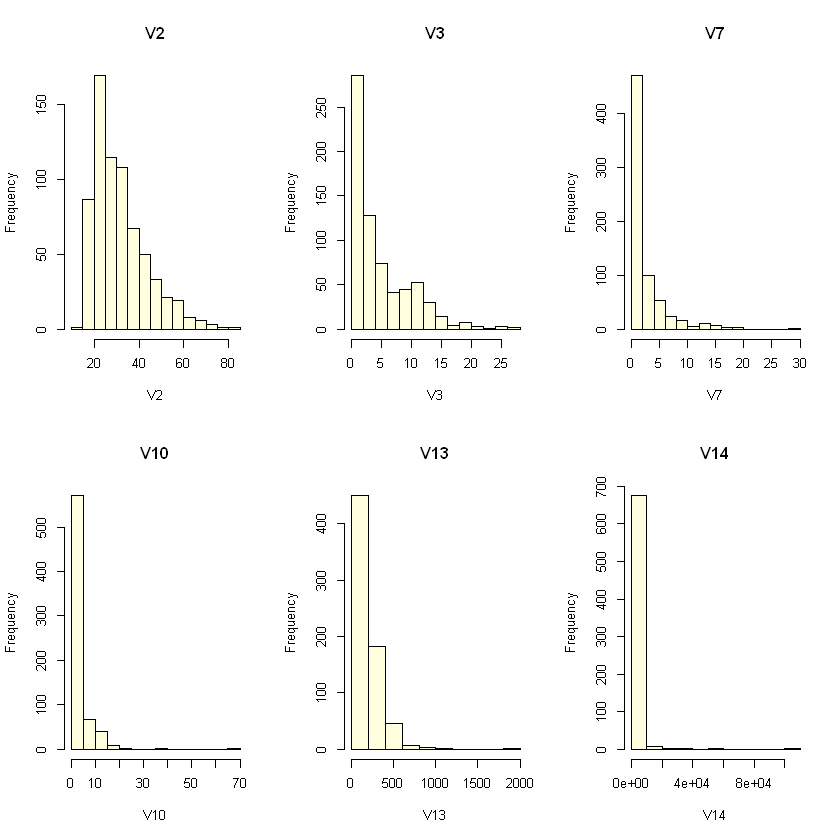

In [5]:
#The numerical variables are V2,V3,V7,V10,V13, V14
par(mfrow = c(2, 3))
for( i in 2:3){
  hist(Australia[,i], main = colnames(Australia)[i], xlab = colnames(Australia)[i], col = 'lightyellow')
}
hist(Australia[,7], main = colnames(Australia)[7], xlab = colnames(Australia)[7], col = 'lightyellow')
hist(Australia[,10], main = colnames(Australia)[10], xlab = colnames(Australia)[10], col = 'lightyellow')
for( i in 13:14){
  hist(Australia[,i], main = colnames(Australia)[i], xlab = colnames(Australia)[i], col = 'lightyellow')
}

<b>We can see from the histogram that the data before pre-processing is skewed towards right for all the attributes.</b>

<b>Box plot of all the numerical varibales to see outliers and removing the outliers if any:</b>

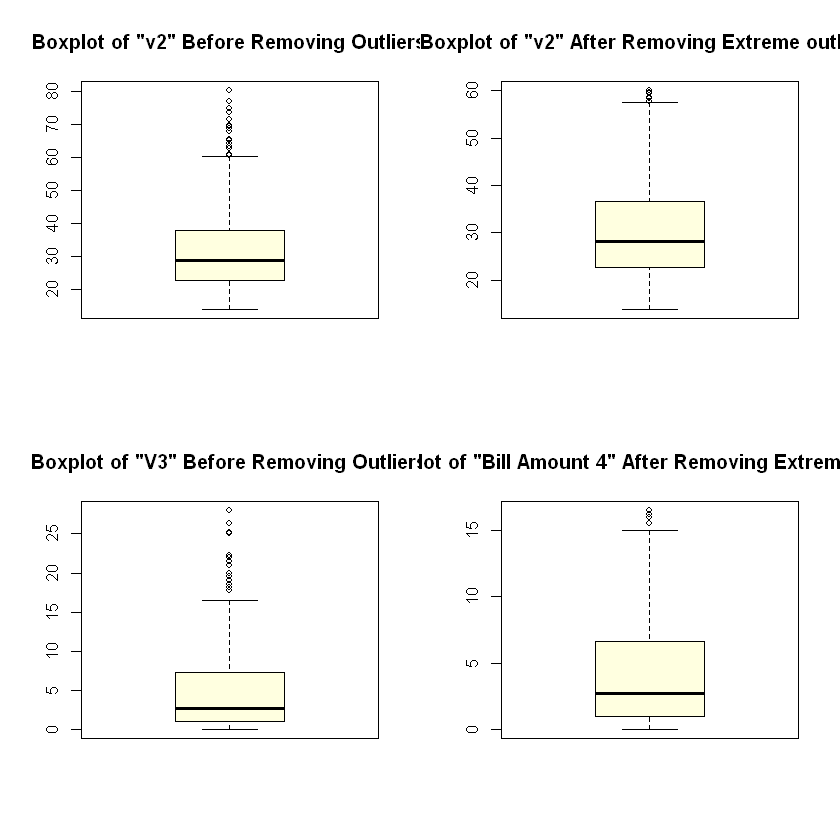

In [6]:
par(mfrow = c(2,2))
#Check for outliers in V2
boxplot(Australia$V2, main = 'Boxplot of "v2" Before Removing Outliers',col = 'lightyellow')
outliers <- boxplot(Australia$V2, plot=FALSE)$out


# Remove outliers in V2
Australia2<- Australia[-which(Australia$V2 %in% outliers),]
boxplot(Australia2$V2, main='Boxplot of "v2" After Removing Extreme outliers',col='lightyellow')

# check for outliers in V3

boxplot(Australia$V3, main = 'Boxplot of "V3" Before Removing Outliers',col = 'lightyellow')
outliers <- boxplot(Australia$V3, plot=FALSE)$out

# Remove outliers in V3
Australia2 <- Australia[-which(Australia$V3 %in% outliers),]
boxplot(Australia2$V3, main='Boxplot of "Bill Amount 4" After Removing Extreme outliers',col = 'lightyellow')

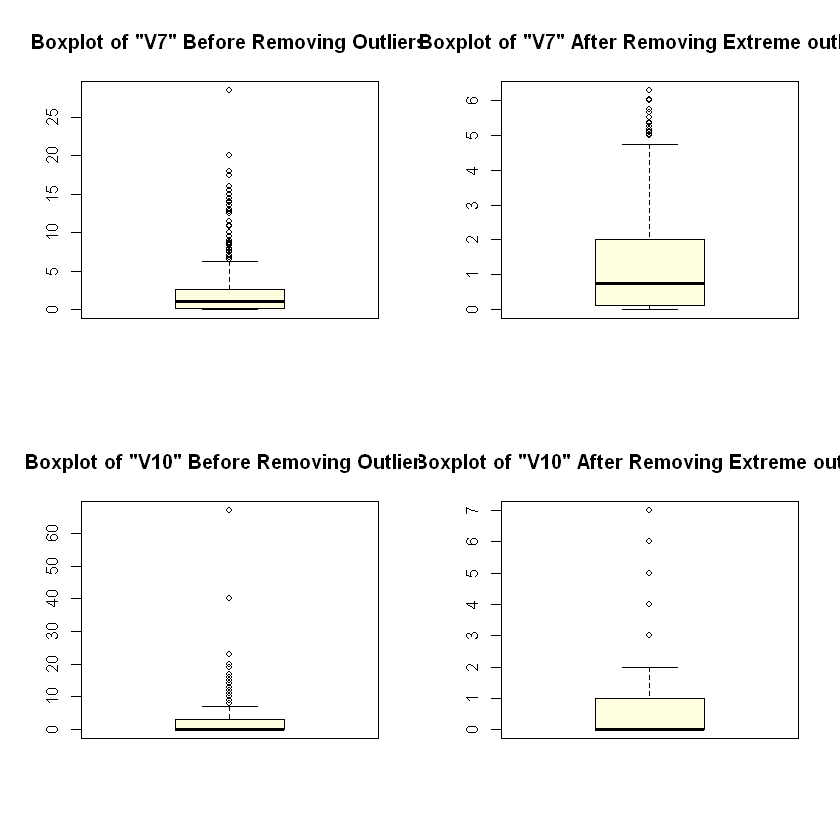

In [7]:
par(mfrow = c(2,2))
# check for outliers in V7

boxplot(Australia$V7, main = 'Boxplot of "V7" Before Removing Outliers',col = 'lightyellow')
outliers <- boxplot(Australia$V7, plot=FALSE)$out

# Remove outliers in V7
Australia2 <- Australia[-which(Australia$V7 %in% outliers),]
boxplot(Australia2$V7, main='Boxplot of "V7" After Removing Extreme outliers',col = 'lightyellow')

# check for outliers in V10

boxplot(Australia$V10, main = 'Boxplot of "V10" Before Removing Outliers',col = 'lightyellow')
outliers <- boxplot(Australia$V10, plot=FALSE)$out

# Remove outliers in V10
Australia2 <- Australia[-which(Australia$V10 %in% outliers),]
boxplot(Australia2$V10, main='Boxplot of "V10" After Removing Extreme outliers',col = 'lightyellow')


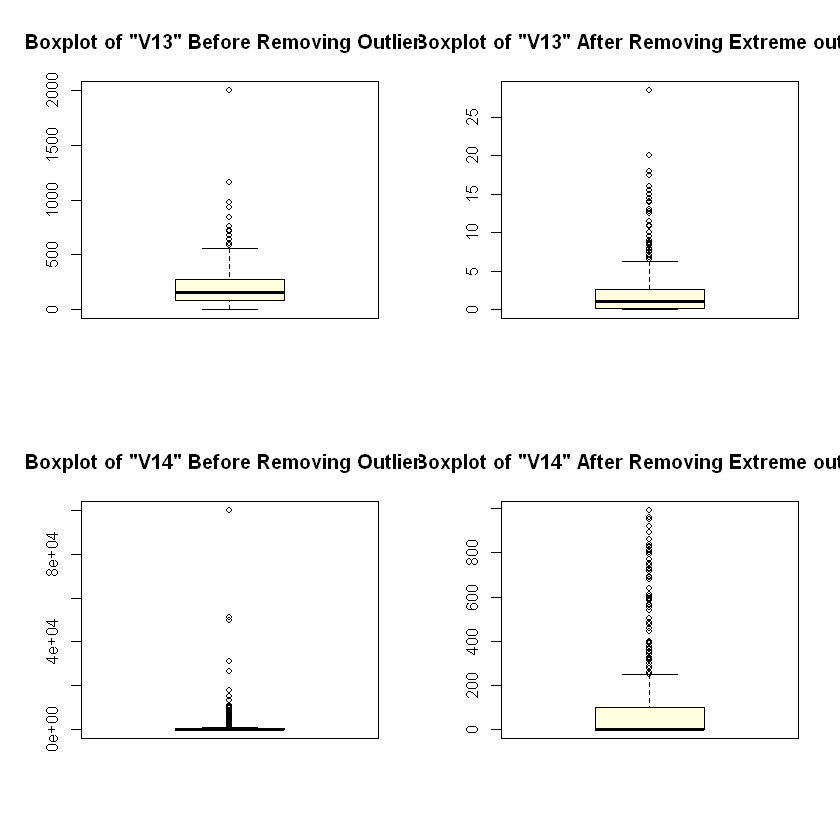

In [8]:
par(mfrow = c(2,2))
# check for outliers in V13

boxplot(Australia$V13, main = 'Boxplot of "V13" Before Removing Outliers',col = 'lightyellow')
outliers <- boxplot(Australia$V13, plot=FALSE)$out

# Remove outliers in V13
Australia2 <- Australia[-which(Australia$V13 %in% outliers),]
boxplot(Australia2$V7, main='Boxplot of "V13" After Removing Extreme outliers',col = 'lightyellow')

# check for outliers in V14

boxplot(Australia$V14, main = 'Boxplot of "V14" Before Removing Outliers',col = 'lightyellow')
outliers <- boxplot(Australia$V14, plot=FALSE)$out

# Remove outliers in V14
Australia2 <- Australia[-which(Australia$V14 %in% outliers),]
boxplot(Australia2$V14, main='Boxplot of "V14" After Removing Extreme outliers',col = 'lightyellow')

<b>Histogram after removing outliers</b>

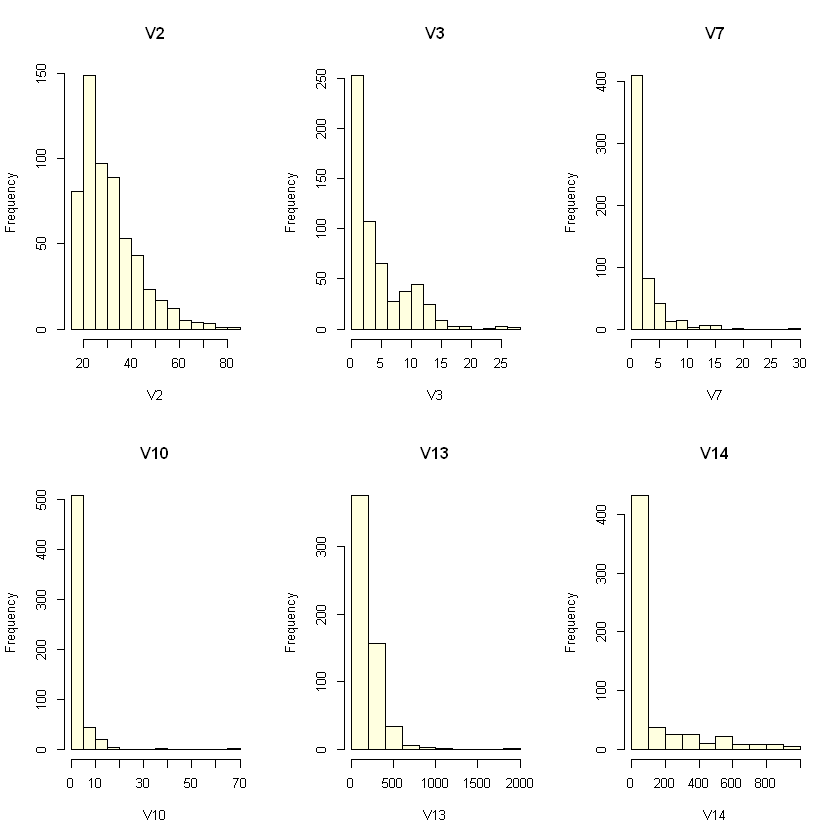

In [9]:

par(mfrow = c(2, 3))
for( i in 2:3){
  hist(Australia2[,i], main = colnames(Australia2)[i], xlab = colnames(Australia2)[i], col = 'lightyellow')
}
hist(Australia2[,7], main = colnames(Australia2)[7], xlab = colnames(Australia2)[7], col = 'lightyellow')
hist(Australia2[,10], main = colnames(Australia2)[10], xlab = colnames(Australia2)[10], col = 'lightyellow')
for( i in 13:14){
  hist(Australia2[,i], main = colnames(Australia2)[i], xlab = colnames(Australia2)[i], col = 'lightyellow')
}


<b>We can see from the histogram that the data even after removing outliers the data is skewed towards right for all the attributes. Hence, we have to normalise the data</b>

<b>Checking the correlation between numerical variables</b>

,V1,V4,V5,V6,V8,V9,V11,V12,V15
V1,1.0,-0.1,0.0,0.1,0.0,-0.1,0.1,-0.1,0.0
V4,-0.1,1.0,0.1,0.0,0.1,0.2,0.0,0.0,0.2
V5,0.0,0.1,1.0,0.4,0.3,0.2,0.0,0.1,0.4
V6,0.1,0.0,0.4,1.0,0.2,0.1,0.1,0.0,0.2
V8,0.0,0.1,0.3,0.2,1.0,0.4,0.1,0.0,0.7
V9,-0.1,0.2,0.2,0.1,0.4,1.0,0.0,0.2,0.5
V11,0.1,0.0,0.0,0.1,0.1,0.0,1.0,0.0,0.0
V12,-0.1,0.0,0.1,0.0,0.0,0.2,0.0,1.0,0.1
V15,0.0,0.2,0.4,0.2,0.7,0.5,0.0,0.1,1.0


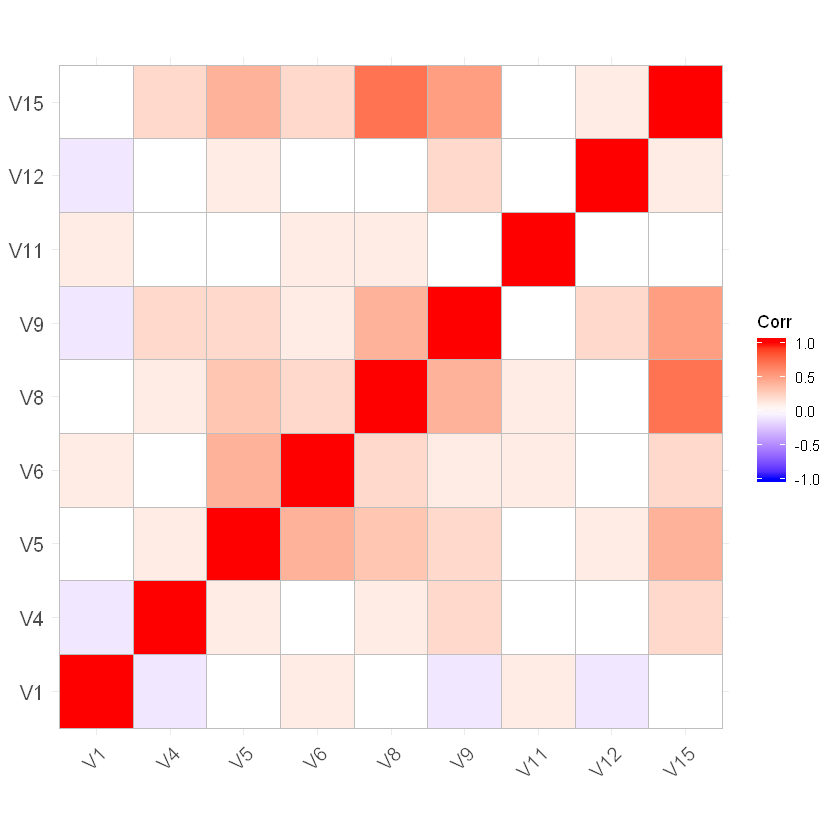

In [10]:
#Finding correlation between predictors and plotting them
library("ggplot2")
library("ggcorrplot")
corr <- round(cor(Australia[,-c(2,3,7,10,13,14)]),1)
corr
ggcorrplot(corr)

<b>We can see that there is is no correlation between the numerical variables</b>

<b>Converting the categorical variables to factors just in case they are considered numerical integers</b>

In [11]:
Australia2$V1 <- as.factor(Australia2$V1)
Australia2$V4 <- as.factor(Australia2$V4)
Australia2$V5 <- as.factor(Australia2$V5)
Australia2$V6 <- as.factor(Australia2$V6)
Australia2$V8 <- as.factor(Australia2$V8)
Australia2$V9 <- as.factor(Australia2$V9)
Australia2$V11 <- as.factor(Australia2$V11)
Australia2$V12 <- as.factor(Australia2$V12)
Australia2$V15 <- as.factor(Australia2$V15)
summary(Australia2)
head(Australia2)

 V1            V2              V3         V4            V5            V6     
 0:186   Min.   :15.17   Min.   : 0.000   1:145   8      :121   4      :344  
 1:392   1st Qu.:22.35   1st Qu.: 0.875   2:432   11     : 66   8      :115  
         Median :28.00   Median : 2.540   3:  1   9      : 52   1      : 51  
         Mean   :30.89   Mean   : 4.451           3      : 51   5      : 46  
         3rd Qu.:36.67   3rd Qu.: 6.500           6      : 49   3      :  8  
         Max.   :80.25   Max.   :28.000           1      : 46   7      :  5  
                                                  (Other):193   (Other):  9  
       V7         V8      V9           V10         V11     V12    
 Min.   : 0.000   0:305   0:360   Min.   : 0.000   0:311   1: 57  
 1st Qu.: 0.165   1:273   1:218   1st Qu.: 0.000   1:267   2:514  
 Median : 0.875                   Median : 0.000           3:  7  
 Mean   : 1.990                   Mean   : 1.817                  
 3rd Qu.: 2.500                   3rd Qu.

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
2,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
3,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
4,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
5,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
6,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
7,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0


<b>Checking if the dataset is balanced w.r.t to predicted variable</b>


  0   1 
360 218 

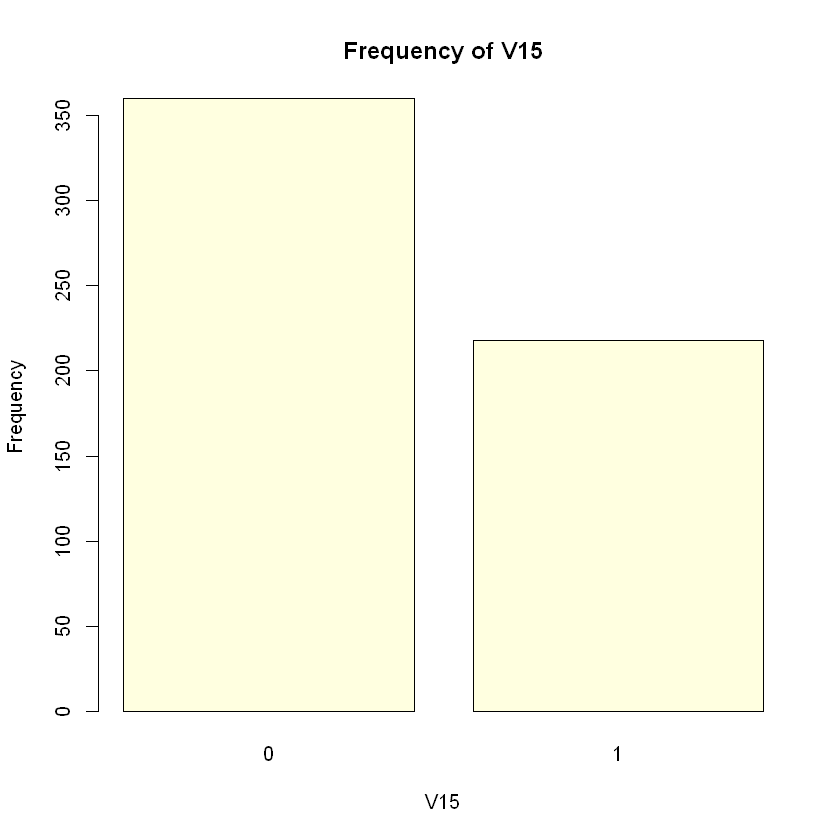

In [12]:
#Barplot to see the balanced dataset
xx =barplot(table(Australia2$V15), xlab="V15",ylab="Frequency",col='lightyellow',
            main="Frequency of V15")
table(Australia2$V15)

<b>We can see that the dataset is not balanced. We have to balance the dataset so that the dataset is not biased </b>


  0   1 
301 277 

 V1            V2               V3          V4            V5            V6     
 0:170   Min.   : 4.478   Min.   :-6.1756   1:126   8      :114   4      :346  
 1:408   1st Qu.:21.666   1st Qu.: 0.6334   2:450   11     : 67   8      :116  
         Median :28.468   Median : 3.3075   3:  2   6      : 57   1      : 54  
         Mean   :31.045   Mean   : 4.6033           9      : 51   5      : 38  
         3rd Qu.:38.530   3rd Qu.: 8.4331           1      : 50   3      : 11  
         Max.   :85.669   Max.   :27.7671           4      : 43   7      :  5  
                                                    (Other):196   (Other):  8  
       V7          V8      V9           V10           V11     V12    
 Min.   :-5.8431   0:272   0:348   Min.   :-10.9480   0:316   1: 50  
 1st Qu.:-0.1046   1:306   1:230   1st Qu.: -0.5486   1:262   2:520  
 Median : 1.4202                   Median :  0.5518           3:  8  
 Mean   : 2.1046                   Mean   :  1.9094                  
 3rd Qu.: 

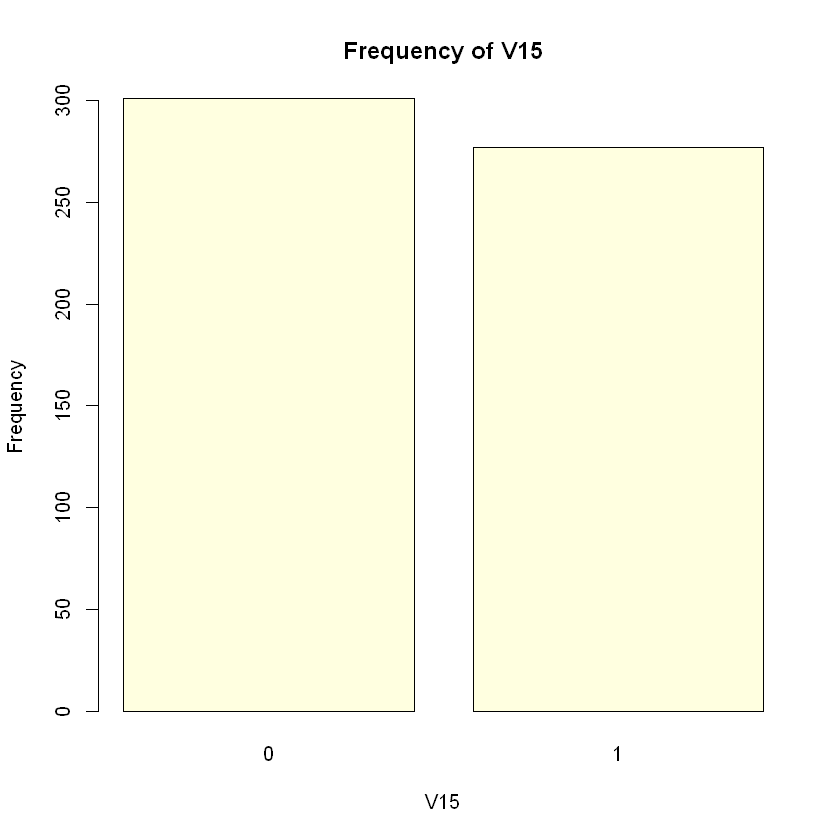

In [13]:

#Balancing the data using ROSE

Australia2.balanced <- ROSE(V15 ~ ., data=Australia2, seed=123)$data
table(Australia2.balanced$V15)
xx =barplot(table(Australia2.balanced$V15), xlab="V15",ylab="Frequency",col='lightyellow',
            main="Frequency of V15")

summary(Australia2.balanced)

<b>The dataset is balanced using the ROSE package. We can also see that from the table and the histogram</b>

### Normalizing and scaling the data

<b>Normalizing the numerical attributes using the pre-process library</b>

In [14]:
pp<- preProcess(Australia2.balanced, method = c('range'))
# get new dataset
Australia2.balanced <- predict(pp, Australia2.balanced)


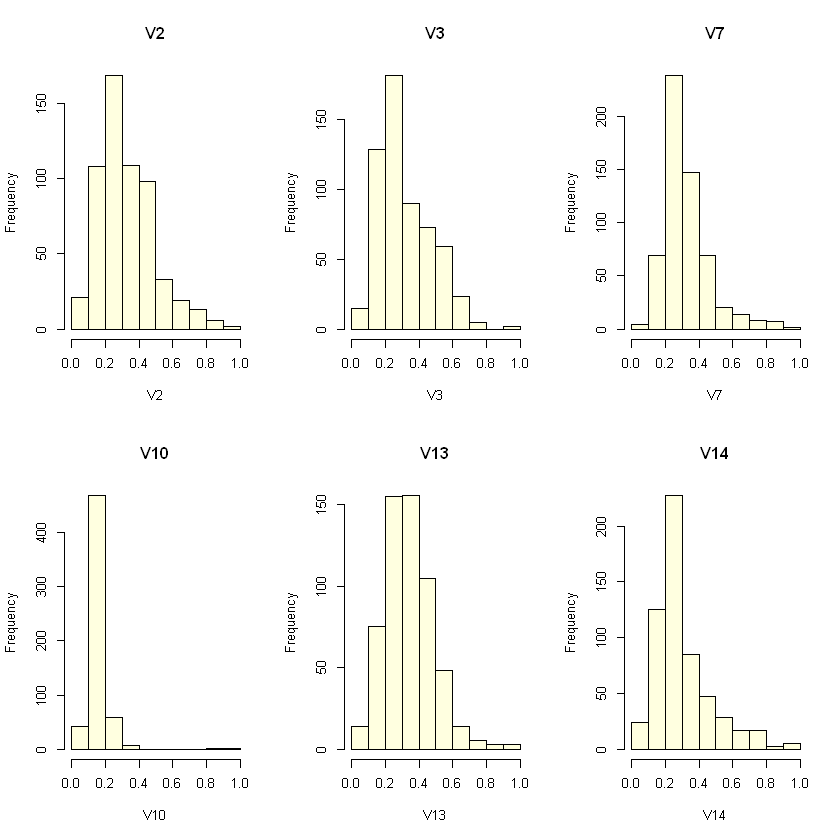

In [15]:
par(mfrow = c(2, 3))
for( i in 2:3){
  hist(Australia2.balanced[,i], main = colnames(Australia2.balanced)[i], xlab = colnames(Australia2.balanced)[i], col = 'lightyellow')
}
hist(Australia2.balanced[,7], main = colnames(Australia2.balanced)[7], xlab = colnames(Australia2.balanced)[7], col = 'lightyellow')
hist(Australia2.balanced[,10], main = colnames(Australia2.balanced)[10], xlab = colnames(Australia2.balanced)[10], col = 'lightyellow')
for( i in 13:14){
  hist(Australia2.balanced[,i], main = colnames(Australia2.balanced)[i], xlab = colnames(Australia2.balanced)[i], col = 'lightyellow')
}


<b>After using the preprocess function we can see that the data is normalised for all the numerical attributes</b>

<b>Applying PCA for the numerical attributes for dimensionality reduction</b>

In [16]:
numerical <- Australia2.balanced[,c(2,3,7,10,13,14)]
summary(numerical)
my.pca <- prcomp(numerical)
summary(my.pca)
head(my.pca$x)
pca <- my.pca$x[,c(1,2,3,4)]
names(pca)
head(pca)
ncol(pca)
dim(pca)
colnames(pca) <- c("PC1","PC2","PC3","PC4")
names(pca)
head(pca)
ncol(pca)
dim(pca)


Australia.reduced <- cbind(Australia2.balanced[,-c(2,3,7,10,13,14)],pca)
head(Australia.reduced)
summary(Australia.reduced)

       V2               V3               V7              V10        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2117   1st Qu.:0.2006   1st Qu.:0.2319   1st Qu.:0.1202  
 Median :0.2955   Median :0.2794   Median :0.2936   Median :0.1329  
 Mean   :0.3272   Mean   :0.3176   Mean   :0.3212   Mean   :0.1486  
 3rd Qu.:0.4194   3rd Qu.:0.4304   3rd Qu.:0.3728   3rd Qu.:0.1612  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
      V13              V14        
 Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2466   1st Qu.:0.1978  
 Median :0.3293   Median :0.2537  
 Mean   :0.3419   Mean   :0.2992  
 3rd Qu.:0.4278   3rd Qu.:0.3616  
 Max.   :1.0000   Max.   :1.0000  

Importance of components:
                          PC1    PC2    PC3    PC4    PC5     PC6
Standard deviation     0.1808 0.1653 0.1542 0.1428 0.1220 0.06325
Proportion of Variance 0.2657 0.2219 0.1931 0.1657 0.1210 0.03251
Cumulative Proportion  0.2657 0.4876 0.6808 0.8465 0.9675 1.00000

PC1,PC2,PC3,PC4,PC5,PC6
-0.21785631,-0.042844784,0.02133003,-0.07701692,0.009661453,-0.021060609
0.00148835,-0.081983429,-0.13813503,0.05428155,-0.128056656,0.024518136
-0.10029692,-0.016980721,-0.13311627,0.08025089,0.058039154,0.033456764
-0.14716477,-0.102990727,0.01166239,-0.08551944,-0.079304852,0.014206281
-0.15831208,0.009398301,0.05696936,-0.25119928,-0.003078249,0.005838499
0.02440761,-0.062686289,0.05866014,-0.14114203,-0.096091410,-0.016708834


NULL

PC1,PC2,PC3,PC4
-0.21785631,-0.042844784,0.02133003,-0.07701692
0.00148835,-0.081983429,-0.13813503,0.05428155
-0.10029692,-0.016980721,-0.13311627,0.08025089
-0.14716477,-0.102990727,0.01166239,-0.08551944
-0.15831208,0.009398301,0.05696936,-0.25119928
0.02440761,-0.062686289,0.05866014,-0.14114203


[1] 4

[1] 578   4

NULL

PC1,PC2,PC3,PC4
-0.21785631,-0.042844784,0.02133003,-0.07701692
0.00148835,-0.081983429,-0.13813503,0.05428155
-0.10029692,-0.016980721,-0.13311627,0.08025089
-0.14716477,-0.102990727,0.01166239,-0.08551944
-0.15831208,0.009398301,0.05696936,-0.25119928
0.02440761,-0.062686289,0.05866014,-0.14114203


[1] 4

[1] 578   4

V1,V4,V5,V6,V8,V9,V11,V12,V15,PC1,PC2,PC3,PC4
0,2,11,4,0,0,0,1,0,-0.21785631,-0.042844784,0.02133003,-0.07701692
0,1,11,4,1,0,1,2,0,0.00148835,-0.081983429,-0.13813503,0.05428155
1,1,3,8,0,0,0,2,0,-0.10029692,-0.016980721,-0.13311627,0.08025089
0,2,9,4,0,0,0,2,0,-0.14716477,-0.102990727,0.01166239,-0.08551944
1,2,4,8,0,0,1,1,0,-0.15831208,0.009398301,0.05696936,-0.25119928
1,2,8,4,0,1,1,2,0,0.02440761,-0.062686289,0.05866014,-0.14114203


 V1      V4            V5            V6      V8      V9      V11     V12    
 0:170   1:126   8      :114   4      :346   0:272   0:348   0:316   1: 50  
 1:408   2:450   11     : 67   8      :116   1:306   1:230   1:262   2:520  
         3:  2   6      : 57   1      : 54                           3:  8  
                 9      : 51   5      : 38                                  
                 1      : 50   3      : 11                                  
                 4      : 43   7      :  5                                  
                 (Other):196   (Other):  8                                  
 V15          PC1                PC2                PC3          
 0:301   Min.   :-0.41985   Min.   :-0.31308   Min.   :-0.43267  
 1:277   1st Qu.:-0.11995   1st Qu.:-0.10177   1st Qu.:-0.10831  
         Median :-0.02825   Median :-0.04716   Median : 0.02091  
         Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000  
         3rd Qu.: 0.08569   3rd Qu.: 0.05333   3rd Qu.

<b>After doing PCA we can see that almost 85% of the data is being explained by only 4 PC components. Hence, we considered only 4 PCA components and removed all the other 2 PC components.</b>

### Methodology

1. Methodology: 
 Building models to predict if a customer is good or bad using the entire dataset and the dataset that is reduced using PCA. Also, feature selection is done and models are built again using the features selected.

2. Predictive models you used in the project:
 * Logistic Regression
    * Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable. 
 
 * Naive Bayes
    * Naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes theorem with strong independence assumptions between the features.
  
 * SVM
    * SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible.

 * CART
    * Classification and Regression Tree is a term to refer Decision Tree algorithms that can be used for classification or regression predictive modeling problems.

 * C5.0
     * The decision trees generated by C5.0 can be used for classification, and for this reason, C5.0 is often referred to as a statistical classifier.

 * Random Forest
     * Random forests are an ensemble learning method for classification, regression that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression).

 * Bagging
     * Bagging is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression.
 
 * Boosting
     * Boosting is an ensemble method for improving the model predictions of any given learning algorithm. The idea of boosting is to train weak learners sequentially, each trying to correct its predecessor.
 
 
 
3. Add keywords  
**Keywords:** binary classification, prediction, supervised learning, classification,
	
	

### Model Fitting, Validation & Evaluation

###  Logistic Regression

<b>Building logistic regression on the entire unbalanced dataset</b>

In [17]:

LRmodel<- glm(V15 ~., family = binomial, data = Australia2)
LRmodel

summary(LRmodel)
predict <- predict(LRmodel,newdata =Australia2,type = "response")
predict <- ifelse(predict > 0.5,1,0)
df=confusionMatrix(as.factor(predict), as.factor(Australia2$V15))
df



Call:  glm(formula = V15 ~ ., family = binomial, data = Australia2)

Coefficients:
(Intercept)          V11           V2           V3          V42          V43  
  -5.410936    -0.181463     0.003025    -0.009413     0.930433    14.966454  
        V52          V53          V54          V55          V56          V57  
   3.937869     3.710857     3.323749    -0.223122     3.682297     3.994978  
        V58          V59         V510         V511         V512         V513  
   4.081671     4.594607     5.717810     4.127720     3.220236     5.172230  
       V514          V62          V63          V64          V65          V67  
   6.480310    -2.416214     1.700515    -2.211510    -2.562363    -0.463255  
        V68          V69           V7          V81          V91          V10  
  -1.902749    -5.295496     0.062977     3.545814     0.593427     0.092855  
       V111         V122         V123          V13          V14  
  -0.172956    -0.113040     3.301305    -0.002238     0.001


Call:
glm(formula = V15 ~ ., family = binomial, data = Australia2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8099  -0.3649  -0.1819   0.4504   3.2848  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.411e+00  1.108e+00  -4.884 1.04e-06 ***
V11         -1.815e-01  3.122e-01  -0.581 0.561140    
V2           3.025e-03  1.316e-02   0.230 0.818165    
V3          -9.413e-03  3.013e-02  -0.312 0.754716    
V42          9.304e-01  3.482e-01   2.672 0.007543 ** 
V43          1.497e+01  8.827e+02   0.017 0.986473    
V52          3.938e+00  2.205e+00   1.786 0.074168 .  
V53          3.711e+00  2.161e+00   1.717 0.085981 .  
V54          3.324e+00  2.053e+00   1.619 0.105472    
V55         -2.231e-01  2.160e+00  -0.103 0.917719    
V56          3.682e+00  2.127e+00   1.732 0.083349 .  
V57          3.995e+00  2.176e+00   1.836 0.066353 .  
V58          4.082e+00  2.100e+00   1.944 0.051902 .  
V59          4.595e+00  2.136e+00

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 312  31
         1  48 187
                                          
               Accuracy : 0.8633          
                 95% CI : (0.8326, 0.8903)
    No Information Rate : 0.6228          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.7135          
                                          
 Mcnemar's Test P-Value : 0.07184         
                                          
            Sensitivity : 0.8667          
            Specificity : 0.8578          
         Pos Pred Value : 0.9096          
         Neg Pred Value : 0.7957          
             Prevalence : 0.6228          
         Detection Rate : 0.5398          
   Detection Prevalence : 0.5934          
      Balanced Accuracy : 0.8622          
                                          
       'Positive' Class : 0               
                              

<b>We can see that the accuracy, recall, precision on the entire dataset using logistic regression are 86.3, 86.6, 90.96 percents respectively</b>

<b>Logistic Regression on the balanced dataset</b>

In [18]:
LR<- glm(V15 ~., family = binomial, data = Australia2.balanced)
LR

summary(LR)
predict1 <- predict(LR,newdata =Australia2.balanced,type = "response")
predict1<- ifelse(predict1 > 0.5,1,0)
df1=confusionMatrix(as.factor(predict1), as.factor(Australia2.balanced$V15))
df1


LRReduced <- glm(V15 ~., family = binomial, data = Australia.reduced)
LRReduced

summary(LRReduced)
predict1 <- predict(LRReduced,newdata =Australia.reduced,type = "response")
predict1<- ifelse(predict1 > 0.5,1,0)
df1=confusionMatrix(as.factor(predict1), as.factor(Australia.reduced$V15))
df1



Call:  glm(formula = V15 ~ ., family = binomial, data = Australia2.balanced)

Coefficients:
(Intercept)          V11           V2           V3          V42          V43  
    -4.9608      -0.2375      -0.3361      -0.7349       1.3508      15.8379  
        V52          V53          V54          V55          V56          V57  
     5.1810       4.5884       3.0407      -0.2614       3.7530       3.7288  
        V58          V59         V510         V511         V512         V513  
     4.5693       4.5369       6.7549       4.7443       3.6943       5.5303  
       V514          V62          V63          V64          V65          V67  
     7.6099       9.7360       1.0137      -2.6847      -3.0398      -0.8418  
        V68          V69           V7          V81          V91          V10  
    -2.1149      -6.5242       1.7856       3.7911       0.6722       6.1112  
       V111         V122         V123          V13          V14  
    -0.3661      -0.7503      18.4460      -3.6546 


Call:
glm(formula = V15 ~ ., family = binomial, data = Australia2.balanced)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.83478  -0.38028  -0.08815   0.43651   3.09897  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -4.9608     1.1984  -4.140 3.48e-05 ***
V11           -0.2375     0.3285  -0.723 0.469686    
V2            -0.3361     0.9966  -0.337 0.735888    
V3            -0.7349     0.9106  -0.807 0.419642    
V42            1.3508     0.3872   3.489 0.000485 ***
V43           15.8379  1696.0660   0.009 0.992549    
V52            5.1810     2.2119   2.342 0.019163 *  
V53            4.5884     2.2233   2.064 0.039037 *  
V54            3.0407     2.0541   1.480 0.138789    
V55           -0.2614     2.0579  -0.127 0.898930    
V56            3.7530     2.1186   1.771 0.076488 .  
V57            3.7288     2.2085   1.688 0.091346 .  
V58            4.5693     2.0938   2.182 0.029085 *  
V59            4.5369     2.

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 261  32
         1  40 245
                                          
               Accuracy : 0.8754          
                 95% CI : (0.8457, 0.9012)
    No Information Rate : 0.5208          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7507          
                                          
 Mcnemar's Test P-Value : 0.4094          
                                          
            Sensitivity : 0.8671          
            Specificity : 0.8845          
         Pos Pred Value : 0.8908          
         Neg Pred Value : 0.8596          
             Prevalence : 0.5208          
         Detection Rate : 0.4516          
   Detection Prevalence : 0.5069          
      Balanced Accuracy : 0.8758          
                                          
       'Positive' Class : 0               
                              


Call:  glm(formula = V15 ~ ., family = binomial, data = Australia.reduced)

Coefficients:
(Intercept)          V11          V42          V43          V52          V53  
    -4.7504      -0.1998       1.2612      16.2650       5.4498       4.8546  
        V54          V55          V56          V57          V58          V59  
     3.3018      -0.3370       4.1093       3.9664       4.8493       4.8051  
       V510         V511         V512         V513         V514          V62  
     6.7208       5.0233       4.0797       5.9238       7.6698      10.1084  
        V63          V64          V65          V67          V68          V69  
     0.7758      -2.9008      -3.2292      -0.9166      -2.2557      -6.0782  
        V81          V91         V111         V122         V123          PC1  
     3.7670       0.9446      -0.1711      -0.8186      18.3338       1.7387  
        PC2          PC3          PC4  
     1.8888      -0.5654      -2.7450  

Degrees of Freedom: 577 Total (i.e. Nu


Call:
glm(formula = V15 ~ ., family = binomial, data = Australia.reduced)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.66510  -0.37037  -0.08624   0.47628   2.89174  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -4.7504     0.8833  -5.378 7.54e-08 ***
V11           -0.1998     0.3265  -0.612 0.540583    
V42            1.2612     0.3770   3.345 0.000822 ***
V43           16.2650  1696.1913   0.010 0.992349    
V52            5.4498     2.1671   2.515 0.011908 *  
V53            4.8546     2.1857   2.221 0.026343 *  
V54            3.3018     2.0144   1.639 0.101181    
V55           -0.3370     1.9997  -0.169 0.866168    
V56            4.1093     2.0777   1.978 0.047956 *  
V57            3.9664     2.1655   1.832 0.067008 .  
V58            4.8493     2.0553   2.359 0.018305 *  
V59            4.8051     2.0916   2.297 0.021598 *  
V510           6.7208     2.2745   2.955 0.003128 ** 
V511           5.0233     2.07

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 257  26
         1  44 251
                                          
               Accuracy : 0.8789          
                 95% CI : (0.8495, 0.9044)
    No Information Rate : 0.5208          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.758           
                                          
 Mcnemar's Test P-Value : 0.04216         
                                          
            Sensitivity : 0.8538          
            Specificity : 0.9061          
         Pos Pred Value : 0.9081          
         Neg Pred Value : 0.8508          
             Prevalence : 0.5208          
         Detection Rate : 0.4446          
   Detection Prevalence : 0.4896          
      Balanced Accuracy : 0.8800          
                                          
       'Positive' Class : 0               
                              

<b>We can see that the accuracy, recall, precision on the entire dataset using logistic regression are 87.5, 86.7, 89.08 percents respectively</b>

<b>Splitting both the balanced and the reduced datasets into 80 percent train and 20% test </b>

In [19]:
split <- createDataPartition(Australia2.balanced$V15, p = 0.80, list = FALSE)
# Split based off of split Boolean Vector
train <- Australia2.balanced[split,]
#head(train)
test = Australia2.balanced[-split,]
#head(test)

split <- createDataPartition(Australia2.balanced$V15, p = 0.80, list = FALSE)
# Split based off of split Boolean Vector
train <- Australia2.balanced[split,]
head(train)
test = Australia2.balanced[-split,]
head(test)

split1 <- createDataPartition(Australia.reduced$V15, p = 0.80, list = FALSE)
# Split based off of split Boolean Vector
train1 <- Australia.reduced[split,]
head(train1)
test1 = Australia.reduced[-split,]
head(test1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
1,0,0.1985270,0.1717570,2,11,4,0.2018590,0,0,0.1473882,0,1,0.3561468,0.2364187,0
3,1,0.2028711,0.4174999,1,3,8,0.2434400,0,0,0.1174124,0,2,0.4187316,0.2743094,0
4,0,0.2112835,0.1913026,2,9,4,0.3035250,0,0,0.1150541,0,2,0.3006356,0.1822741,0
6,1,0.3484678,0.2087669,2,8,4,0.3726706,0,1,0.1548110,1,2,0.2054527,0.2375524,0
7,1,0.3279601,0.3629646,2,11,4,0.4363075,0,0,0.1215155,0,2,0.4763763,0.2681131,0
8,0,0.4665785,0.3738491,2,13,4,0.7354440,1,0,0.1207745,1,2,1.0000000,0.2444635,0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
2,0,0.2014688,0.4125859,1,11,4,0.4320876,1,0,0.1319974,1,2,0.3178638,0.2110982,0
5,1,0.2540850,0.1049789,2,4,8,0.1858651,0,0,0.1182844,1,1,0.1944242,0.2994053,0
38,1,0.3216984,0.2177700,1,9,4,0.2517221,0,0,0.1215326,0,1,0.3935747,0.2511639,0
45,1,0.2778079,0.1997698,1,1,1,0.2654585,0,1,0.1691755,0,2,0.2048992,0.2524687,0
47,0,0.6968141,0.1956787,2,1,1,0.5682245,0,1,0.1212660,0,2,0.2125501,0.3389109,0
54,0,0.1346370,0.2007941,2,6,4,0.2374578,0,0,0.1268456,0,2,0.2268848,0.2652128,0


,V1,V4,V5,V6,V8,V9,V11,V12,V15,PC1,PC2,PC3,PC4
1,0,2,11,4,0,0,0,1,0,-0.21785631,-0.04284478,0.02133003,-0.07701692
3,1,1,3,8,0,0,0,2,0,-0.10029692,-0.01698072,-0.13311627,0.08025089
4,0,2,9,4,0,0,0,2,0,-0.14716477,-0.10299073,0.01166239,-0.08551944
6,1,2,8,4,0,1,1,2,0,0.02440761,-0.06268629,0.05866014,-0.14114203
7,1,2,11,4,0,0,0,2,0,0.01787498,-0.02999779,0.02110317,0.17025276
8,0,2,13,4,1,0,1,2,0,0.05845533,-0.04775949,0.28353659,0.72308412


,V1,V4,V5,V6,V8,V9,V11,V12,V15,PC1,PC2,PC3,PC4
2,0,1,11,4,1,0,1,2,0,0.00148835,-0.081983429,-0.138135035,0.05428155
5,1,2,4,8,0,0,1,1,0,-0.15831208,0.009398301,0.056969358,-0.25119928
38,1,1,9,4,0,0,0,1,0,-0.10347886,-0.042479685,0.078174827,-0.01528877
45,1,1,1,1,0,1,0,2,0,-0.06941280,-0.039791012,0.009894805,-0.17796461
47,0,2,1,1,0,1,0,2,0,0.34337718,0.003314130,0.302425729,-0.08726415
54,0,2,6,4,0,0,0,2,0,-0.18836239,-0.015862831,-0.069505436,-0.16689752


<b>Crossfold on reduced and balanced datasets</b>

In [20]:
data_ctrl <- trainControl(method = "cv", number = 10)
LRcv<- train(V15 ~.,  
                     data =Australia2.balanced,                        
                     trControl = data_ctrl,              # folds
                     method = "glm",                      # specifying regression model
                     family=binomial())  
summary(LRcv)
LRcv
LRcv<- train(V15 ~.,  
             data =Australia.reduced,                        
             trControl = data_ctrl,              # folds
             method = "glm",                      # specifying regression model
             family=binomial())  
summary(LRcv)
LRcv


Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.83478  -0.38028  -0.08815   0.43651   3.09897  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -4.9608     1.1984  -4.140 3.48e-05 ***
V11           -0.2375     0.3285  -0.723 0.469686    
V2            -0.3361     0.9966  -0.337 0.735888    
V3            -0.7349     0.9106  -0.807 0.419642    
V42            1.3508     0.3872   3.489 0.000485 ***
V43           15.8379  1696.0660   0.009 0.992549    
V52            5.1810     2.2119   2.342 0.019163 *  
V53            4.5884     2.2233   2.064 0.039037 *  
V54            3.0407     2.0541   1.480 0.138789    
V55           -0.2614     2.0579  -0.127 0.898930    
V56            3.7530     2.1186   1.771 0.076488 .  
V57            3.7288     2.2085   1.688 0.091346 .  
V58            4.5693     2.0938   2.182 0.029085 *  
V59            4.5369     2.1323   2.128 0.033366 *  
V510           6.7549     2.3134   2.92

Generalized Linear Model 

578 samples
 14 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 520, 520, 519, 520, 520, 521, ... 
Resampling results:

  Accuracy   Kappa    
  0.8409758  0.6816545



Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.66510  -0.37037  -0.08624   0.47628   2.89174  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -4.7504     0.8833  -5.378 7.54e-08 ***
V11           -0.1998     0.3265  -0.612 0.540583    
V42            1.2612     0.3770   3.345 0.000822 ***
V43           16.2650  1696.1913   0.010 0.992349    
V52            5.4498     2.1671   2.515 0.011908 *  
V53            4.8546     2.1857   2.221 0.026343 *  
V54            3.3018     2.0144   1.639 0.101181    
V55           -0.3370     1.9997  -0.169 0.866168    
V56            4.1093     2.0777   1.978 0.047956 *  
V57            3.9664     2.1655   1.832 0.067008 .  
V58            4.8493     2.0553   2.359 0.018305 *  
V59            4.8051     2.0916   2.297 0.021598 *  
V510           6.7208     2.2745   2.955 0.003128 ** 
V511           5.0233     2.0790   2.416 0.015684 *  
V512           4.0797     4.1465   0.98

Generalized Linear Model 

578 samples
 12 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 520, 520, 520, 521, 520, 520, ... 
Resampling results:

  Accuracy   Kappa    
  0.8513007  0.7028147


### Building models using the test and train dataset

### Logistic regression

<b>Building Logistic regression on the train dataset of balanced and making prediction on test and train</b>

In [21]:

LRmodeltrain<- glm(V15 ~., family = binomial, data = train)

LRmodeltrain

summary(LRmodeltrain)

#LRmodel
# Make predictions on the test data
predictLRtest <- predict(LRmodeltrain,newdata = test,type = "response")
#Make prediction on the train data
predictLRtrain <- predict(LRmodeltrain,newdata = train,type = "response")

predictLRtrain <- ifelse(predictLRtrain > 0.5,1,0)
predictLRtest <- ifelse(predictLRtest > 0.5,1,0)

#Confusion matrix for train and test
dftrain=confusionMatrix(as.factor(predictLRtrain), as.factor(train$V15))
dftrain
dftest=confusionMatrix(as.factor(predictLRtest), as.factor(test$V15))
dftest




Call:  glm(formula = V15 ~ ., family = binomial, data = train)

Coefficients:
(Intercept)          V11           V2           V3          V42          V43  
   -4.87572     -0.21879     -0.50808     -1.84152      1.35366     16.59700  
        V52          V53          V54          V55          V56          V57  
    4.99493      4.95038      3.30096      0.04236      3.68255      3.83786  
        V58          V59         V510         V511         V512         V513  
    4.87933      5.24290      7.32795      5.19441      4.13148      5.75754  
       V514          V62          V63          V64          V65          V67  
    9.24557     10.33034      0.44630     -2.73482     -3.37697     -1.14032  
        V68          V69           V7          V81          V91          V10  
   -2.04874     -7.07850      2.57749      3.93433      0.41443      6.54023  
       V111         V122         V123          V13          V14  
   -0.34048     -0.58975     19.56167     -4.73445      1.70298  


Call:
glm(formula = V15 ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1745  -0.3766  -0.0764   0.4257   2.6303  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -4.87572    1.34796  -3.617 0.000298 ***
V11           -0.21879    0.37213  -0.588 0.556570    
V2            -0.50808    1.11891  -0.454 0.649769    
V3            -1.84152    1.03698  -1.776 0.075758 .  
V42            1.35366    0.43472   3.114 0.001847 ** 
V43           16.59700 2793.66932   0.006 0.995260    
V52            4.99493    2.16763   2.304 0.021204 *  
V53            4.95038    2.18684   2.264 0.023592 *  
V54            3.30096    1.97529   1.671 0.094696 .  
V55            0.04236    1.99701   0.021 0.983079    
V56            3.68255    2.05890   1.789 0.073679 .  
V57            3.83786    2.19646   1.747 0.080587 .  
V58            4.87933    2.02751   2.407 0.016104 *  
V59            5.24290    2.08344   2.

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 207  28
         1  34 194
                                          
               Accuracy : 0.8661          
                 95% CI : (0.8316, 0.8958)
    No Information Rate : 0.5205          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.732           
                                          
 Mcnemar's Test P-Value : 0.5254          
                                          
            Sensitivity : 0.8589          
            Specificity : 0.8739          
         Pos Pred Value : 0.8809          
         Neg Pred Value : 0.8509          
             Prevalence : 0.5205          
         Detection Rate : 0.4471          
   Detection Prevalence : 0.5076          
      Balanced Accuracy : 0.8664          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 51  4
         1  9 51
                                          
               Accuracy : 0.887           
                 95% CI : (0.8145, 0.9384)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7743          
                                          
 Mcnemar's Test P-Value : 0.2673          
                                          
            Sensitivity : 0.8500          
            Specificity : 0.9273          
         Pos Pred Value : 0.9273          
         Neg Pred Value : 0.8500          
             Prevalence : 0.5217          
         Detection Rate : 0.4435          
   Detection Prevalence : 0.4783          
      Balanced Accuracy : 0.8886          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
     0.9272727

[1] "recall"


Sensitivity 
       0.85

[1] "f-score"


Pos Pred Value 
     0.8869565

[1] "accuracy"


Accuracy 
0.8869565

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.00 0.15 1.00


Slot "y.values":
[[1]]
[1] 0.0000000 0.9272727 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   1   0



[[1]]
[1] 0.8886364

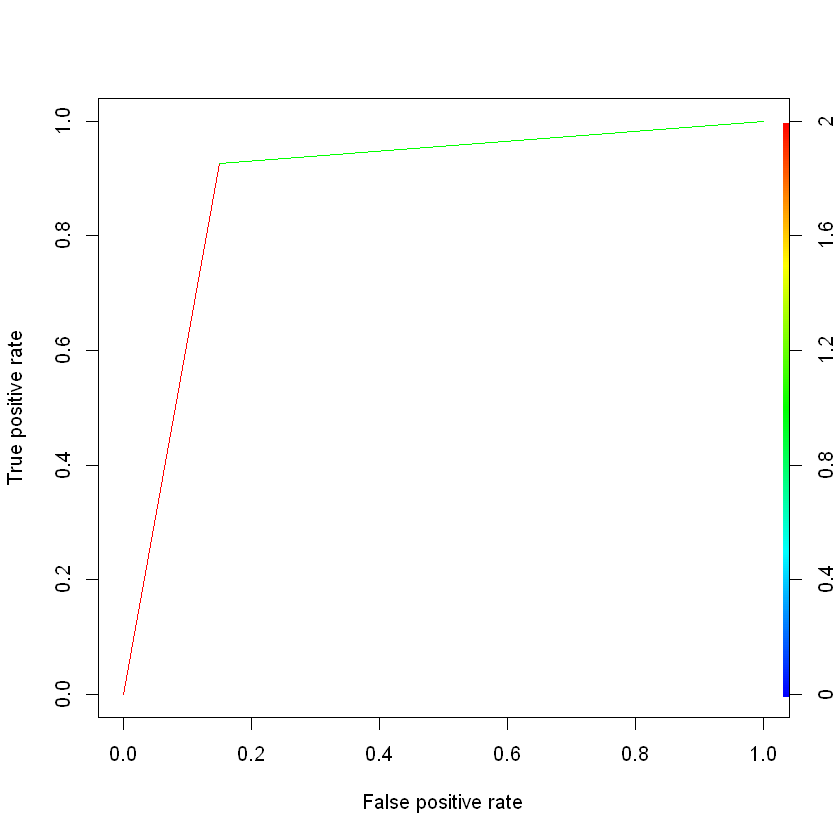

In [22]:
print("precision")
LR_precision_balanced_test<- dftest$byClass['Pos Pred Value']
LR_precision_balanced_test
print("recall")
LR_recall_balanced_test<- dftest$byClass['Sensitivity']
LR_recall_balanced_test
print("f-score")
LR_Fscore_balanced_test <- (2*LR_precision_balanced_test*LR_recall_balanced_test)/sum(LR_precision_balanced_test,LR_recall_balanced_test)
LR_Fscore_balanced_test 
print("accuracy")
LR_Accuracy_balanced_test <- dftest$overall['Accuracy']
LR_Accuracy_balanced_test

LR_predROCR_balanced_test <- prediction(predictLRtest, test$V15)
LR_perfROCR_balanced_test <- performance(LR_predROCR_balanced_test, "tpr", "fpr")
LR_perfROCR_balanced_test
AUC_balanced_test <- performance(LR_predROCR_balanced_test, "auc")@y.values
AUC_balanced_test
plot(LR_perfROCR_balanced_test, colorize = TRUE)

<b>Using logistic regression, we can see that the accuracy, recall, precision on the balanced train dataset  are 86.61, 85.9, 88.09 percents respectively and on the balanced test data are 88.7, 85, 92.73</b>

<b>Building Logistic regression on the train dataset of reduced using PCA and making prediction on test and train</b>

In [23]:
LRmodeltrain1<- glm(V15 ~., family = binomial, data = train1)

LRmodeltrain1

summary(LRmodeltrain1)
# Make predictions on the test data
predictLRtest1 <- predict(LRmodeltrain1,newdata = test1,type = "response")
# Make predictions on the train data
predictLRtrain1 <- predict(LRmodeltrain1,newdata = train1,type = "response")

predictLRtrain1 <- ifelse(predictLRtrain1 > 0.5,1,0)
predictLRtest1 <- ifelse(predictLRtest1 > 0.5,1,0)
#Confusion matrix on test and train
dftrain1=confusionMatrix(as.factor(predictLRtrain1), as.factor(train1$V15))
dftrain1
dftest1=confusionMatrix(as.factor(predictLRtest1), as.factor(test1$V15))
dftest1


Call:  glm(formula = V15 ~ ., family = binomial, data = train1)

Coefficients:
(Intercept)          V11          V42          V43          V52          V53  
   -4.95235     -0.15472      1.31936     17.49892      5.03080      4.92003  
        V54          V55          V56          V57          V58          V59  
    3.31593     -0.43741      3.78150      3.71172      4.88901      5.21308  
       V510         V511         V512         V513         V514          V62  
    6.78704      5.13097      4.21832      5.84308      9.14974     11.02312  
        V63          V64          V65          V67          V68          V69  
    0.25656     -2.86513     -3.49032     -1.07634     -2.16947     -6.31106  
        V81          V91         V111         V122         V123          PC1  
    3.83700      0.67874     -0.04777     -0.65718     19.29501      1.77112  
        PC2          PC3          PC4  
    1.94910     -0.05830     -3.74451  

Degrees of Freedom: 462 Total (i.e. Null);  430 R


Call:
glm(formula = V15 ~ ., family = binomial, data = train1)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.58146  -0.40767  -0.09072   0.46530   2.64723  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -4.95235    0.98465  -5.030 4.92e-07 ***
V11           -0.15472    0.36574  -0.423 0.672264    
V42            1.31936    0.42440   3.109 0.001879 ** 
V43           17.49892 2794.81830   0.006 0.995004    
V52            5.03080    2.08787   2.410 0.015973 *  
V53            4.92003    2.12205   2.319 0.020421 *  
V54            3.31593    1.91540   1.731 0.083416 .  
V55           -0.43741    1.90549  -0.230 0.818440    
V56            3.78150    2.00035   1.890 0.058702 .  
V57            3.71172    2.13782   1.736 0.082525 .  
V58            4.88901    1.96839   2.484 0.013000 *  
V59            5.21308    2.01990   2.581 0.009856 ** 
V510           6.78704    2.21455   3.065 0.002178 ** 
V511           5.13097    2

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 208  27
         1  33 195
                                          
               Accuracy : 0.8704          
                 95% CI : (0.8364, 0.8996)
    No Information Rate : 0.5205          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7407          
                                          
 Mcnemar's Test P-Value : 0.5186          
                                          
            Sensitivity : 0.8631          
            Specificity : 0.8784          
         Pos Pred Value : 0.8851          
         Neg Pred Value : 0.8553          
             Prevalence : 0.5205          
         Detection Rate : 0.4492          
   Detection Prevalence : 0.5076          
      Balanced Accuracy : 0.8707          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 50  2
         1 10 53
                                          
               Accuracy : 0.8957          
                 95% CI : (0.8248, 0.9449)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.7922          
                                          
 Mcnemar's Test P-Value : 0.04331         
                                          
            Sensitivity : 0.8333          
            Specificity : 0.9636          
         Pos Pred Value : 0.9615          
         Neg Pred Value : 0.8413          
             Prevalence : 0.5217          
         Detection Rate : 0.4348          
   Detection Prevalence : 0.4522          
      Balanced Accuracy : 0.8985          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
     0.9615385

[1] "recall"


Sensitivity 
  0.8333333

[1] "f-score"


Pos Pred Value 
     0.8928571

[1] "accuracy"


Accuracy 
0.8956522

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0000000 0.1666667 1.0000000


Slot "y.values":
[[1]]
[1] 0.0000000 0.9636364 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   1   0



[[1]]
[1] 0.8984848

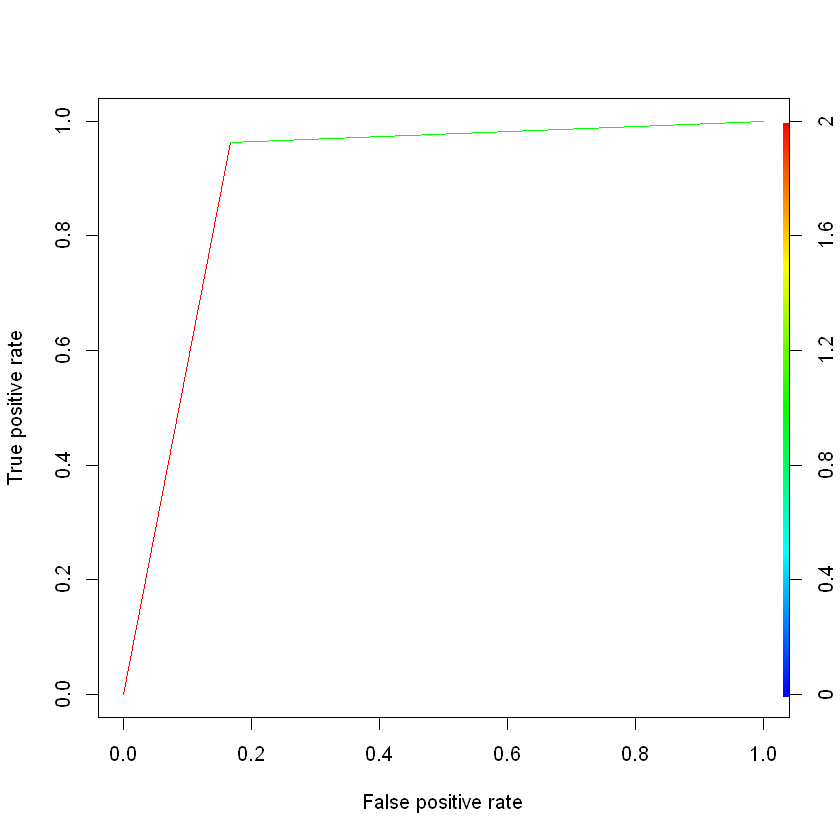

In [24]:
print("precision")
LR_precision_reduced_test <- dftest1$byClass['Pos Pred Value']
LR_precision_reduced_test
print("recall")
LR_recall_reduced_test <- dftest1$byClass['Sensitivity']
LR_recall_reduced_test
print("f-score")
LR_Fscore_reduced_test <- (2*LR_precision_reduced_test*LR_recall_reduced_test)/sum(LR_precision_reduced_test,LR_recall_reduced_test)
LR_Fscore_reduced_test 
print("accuracy")
LR_Accuracy_reduced_test <- dftest1$overall['Accuracy']
LR_Accuracy_reduced_test
library(ROCR)
LR_predROCR_reduced_test <- prediction(predictLRtest1, test1$V15)
LR_perfROCR_reduced_test <- performance(LR_predROCR_reduced_test, "tpr", "fpr")
LR_perfROCR_reduced_test
LR_AUC_reduced_test <- performance(LR_predROCR_reduced_test, "auc")@y.values
LR_AUC_reduced_test
plot(LR_perfROCR_reduced_test, colorize = TRUE)

<b>Using logistic regression, we can see that the accuracy, recall, precision on the reduced train dataset  are 87.04, 86.3, 88.51 percents respectively and on the reduced test data are 89.57, 83.33, 96.15</b>

<b>We can see that from both models not all the attributes are significant. Hence, feature selection should be done based on variable improtance</b>

<b>Getting the variable importance on the model built using balanced train dataset: </b>

In [25]:

importance <- varImp(LRmodeltrain, scale=FALSE)
print(importance)

         Overall
V11  0.587944199
V2   0.454083388
V3   1.775845873
V42  3.113858086
V43  0.005940932
V52  2.304328659
V53  2.263713557
V54  1.671129135
V55  0.021209540
V56  1.788598939
V57  1.747288289
V58  2.406559582
V59  2.516457846
V510 3.181247842
V511 2.510826923
V512 1.065878093
V513 2.706452005
V514 3.825665993
V62  0.004888830
V63  0.222366069
V64  1.452641877
V65  1.667651282
V67  0.471654938
V68  1.068364191
V69  2.755659491
V7   1.979978738
V81  9.393054981
V91  1.011326872
V10  1.571092902
V111 0.962873650
V122 1.090178307
V123 0.014329233
V13  4.111169565
V14  1.445843244


<b>Getting the variable importance on the model built using reduced train dataset: </b>

In [26]:
importance <- varImp(LRmodeltrain1, scale=FALSE)
print(importance)

         Overall
V11  0.423043278
V42  3.108788880
V43  0.006261203
V52  2.409535481
V53  2.318522597
V54  1.731200025
V55  0.229552516
V56  1.890415625
V57  1.736217416
V58  2.483761605
V59  2.580856522
V510 3.064755212
V511 2.556695971
V512 1.083781936
V513 2.829824331
V514 3.863742444
V62  0.005056576
V63  0.131988013
V64  1.555406217
V65  1.765089273
V67  0.439738599
V68  1.155927599
V69  2.539775678
V81  9.535193630
V91  1.859486782
V111 0.143047283
V122 1.259162954
V123 0.014053087
PC1  1.858570767
PC2  1.674819082
PC3  0.053795746
PC4  3.253764061


<b>Building Logistic regression on the train dataset of balanced considering only 4 important features and making prediction on test and train</b>

In [27]:
#Features considered V4,V5,V8,V13
LRmodeltrain<- glm(V15 ~., family = binomial, data = train[,-c(1,2,3,6,7,9,10,11,12,14)])

LRmodeltrain

summary(LRmodeltrain)

#LRmodel
# Make predictions on the test data
predictLRtest <- predict(LRmodeltrain,newdata = test,type = "response")
predictLRtrain <- predict(LRmodeltrain,newdata = train,type = "response")

predictLRtrain <- ifelse(predictLRtrain > 0.5,1,0)
predictLRtest <- ifelse(predictLRtest > 0.5,1,0)


dftrain=confusionMatrix(as.factor(predictLRtrain), as.factor(train$V15))
dftrain
dftest=confusionMatrix(as.factor(predictLRtest), as.factor(test$V15))
dftest



Call:  glm(formula = V15 ~ ., family = binomial, data = train[, -c(1, 
    2, 3, 6, 7, 9, 10, 11, 12, 14)])

Coefficients:
(Intercept)          V42          V43          V52          V53          V54  
   -3.76457      1.55413     17.31271      1.77827      1.40849      0.27966  
        V55          V56          V57          V58          V59         V510  
    0.09397      0.67171      0.44331      2.26754      1.97756      2.64977  
       V511         V512         V513         V514          V81          V13  
    2.03577      2.55584      2.70593      5.88279      3.43350     -3.55899  

Degrees of Freedom: 462 Total (i.e. Null);  445 Residual
Null Deviance:	    641.1 
Residual Deviance: 343.5 	AIC: 379.5


Call:
glm(formula = V15 ~ ., family = binomial, data = train[, -c(1, 
    2, 3, 6, 7, 9, 10, 11, 12, 14)])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4838  -0.5387  -0.1394   0.5271   2.3292  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -3.76457    0.72595  -5.186 2.15e-07 ***
V42           1.55413    0.38169   4.072 4.67e-05 ***
V43          17.31271  623.56843   0.028 0.977850    
V52           1.77827    0.82709   2.150 0.031552 *  
V53           1.40849    0.80615   1.747 0.080604 .  
V54           0.27966    0.80180   0.349 0.727250    
V55           0.09397    1.06291   0.088 0.929552    
V56           0.67171    0.71278   0.942 0.345995    
V57           0.44331    0.97374   0.455 0.648923    
V58           2.26754    0.64891   3.494 0.000475 ***
V59           1.97756    0.73308   2.698 0.006984 ** 
V510          2.64977    0.94721   2.797 0.005151 ** 
V511          2.03577    0.71171   2.860 0.004231 ** 
V512   

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 204  33
         1  37 189
                                          
               Accuracy : 0.8488          
                 95% CI : (0.8129, 0.8802)
    No Information Rate : 0.5205          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6973          
                                          
 Mcnemar's Test P-Value : 0.7199          
                                          
            Sensitivity : 0.8465          
            Specificity : 0.8514          
         Pos Pred Value : 0.8608          
         Neg Pred Value : 0.8363          
             Prevalence : 0.5205          
         Detection Rate : 0.4406          
   Detection Prevalence : 0.5119          
      Balanced Accuracy : 0.8489          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 48  3
         1 12 52
                                         
               Accuracy : 0.8696         
                 95% CI : (0.794, 0.9251)
    No Information Rate : 0.5217         
    P-Value [Acc > NIR] : 2.486e-15      
                                         
                  Kappa : 0.7404         
                                         
 Mcnemar's Test P-Value : 0.03887        
                                         
            Sensitivity : 0.8000         
            Specificity : 0.9455         
         Pos Pred Value : 0.9412         
         Neg Pred Value : 0.8125         
             Prevalence : 0.5217         
         Detection Rate : 0.4174         
   Detection Prevalence : 0.4435         
      Balanced Accuracy : 0.8727         
                                         
       'Positive' Class : 0              
                                         

[1] "precision"


Pos Pred Value 
     0.9411765

[1] "recall"


Sensitivity 
        0.8

[1] "f-score"


Pos Pred Value 
     0.8869565

[1] "accuracy"


Accuracy 
0.8695652

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.00 0.15 1.00


Slot "y.values":
[[1]]
[1] 0.0000000 0.9272727 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   1   0



[[1]]
[1] 0.8886364

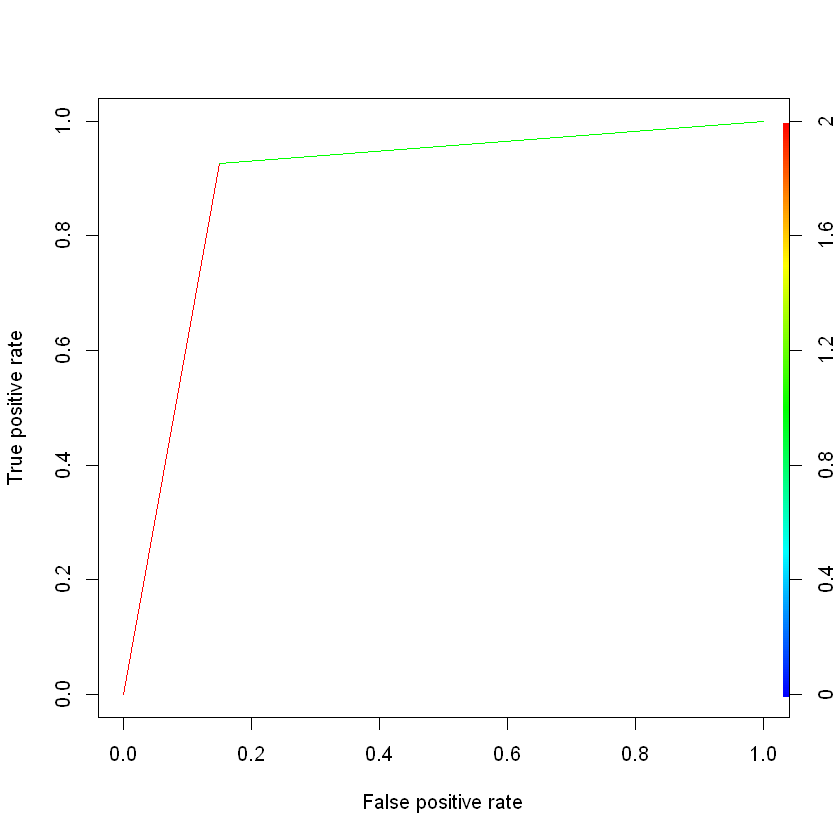

In [28]:
print("precision")
LR_precision_balanced_test_fr <- dftest$byClass['Pos Pred Value']
LR_precision_balanced_test_fr
print("recall")
LR_recall_balanced_test_fr <- dftest$byClass['Sensitivity']
LR_recall_balanced_test_fr
print("f-score")
LR_Fscore_balanced_test_fr <- (2*LR_precision_balanced_test*LR_recall_balanced_test)/sum(LR_precision_balanced_test,LR_recall_balanced_test)
LR_Fscore_balanced_test_fr 
print("accuracy")
LR_Accuracy_balanced_test_fr <- dftest$overall['Accuracy']
LR_Accuracy_balanced_test_fr
LR_predROCR_balanced_test_fr <- prediction(as.numeric(predictLRtest),as.numeric(test$V15))
LR_perfROCR_balanced_test_fr <- performance(LR_predROCR_balanced_test, "tpr", "fpr")
LR_perfROCR_balanced_test_fr
LR_AUC_balanced_test_fr <- performance(LR_predROCR_balanced_test, "auc")@y.values
LR_AUC_balanced_test_fr
plot(LR_perfROCR_balanced_test_fr, colorize = TRUE)

<b>Using logistic regression, we can see that the accuracy, recall, precision on the balanced train dataset with feature selection  are 84.88, 84.65, 86.08 percents respectively and on the balanced  test data are  86.98, 80.00, 94.12</b>

<b>Building Logistic regression on the train dataset of reduced considering only important features and making prediction on test and train</b>

In [29]:
#Features considered V1,V4,V5,PC4,V8,V9
LRmodeltrain1<- glm(V15 ~., family = binomial, data = train1[,-c(4,7,8,10,11,12)])

LRmodeltrain1

summary(LRmodeltrain1)



# Make predictions on the test data
predictLRtest1 <- predict(LRmodeltrain1,newdata = test1,type = "response")
predictLRtrain1 <- predict(LRmodeltrain1,newdata = train1,type = "response")

predictLRtrain1 <- ifelse(predictLRtrain1 > 0.5,1,0)
predictLRtest1 <- ifelse(predictLRtest1 > 0.5,1,0)


dftrain1=confusionMatrix(as.factor(predictLRtrain1), as.factor(train1$V15))
dftrain1
dftest1=confusionMatrix(as.factor(predictLRtest1), as.factor(test1$V15))
dftest1


Call:  glm(formula = V15 ~ ., family = binomial, data = train1[, -c(4, 
    7, 8, 10, 11, 12)])

Coefficients:
(Intercept)          V11          V42          V43          V52          V53  
   -5.00526     -0.13715      1.52431     17.58062      1.86787      1.36898  
        V54          V55          V56          V57          V58          V59  
    0.40320     -0.09256      0.64791      0.23711      2.22117      1.84831  
       V510         V511         V512         V513         V514          V81  
    2.61840      1.90921      2.69647      2.56541      5.85901      3.45645  
        V91          PC4  
    0.52968     -3.36592  

Degrees of Freedom: 462 Total (i.e. Null);  443 Residual
Null Deviance:	    641.1 
Residual Deviance: 341.8 	AIC: 381.8


Call:
glm(formula = V15 ~ ., family = binomial, data = train1[, -c(4, 
    7, 8, 10, 11, 12)])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5322  -0.5047  -0.1344   0.5177   2.3545  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -5.00526    0.75237  -6.653 2.88e-11 ***
V11          -0.13715    0.32700  -0.419 0.674899    
V42           1.52431    0.38729   3.936 8.29e-05 ***
V43          17.58062  623.57931   0.028 0.977508    
V52           1.86787    0.82499   2.264 0.023567 *  
V53           1.36898    0.81238   1.685 0.091960 .  
V54           0.40320    0.78596   0.513 0.607945    
V55          -0.09256    1.08951  -0.085 0.932299    
V56           0.64791    0.70239   0.922 0.356301    
V57           0.23711    0.97019   0.244 0.806921    
V58           2.22117    0.63629   3.491 0.000482 ***
V59           1.84831    0.70279   2.630 0.008540 ** 
V510          2.61840    0.90837   2.883 0.003945 ** 
V511          1.909

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 203  36
         1  38 186
                                          
               Accuracy : 0.8402          
                 95% CI : (0.8036, 0.8724)
    No Information Rate : 0.5205          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6799          
                                          
 Mcnemar's Test P-Value : 0.9075          
                                          
            Sensitivity : 0.8423          
            Specificity : 0.8378          
         Pos Pred Value : 0.8494          
         Neg Pred Value : 0.8304          
             Prevalence : 0.5205          
         Detection Rate : 0.4384          
   Detection Prevalence : 0.5162          
      Balanced Accuracy : 0.8401          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 48  2
         1 12 53
                                          
               Accuracy : 0.8783          
                 95% CI : (0.8042, 0.9318)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : 3.971e-16       
                                          
                  Kappa : 0.7579          
                                          
 Mcnemar's Test P-Value : 0.01616         
                                          
            Sensitivity : 0.8000          
            Specificity : 0.9636          
         Pos Pred Value : 0.9600          
         Neg Pred Value : 0.8154          
             Prevalence : 0.5217          
         Detection Rate : 0.4174          
   Detection Prevalence : 0.4348          
      Balanced Accuracy : 0.8818          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
          0.96

[1] "recall"


Sensitivity 
        0.8

[1] "f-score"


Pos Pred Value 
     0.8727273

[1] "accuracy"


Accuracy 
0.8782609

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0 0.2 1.0


Slot "y.values":
[[1]]
[1] 0.0000000 0.9636364 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   1   0



[[1]]
[1] 0.8818182

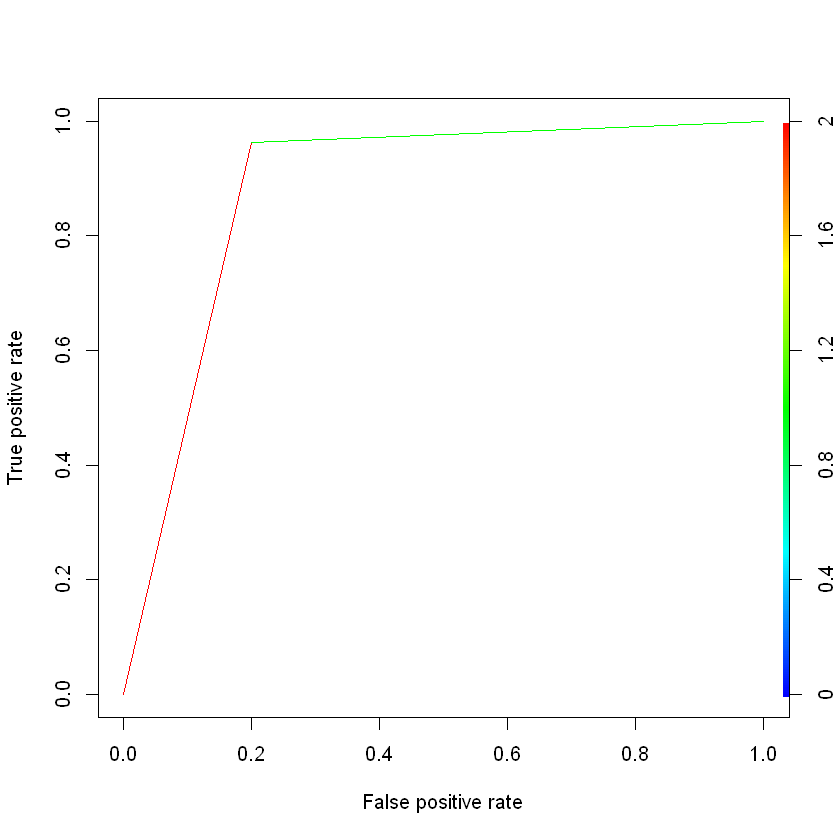

In [30]:
print("precision")
LR_precision_reduced_test_fr <- dftest1$byClass['Pos Pred Value']
LR_precision_reduced_test_fr
print("recall")
LR_recall_reduced_test_fr <- dftest1$byClass['Sensitivity']
LR_recall_reduced_test_fr
print("f-score")
LR_Fscore_reduced_test_fr <- (2*LR_precision_reduced_test_fr*LR_recall_reduced_test_fr)/sum(LR_precision_reduced_test_fr,LR_recall_reduced_test_fr)
LR_Fscore_reduced_test_fr 
print("accuracy")
LR_Accuracy_reduced_test_fr <- dftest1$overall['Accuracy']
LR_Accuracy_reduced_test_fr
LR_predROCR_reduced_test_fr <- prediction(as.numeric(predictLRtest1), as.numeric(test1$V15))
LR_perfROCR_reduced_test_fr <- performance(LR_predROCR_reduced_test_fr, "tpr", "fpr")
LR_perfROCR_reduced_test_fr
LR_AUC_reduced_test_fr <- performance(LR_predROCR_reduced_test_fr, "auc")@y.values
LR_AUC_reduced_test_fr
plot(LR_perfROCR_reduced_test_fr, colorize = TRUE)

<b>Using logistic regression, we can see that the accuracy, recall, precision on the reduced train dataset with feature selection  are 84.02, 84.23, 84.94 percents respectively and on the reduced test data are 87.83, 80.00, 96.00</b>

<b>We can see that the almost all the attributes are significant after feature selection</b>

### Naive Bayes

<b>Model bulding on the train of balanced dataset and making predictions on test and train</b>

In [31]:
Nbmodeltrain <- naiveBayes(train$V15 ~ . , data = train, laplace = 1)
Nbmodeltrain
#predictions
Nbtrainpredict <- predict(Nbmodeltrain,train, type = 'class')
Nbtestpredict <- predict(Nbmodeltrain,test, type = 'class')
#confusion matrix
con_mat <- confusionMatrix(as.factor(Nbtrainpredict), as.factor(train$V15))
con_mat
con_mat <- confusionMatrix(as.factor(Nbtestpredict), as.factor(test$V15))
con_mat


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.5205184 0.4794816 

Conditional probabilities:
   V1
Y           0         1
  0 0.2880658 0.7119342
  1 0.3080357 0.6919643

   V2
Y        [,1]      [,2]
  0 0.3190979 0.1602215
  1 0.3386977 0.1677235

   V3
Y        [,1]      [,2]
  0 0.2992251 0.1471758
  1 0.3300340 0.1631033

   V4
Y             1           2           3
  0 0.315573770 0.680327869 0.004098361
  1 0.111111111 0.875555556 0.013333333

   V5
Y             1           2           3           4           5           6
  0 0.129411765 0.050980392 0.082352941 0.101960784 0.031372549 0.117647059
  1 0.029661017 0.046610169 0.055084746 0.033898305 0.016949153 0.072033898
   V5
Y             7           8           9          10          11          12
  0 0.054901961 0.180392157 0.086274510 0.027450980 0.070588235 0.007843137
  1 0.016949153 0.228813559 0.088983051 

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 209  45
         1  32 177
                                          
               Accuracy : 0.8337          
                 95% CI : (0.7966, 0.8665)
    No Information Rate : 0.5205          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6661          
                                          
 Mcnemar's Test P-Value : 0.1715          
                                          
            Sensitivity : 0.8672          
            Specificity : 0.7973          
         Pos Pred Value : 0.8228          
         Neg Pred Value : 0.8469          
             Prevalence : 0.5205          
         Detection Rate : 0.4514          
   Detection Prevalence : 0.5486          
      Balanced Accuracy : 0.8323          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 54  9
         1  6 46
                                         
               Accuracy : 0.8696         
                 95% CI : (0.794, 0.9251)
    No Information Rate : 0.5217         
    P-Value [Acc > NIR] : 2.486e-15      
                                         
                  Kappa : 0.738          
                                         
 Mcnemar's Test P-Value : 0.6056         
                                         
            Sensitivity : 0.9000         
            Specificity : 0.8364         
         Pos Pred Value : 0.8571         
         Neg Pred Value : 0.8846         
             Prevalence : 0.5217         
         Detection Rate : 0.4696         
   Detection Prevalence : 0.5478         
      Balanced Accuracy : 0.8682         
                                         
       'Positive' Class : 0              
                                         

[1] "precision"


Pos Pred Value 
     0.8571429

[1] "recall"


Sensitivity 
        0.9

[1] "f-score"


Pos Pred Value 
     0.8780488

[1] "accuracy"


Accuracy 
0.8695652

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0 0.1 1.0


Slot "y.values":
[[1]]
[1] 0.0000000 0.8363636 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   2   1



[[1]]
[1] 0.8681818

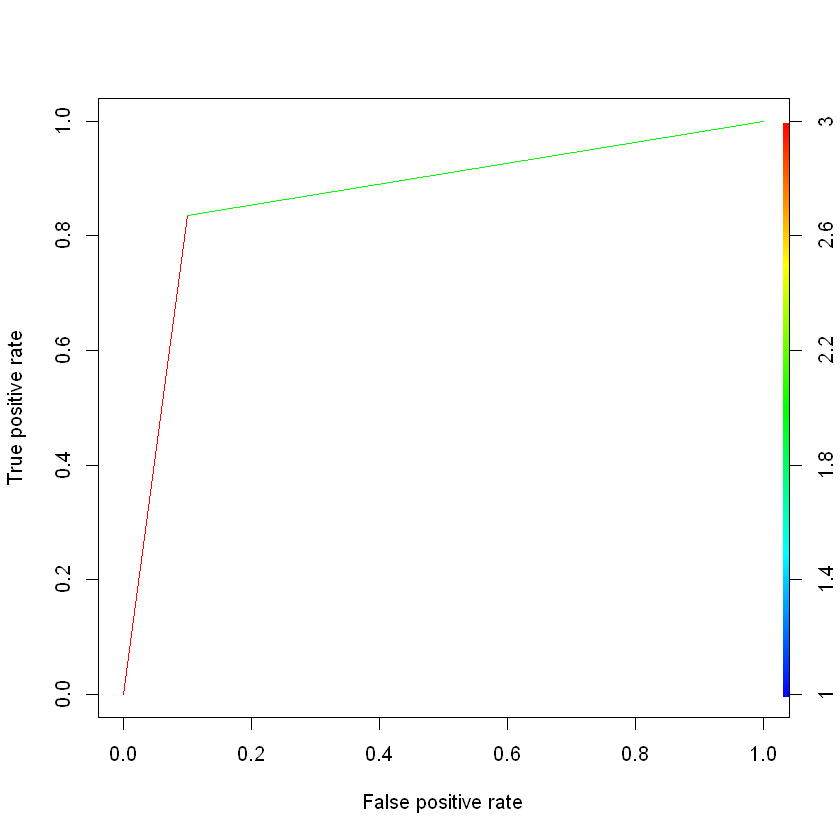

In [32]:
print("precision")
NB_precision_balanced_test <- con_mat$byClass['Pos Pred Value']
NB_precision_balanced_test
print("recall")
NB_recall_balanced_test <- con_mat$byClass['Sensitivity']
NB_recall_balanced_test
print("f-score")
NB_Fscore_balanced_test <- (2*NB_precision_balanced_test*NB_recall_balanced_test)/sum(NB_precision_balanced_test,NB_recall_balanced_test)
NB_Fscore_balanced_test 
print("accuracy")
NB_Accuracy_balanced_test <- con_mat$overall['Accuracy']
NB_Accuracy_balanced_test
NB_predROCR_balanced_test <- prediction(as.numeric(Nbtestpredict), as.numeric(test$V15))
NB_perfROCR_balanced_test <- performance(NB_predROCR_balanced_test, "tpr", "fpr")
NB_perfROCR_balanced_test
NB_AUC_balanced_test <- performance(NB_predROCR_balanced_test, "auc")@y.values
NB_AUC_balanced_test
plot(NB_perfROCR_balanced_test, colorize = TRUE)

<b>Using Naive Bayes, we can see that the accuracy, recall, precision on the reduced train dataset  are 83.37, 86.72, 82.28 percents respectively and on the reduced test data are 86.96, 90, 85.71</b>

In [33]:

Nbmodeltrain1 <- naiveBayes(train1$V15 ~ . , data = train1, laplace = 1)
#summary(nb_model)
Nbmodeltrain1
Nbtrain1predict <- predict(Nbmodeltrain1,train1, type = 'class')
con_mat <- confusionMatrix(as.factor(Nbtrain1predict), as.factor(train1$V15))
con_mat
Nbtest1predict <- predict(Nbmodeltrain,test1, type = 'class')
con_mat <- confusionMatrix(as.factor(Nbtest1predict), as.factor(test1$V15))
con_mat



Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.5205184 0.4794816 

Conditional probabilities:
   V1
Y           0         1
  0 0.2880658 0.7119342
  1 0.3080357 0.6919643

   V4
Y             1           2           3
  0 0.315573770 0.680327869 0.004098361
  1 0.111111111 0.875555556 0.013333333

   V5
Y             1           2           3           4           5           6
  0 0.129411765 0.050980392 0.082352941 0.101960784 0.031372549 0.117647059
  1 0.029661017 0.046610169 0.055084746 0.033898305 0.016949153 0.072033898
   V5
Y             7           8           9          10          11          12
  0 0.054901961 0.180392157 0.086274510 0.027450980 0.070588235 0.007843137
  1 0.016949153 0.228813559 0.088983051 0.050847458 0.161016949 0.012711864
   V5
Y            13          14
  0 0.050980392 0.007843137
  1 0.093220339 0.093220339

   V6
Y             1          

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 209  40
         1  32 182
                                          
               Accuracy : 0.8445          
                 95% CI : (0.8082, 0.8763)
    No Information Rate : 0.5205          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.688           
                                          
 Mcnemar's Test P-Value : 0.4094          
                                          
            Sensitivity : 0.8672          
            Specificity : 0.8198          
         Pos Pred Value : 0.8394          
         Neg Pred Value : 0.8505          
             Prevalence : 0.5205          
         Detection Rate : 0.4514          
   Detection Prevalence : 0.5378          
      Balanced Accuracy : 0.8435          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 50  3
         1 10 52
                                          
               Accuracy : 0.887           
                 95% CI : (0.8145, 0.9384)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.7747          
                                          
 Mcnemar's Test P-Value : 0.09609         
                                          
            Sensitivity : 0.8333          
            Specificity : 0.9455          
         Pos Pred Value : 0.9434          
         Neg Pred Value : 0.8387          
             Prevalence : 0.5217          
         Detection Rate : 0.4348          
   Detection Prevalence : 0.4609          
      Balanced Accuracy : 0.8894          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
     0.9433962

[1] "recall"


Sensitivity 
  0.8333333

[1] "f-score"


Pos Pred Value 
     0.8849558

[1] "accuracy"


Accuracy 
0.8869565

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0000000 0.1666667 1.0000000


Slot "y.values":
[[1]]
[1] 0.0000000 0.9454545 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   2   1



[[1]]
[1] 0.8893939

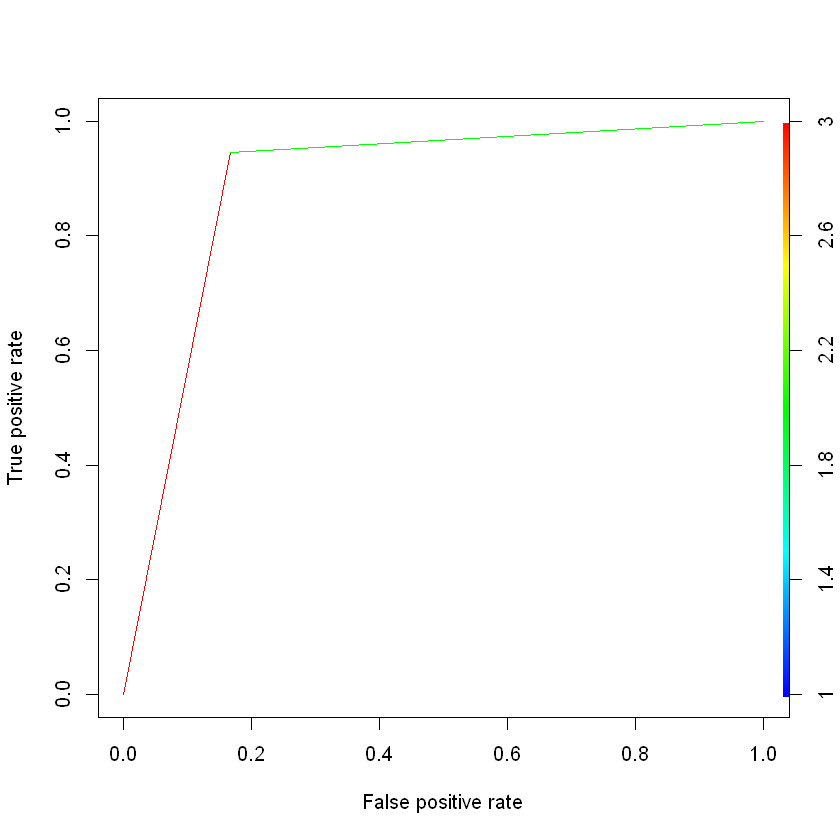

In [34]:
print("precision")
NB_precision_reduced_test <- con_mat$byClass['Pos Pred Value']
NB_precision_reduced_test
print("recall")
NB_recall_reduced_test <- con_mat$byClass['Sensitivity']
NB_recall_reduced_test
print("f-score")
NB_Fscore_reduced_test <- (2*NB_precision_reduced_test*NB_recall_reduced_test)/sum(NB_precision_reduced_test,NB_recall_reduced_test)
NB_Fscore_reduced_test 
print("accuracy")
NB_Accuracy_reduced_test <- con_mat$overall['Accuracy']
NB_Accuracy_reduced_test
NB_predROCR_reduced_test <- prediction(as.numeric(Nbtest1predict), as.numeric(test1$V15))
NB_perfROCR_reduced_test <- performance(NB_predROCR_reduced_test, "tpr", "fpr")
NB_perfROCR_reduced_test
NB_AUC_reduced_test <- performance(NB_predROCR_reduced_test, "auc")@y.values
NB_AUC_reduced_test
plot(NB_perfROCR_reduced_test, colorize = TRUE)

<b>Using Naive Bayes, we can see that the accuracy, recall, precision on the reduced train dataset  are 84.45, 86.72, 83.94 percents respectively and on the reduced test data are 88.7, 83.3, 94.34</b>

<b>Building Naive Bayes on the train dataset of balanced considering only 4 important features and making prediction on test and train</b>

In [35]:
#features considered: V4,V5,V8,V13
Nbmodeltrain <- naiveBayes(train$V15 ~ . , data = train[,-c(1,2,3,6,7,9,10,11,12,14)], laplace = 1)
#summary(nb_model)
Nbmodeltrain
Nbtrainpredict <- predict(Nbmodeltrain,train, type = 'class')
Nbtestpredict <- predict(Nbmodeltrain,test, type = 'class')
#Confusion matrix
con_mat <- confusionMatrix(as.factor(Nbtrainpredict), as.factor(train$V15))
con_mat
#Predictions
con_mat <- confusionMatrix(as.factor(Nbtestpredict), as.factor(test$V15))
con_mat



Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.5205184 0.4794816 

Conditional probabilities:
   V4
Y             1           2           3
  0 0.315573770 0.680327869 0.004098361
  1 0.111111111 0.875555556 0.013333333

   V5
Y             1           2           3           4           5           6
  0 0.129411765 0.050980392 0.082352941 0.101960784 0.031372549 0.117647059
  1 0.029661017 0.046610169 0.055084746 0.033898305 0.016949153 0.072033898
   V5
Y             7           8           9          10          11          12
  0 0.054901961 0.180392157 0.086274510 0.027450980 0.070588235 0.007843137
  1 0.016949153 0.228813559 0.088983051 0.050847458 0.161016949 0.012711864
   V5
Y            13          14
  0 0.050980392 0.007843137
  1 0.093220339 0.093220339

   V8
Y           0         1
  0 0.7860082 0.2139918
  1 0.1473214 0.8526786

   V13
Y        [,1]      [,2]


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 199  34
         1  42 188
                                          
               Accuracy : 0.8359          
                 95% CI : (0.7989, 0.8684)
    No Information Rate : 0.5205          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6716          
                                          
 Mcnemar's Test P-Value : 0.422           
                                          
            Sensitivity : 0.8257          
            Specificity : 0.8468          
         Pos Pred Value : 0.8541          
         Neg Pred Value : 0.8174          
             Prevalence : 0.5205          
         Detection Rate : 0.4298          
   Detection Prevalence : 0.5032          
      Balanced Accuracy : 0.8363          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 48  1
         1 12 54
                                          
               Accuracy : 0.887           
                 95% CI : (0.8145, 0.9384)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7754          
                                          
 Mcnemar's Test P-Value : 0.005546        
                                          
            Sensitivity : 0.8000          
            Specificity : 0.9818          
         Pos Pred Value : 0.9796          
         Neg Pred Value : 0.8182          
             Prevalence : 0.5217          
         Detection Rate : 0.4174          
   Detection Prevalence : 0.4261          
      Balanced Accuracy : 0.8909          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
     0.9795918

[1] "recall"


Sensitivity 
        0.8

[1] "f-score"


Pos Pred Value 
     0.8807339

[1] "accuracy"


Accuracy 
0.8869565

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0 0.2 1.0


Slot "y.values":
[[1]]
[1] 0.0000000 0.9818182 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   2   1



[[1]]
[1] 0.8909091

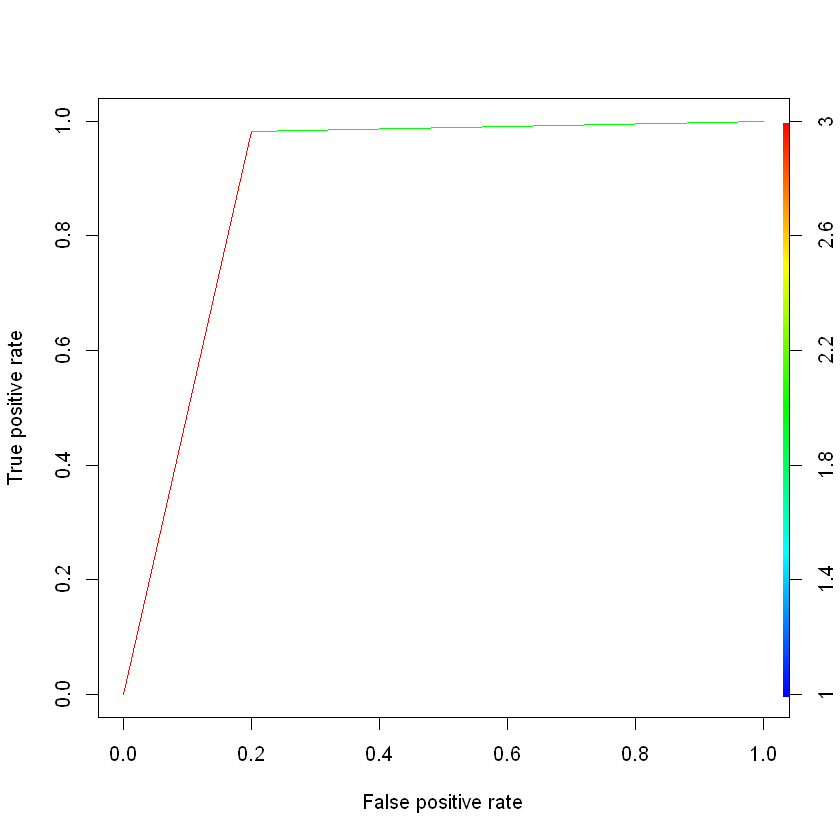

In [36]:
print("precision")
NB_precision_balanced_test_fr <- con_mat$byClass['Pos Pred Value']
NB_precision_balanced_test_fr
print("recall")
NB_recall_balanced_test_fr <- con_mat$byClass['Sensitivity']
NB_recall_balanced_test_fr
print("f-score")
NB_Fscore_balanced_test_fr <- (2*NB_precision_balanced_test_fr*NB_recall_balanced_test_fr)/sum(NB_precision_balanced_test_fr,NB_recall_balanced_test_fr)
NB_Fscore_balanced_test_fr 
print("accuracy")
NB_Accuracy_balanced_test_fr <- con_mat$overall['Accuracy']
NB_Accuracy_balanced_test_fr
library(ROCR)
NB_predROCR_balanced_test_fr <- prediction(as.numeric(Nbtestpredict), as.numeric(test$V15))
NB_perfROCR_balanced_test_fr <- performance(NB_predROCR_balanced_test_fr, "tpr", "fpr")
NB_perfROCR_balanced_test_fr
NB_AUC_balanced_test_fr <- performance(NB_predROCR_balanced_test_fr, "auc")@y.values
NB_AUC_balanced_test_fr
plot(NB_perfROCR_balanced_test_fr, colorize = TRUE)

<b>Using Naive Bayes, we can see that the accuracy, recall, precision on the balanced train dataset with feature selection are 83.59, 82.57, 85.41 percents respectively and on the balanced test data are 88.7, 80, 97.96</b>

<b>Building Naive Bayes on the train dataset of reduced considering  important features and making prediction on test and train</b>

In [37]:
#Features considered V1,V4,V5,PC4,V8,V9

Nbmodeltrain1 <- naiveBayes(train1$V15 ~ . , data = train1[,-c(4,7,8,10,11,12)], laplace = 1)
#summary(nb_model)
Nbmodeltrain1
Nbtrain1predict <- predict(Nbmodeltrain1,train1, type = 'class')
con_mat <- confusionMatrix(as.factor(Nbtrain1predict), as.factor(train1$V15))
con_mat
Nbtest1predict <- predict(Nbmodeltrain,test1, type = 'class')
con_mat <- confusionMatrix(as.factor(Nbtest1predict), as.factor(test1$V15))
con_mat



Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.5205184 0.4794816 

Conditional probabilities:
   V1
Y           0         1
  0 0.2880658 0.7119342
  1 0.3080357 0.6919643

   V4
Y             1           2           3
  0 0.315573770 0.680327869 0.004098361
  1 0.111111111 0.875555556 0.013333333

   V5
Y             1           2           3           4           5           6
  0 0.129411765 0.050980392 0.082352941 0.101960784 0.031372549 0.117647059
  1 0.029661017 0.046610169 0.055084746 0.033898305 0.016949153 0.072033898
   V5
Y             7           8           9          10          11          12
  0 0.054901961 0.180392157 0.086274510 0.027450980 0.070588235 0.007843137
  1 0.016949153 0.228813559 0.088983051 0.050847458 0.161016949 0.012711864
   V5
Y            13          14
  0 0.050980392 0.007843137
  1 0.093220339 0.093220339

   V8
Y           0         1
 

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 202  40
         1  39 182
                                         
               Accuracy : 0.8294         
                 95% CI : (0.792, 0.8625)
    No Information Rate : 0.5205         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.6581         
                                         
 Mcnemar's Test P-Value : 1              
                                         
            Sensitivity : 0.8382         
            Specificity : 0.8198         
         Pos Pred Value : 0.8347         
         Neg Pred Value : 0.8235         
             Prevalence : 0.5205         
         Detection Rate : 0.4363         
   Detection Prevalence : 0.5227         
      Balanced Accuracy : 0.8290         
                                         
       'Positive' Class : 0              
                                         

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 48  1
         1 12 54
                                          
               Accuracy : 0.887           
                 95% CI : (0.8145, 0.9384)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7754          
                                          
 Mcnemar's Test P-Value : 0.005546        
                                          
            Sensitivity : 0.8000          
            Specificity : 0.9818          
         Pos Pred Value : 0.9796          
         Neg Pred Value : 0.8182          
             Prevalence : 0.5217          
         Detection Rate : 0.4174          
   Detection Prevalence : 0.4261          
      Balanced Accuracy : 0.8909          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
     0.9795918

[1] "recall"


Sensitivity 
        0.8

[1] "f-score"


Pos Pred Value 
     0.8807339

[1] "accuracy"


Accuracy 
0.8869565

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0 0.2 1.0


Slot "y.values":
[[1]]
[1] 0.0000000 0.9818182 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   2   1



[[1]]
[1] 0.8909091

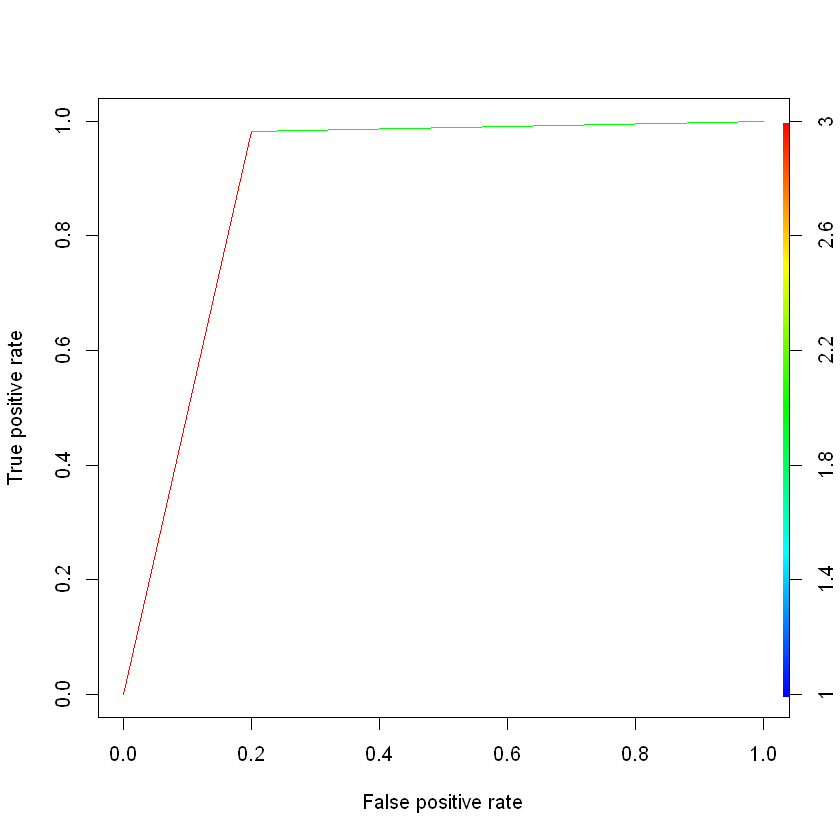

In [38]:
print("precision")
NB_precision_reduced_test_fr <- con_mat$byClass['Pos Pred Value']
NB_precision_reduced_test_fr
print("recall")
NB_recall_reduced_test_fr <- con_mat$byClass['Sensitivity']
NB_recall_reduced_test_fr
print("f-score")
NB_Fscore_reduced_test_fr <- (2*NB_precision_reduced_test_fr*NB_recall_reduced_test_fr)/sum(NB_precision_reduced_test_fr,NB_recall_reduced_test_fr)
NB_Fscore_reduced_test_fr 
print("accuracy")
NB_Accuracy_reduced_test_fr <- con_mat$overall['Accuracy']
NB_Accuracy_reduced_test_fr
library(ROCR)
NB_predROCR_reduced_test_fr <- prediction(as.numeric(Nbtest1predict), as.numeric(test1$V15))
NB_perfROCR_reduced_test_fr <- performance(NB_predROCR_reduced_test_fr, "tpr", "fpr")
NB_perfROCR_reduced_test_fr
NB_AUC_reduced_test_fr <- performance(NB_predROCR_reduced_test_fr, "auc")@y.values
NB_AUC_reduced_test_fr
plot(NB_perfROCR_reduced_test_fr, colorize = TRUE)

<b>Using Naive Bayes, we can see that the accuracy, recall, precision on the balanced train dataset with feature selection are 82.94, 83.82, 83.47 percents respectively and on the balanced test data are 88.7, 80, 97.96</b>

### SVM

<b>Model bulding on the train of balanced dataset and making predictions on test and train</b>

In [39]:
SVMmodeltrain = svm(formula = V15 ~ ., 
                 data = train, 
                 type = 'C-classification', 
                 kernel = 'linear') 
SVMmodeltrain
summary(SVMmodeltrain)
SVMtrainpredict <- predict(SVMmodeltrain,train, type = 'class')
con_mat <- confusionMatrix(as.factor(SVMtrainpredict), as.factor(train$V15))
con_mat
SVMtestpredict <- predict(SVMmodeltrain,test, type = 'class')
con_mat <- confusionMatrix(as.factor(SVMtestpredict), as.factor(test$V15))
con_mat


Call:
svm(formula = V15 ~ ., data = train, type = "C-classification", kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  173



Call:
svm(formula = V15 ~ ., data = train, type = "C-classification", kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  173

 ( 86 87 )


Number of Classes:  2 

Levels: 
 0 1




Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 190  22
         1  51 200
                                          
               Accuracy : 0.8423          
                 95% CI : (0.8059, 0.8743)
    No Information Rate : 0.5205          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6858          
                                          
 Mcnemar's Test P-Value : 0.001049        
                                          
            Sensitivity : 0.7884          
            Specificity : 0.9009          
         Pos Pred Value : 0.8962          
         Neg Pred Value : 0.7968          
             Prevalence : 0.5205          
         Detection Rate : 0.4104          
   Detection Prevalence : 0.4579          
      Balanced Accuracy : 0.8446          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 48  2
         1 12 53
                                          
               Accuracy : 0.8783          
                 95% CI : (0.8042, 0.9318)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : 3.971e-16       
                                          
                  Kappa : 0.7579          
                                          
 Mcnemar's Test P-Value : 0.01616         
                                          
            Sensitivity : 0.8000          
            Specificity : 0.9636          
         Pos Pred Value : 0.9600          
         Neg Pred Value : 0.8154          
             Prevalence : 0.5217          
         Detection Rate : 0.4174          
   Detection Prevalence : 0.4348          
      Balanced Accuracy : 0.8818          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
          0.96

[1] "recall"


Sensitivity 
        0.8

[1] "f-score"


Pos Pred Value 
     0.8727273

[1] "accuracy"


Accuracy 
0.8782609

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0 0.2 1.0


Slot "y.values":
[[1]]
[1] 0.0000000 0.9636364 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   2   1



[[1]]
[1] 0.8818182

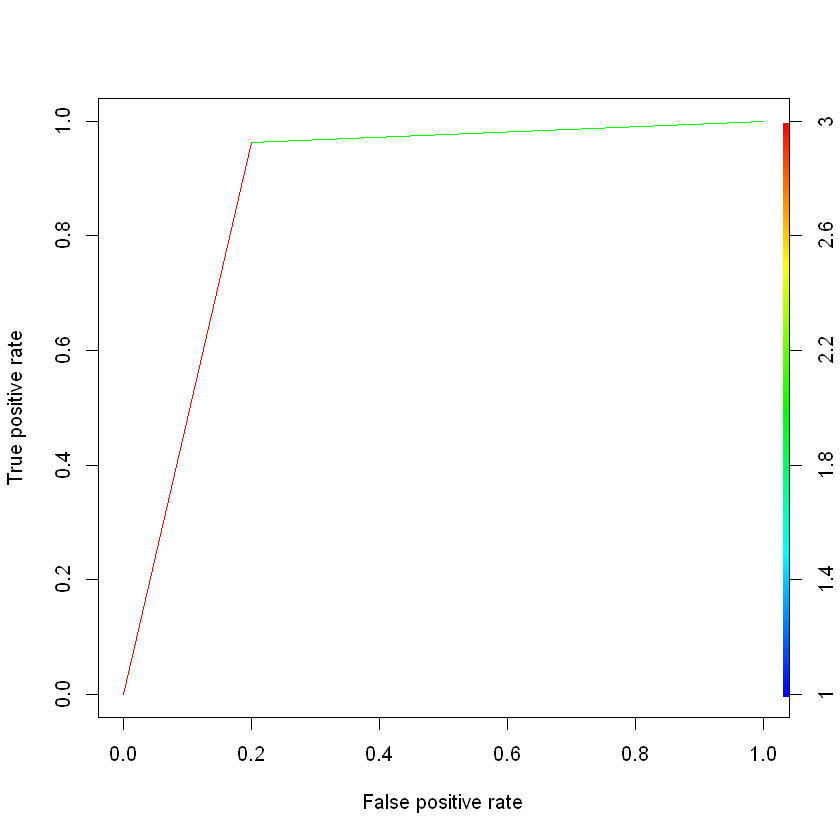

In [40]:
print("precision")
SVM_precision_balanced_test <- con_mat$byClass['Pos Pred Value']
SVM_precision_balanced_test
print("recall")
SVM_recall_balanced_test <- con_mat$byClass['Sensitivity']
SVM_recall_balanced_test
print("f-score")
SVM_Fscore_balanced_test <- (2*SVM_precision_balanced_test*SVM_recall_balanced_test)/sum(SVM_precision_balanced_test,SVM_recall_balanced_test)
SVM_Fscore_balanced_test 
print("accuracy")
SVM_Accuracy_balanced_test <- con_mat$overall['Accuracy']
SVM_Accuracy_balanced_test
SVM_predROCR_balanced_test <- prediction(as.numeric(SVMtestpredict), as.numeric(test$V15))
SVM_perfROCR_balanced_test <- performance(SVM_predROCR_balanced_test, "tpr", "fpr")
SVM_perfROCR_balanced_test
SVM_AUC_balanced_test <- performance(SVM_predROCR_balanced_test, "auc")@y.values
SVM_AUC_balanced_test
plot(SVM_perfROCR_balanced_test, colorize = TRUE)

<b>Using SVM, we can see that the accuracy, recall, precision on the balanced train dataset  are 84.23, 78.84, 89.62 percents respectively and on the reduced test data are 87.83, 80, 96</b>

<b>Model building on the train of reduced dataset and making predictions on test and train</b>

In [41]:
#on reduced dataset
SVMmodeltrain1 = svm(formula = V15 ~ ., 
                 data = train1, 
                 type = 'C-classification', 
                 kernel = 'linear') 
SVMmodeltrain1
summary(SVMmodeltrain1)
SVMtrainpredict1 <- predict(SVMmodeltrain1,train1, type = 'class')
con_mat <- confusionMatrix(as.factor(SVMtrainpredict1), as.factor(train1$V15))
con_mat
SVMtestpredict1 <- predict(SVMmodeltrain1,test1, type = 'class')
con_mat <- confusionMatrix(as.factor(SVMtestpredict1), as.factor(test1$V15))
con_mat



Call:
svm(formula = V15 ~ ., data = train1, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  190



Call:
svm(formula = V15 ~ ., data = train1, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  190

 ( 86 104 )


Number of Classes:  2 

Levels: 
 0 1




Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 190  22
         1  51 200
                                          
               Accuracy : 0.8423          
                 95% CI : (0.8059, 0.8743)
    No Information Rate : 0.5205          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6858          
                                          
 Mcnemar's Test P-Value : 0.001049        
                                          
            Sensitivity : 0.7884          
            Specificity : 0.9009          
         Pos Pred Value : 0.8962          
         Neg Pred Value : 0.7968          
             Prevalence : 0.5205          
         Detection Rate : 0.4104          
   Detection Prevalence : 0.4579          
      Balanced Accuracy : 0.8446          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 48  2
         1 12 53
                                          
               Accuracy : 0.8783          
                 95% CI : (0.8042, 0.9318)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : 3.971e-16       
                                          
                  Kappa : 0.7579          
                                          
 Mcnemar's Test P-Value : 0.01616         
                                          
            Sensitivity : 0.8000          
            Specificity : 0.9636          
         Pos Pred Value : 0.9600          
         Neg Pred Value : 0.8154          
             Prevalence : 0.5217          
         Detection Rate : 0.4174          
   Detection Prevalence : 0.4348          
      Balanced Accuracy : 0.8818          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
          0.96

[1] "recall"


Sensitivity 
        0.8

[1] "f-score"


Pos Pred Value 
     0.8727273

[1] "accuracy"


Accuracy 
0.8782609

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0 0.2 1.0


Slot "y.values":
[[1]]
[1] 0.0000000 0.9636364 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   2   1



[[1]]
[1] 0.8818182

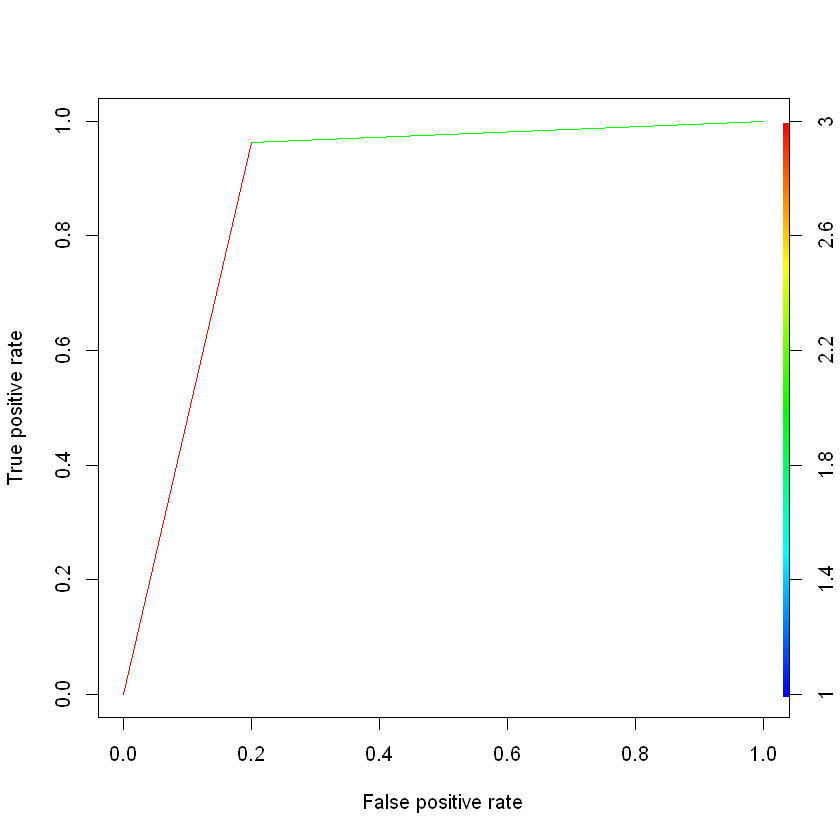

In [42]:
print("precision")
SVM_precision_reduced_test <- con_mat$byClass['Pos Pred Value']
SVM_precision_reduced_test
print("recall")
SVM_recall_reduced_test <- con_mat$byClass['Sensitivity']
SVM_recall_reduced_test
print("f-score")
SVM_Fscore_reduced_test <- (2*SVM_precision_reduced_test*SVM_recall_reduced_test)/sum(SVM_precision_reduced_test,SVM_recall_reduced_test)
SVM_Fscore_reduced_test 
print("accuracy")
SVM_Accuracy_reduced_test <- con_mat$overall['Accuracy']
SVM_Accuracy_reduced_test
SVM_predROCR_reduced_test <- prediction(as.numeric(SVMtestpredict1), as.numeric(test1$V15))
SVM_perfROCR_reduced_test <- performance(SVM_predROCR_reduced_test, "tpr", "fpr")
SVM_perfROCR_reduced_test
SVM_AUC_reduced_test <- performance(SVM_predROCR_reduced_test, "auc")@y.values
SVM_AUC_reduced_test
plot(SVM_perfROCR_reduced_test, colorize = TRUE)

<b>Using SVM, we can see that the accuracy, recall, precision on the reduced train dataset  are 84.23, 78.84, 89.62 percents respectively and on the reduced test data are 87.83, 80, 96</b>

<b>Variable Selection using R-miner</b>

In [43]:
library(rminer)
M <- fit(V15~., data=train, model="svm", kpar=list(sigma=0.10), C=2)
svm.imp <- Importance(M, data=train)
svm.imp

0,1
0.1474834,0.8525166
0.2077636,0.7922364
0,1
0.1665227,0.8334773
0.1885635,0.8114365
0.2086777,0.7913223
0.2769812,0.7230188
0.4650728,0.5349272
0.7051990,0.2948010
0.8150706,0.1849294


<b>Building SVM on the train dataset of balanced considering only 4 important features and making prediction on test and train</b>

In [44]:
#SVM based on feauture selection (V4,V5,V8,V13)
SVMmodeltrain = svm(formula = V15 ~ ., 
                 data = train[,-c(1,2,3,6,7,9,10,11,12,14)], 
                 type = 'C-classification', 
                 kernel = 'linear') 
SVMmodeltrain
summary(SVMmodeltrain)
SVMtrainpredict <- predict(SVMmodeltrain,train, type = 'class')
con_mat <- confusionMatrix(as.factor(SVMtrainpredict), as.factor(train$V15))
con_mat
SVMtestpredict <- predict(SVMmodeltrain,test, type = 'class')
con_mat <- confusionMatrix(as.factor(SVMtestpredict), as.factor(test$V15))
con_mat


Call:
svm(formula = V15 ~ ., data = train[, -c(1, 2, 3, 6, 7, 9, 10, 11, 
    12, 14)], type = "C-classification", kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  184



Call:
svm(formula = V15 ~ ., data = train[, -c(1, 2, 3, 6, 7, 9, 10, 11, 
    12, 14)], type = "C-classification", kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  184

 ( 92 92 )


Number of Classes:  2 

Levels: 
 0 1




Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 190  30
         1  51 192
                                          
               Accuracy : 0.8251          
                 95% CI : (0.7873, 0.8586)
    No Information Rate : 0.5205          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.6508          
                                          
 Mcnemar's Test P-Value : 0.02627         
                                          
            Sensitivity : 0.7884          
            Specificity : 0.8649          
         Pos Pred Value : 0.8636          
         Neg Pred Value : 0.7901          
             Prevalence : 0.5205          
         Detection Rate : 0.4104          
   Detection Prevalence : 0.4752          
      Balanced Accuracy : 0.8266          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 48  2
         1 12 53
                                          
               Accuracy : 0.8783          
                 95% CI : (0.8042, 0.9318)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : 3.971e-16       
                                          
                  Kappa : 0.7579          
                                          
 Mcnemar's Test P-Value : 0.01616         
                                          
            Sensitivity : 0.8000          
            Specificity : 0.9636          
         Pos Pred Value : 0.9600          
         Neg Pred Value : 0.8154          
             Prevalence : 0.5217          
         Detection Rate : 0.4174          
   Detection Prevalence : 0.4348          
      Balanced Accuracy : 0.8818          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
          0.96

[1] "recall"


Sensitivity 
        0.8

[1] "f-score"


Pos Pred Value 
     0.8727273

[1] "accuracy"


Accuracy 
0.8782609

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0 0.2 1.0


Slot "y.values":
[[1]]
[1] 0.0000000 0.9636364 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   2   1



[[1]]
[1] 0.8818182

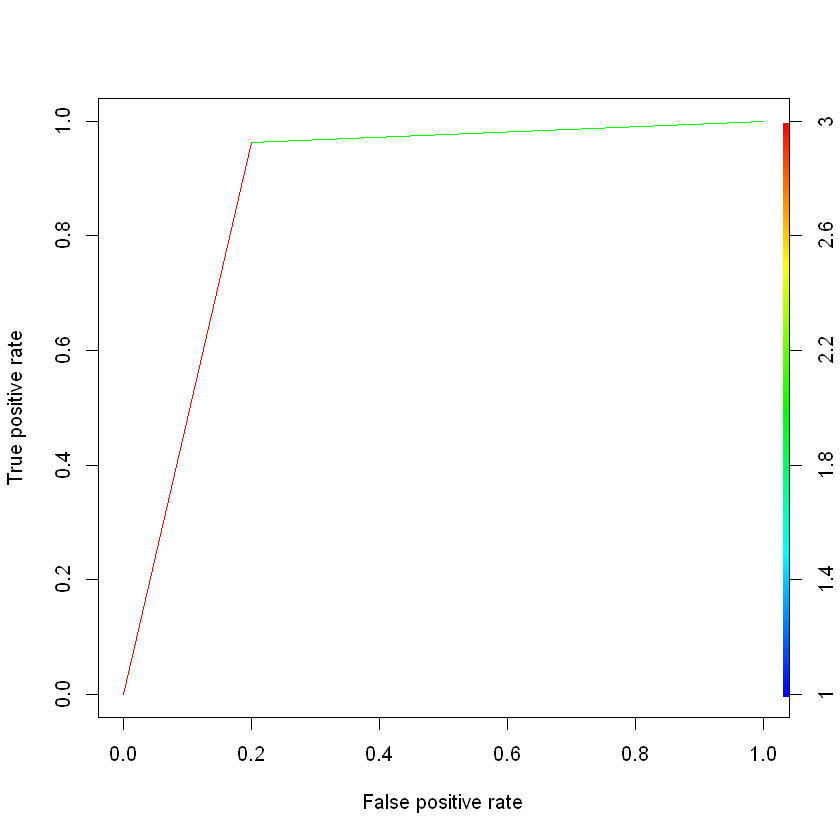

In [45]:
print("precision")
SVM_precision_balanced_test_fr <- con_mat$byClass['Pos Pred Value']
SVM_precision_balanced_test_fr
print("recall")
SVM_recall_balanced_test_fr <- con_mat$byClass['Sensitivity']
SVM_recall_balanced_test_fr
print("f-score")
SVM_Fscore_balanced_test_fr <- (2*SVM_precision_balanced_test_fr*SVM_recall_balanced_test_fr)/sum(SVM_precision_balanced_test_fr,SVM_recall_balanced_test_fr)
SVM_Fscore_balanced_test_fr 
print("accuracy")
SVM_Accuracy_balanced_test_fr <- con_mat$overall['Accuracy']
SVM_Accuracy_balanced_test_fr
library(ROCR)
SVM_predROCR_balanced_test_fr <- prediction(as.numeric(SVMtestpredict), as.numeric(test$V15))
SVM_perfROCR_balanced_test_fr <- performance(SVM_predROCR_balanced_test_fr, "tpr", "fpr")
SVM_perfROCR_balanced_test_fr
SVM_AUC_balanced_test_fr <- performance(SVM_predROCR_balanced_test_fr, "auc")@y.values
SVM_AUC_balanced_test_fr
plot(SVM_perfROCR_balanced_test_fr, colorize = TRUE)

<b>Using SVM, we can see that the accuracy, recall, precision on the balanced train dataset with feature selection are 82.51,78.84, 86.36 percents respectively and on the balanced test data are 87.83, 80, 96</b>

<b>Building SVM on the train dataset of reduced considering important features and making prediction on test and train</b>

In [46]:
#on reduced dataset 
#Features considered V1,V4,V5,PC4,V8,V9
SVMmodeltrain1 = svm(formula = V15 ~ ., 
                 data = train1[,-c(4,7,8,10,11,12)], 
                 type = 'C-classification', 
                 kernel = 'linear') 
SVMmodeltrain1
summary(SVMmodeltrain1)
SVMtrainpredict1 <- predict(SVMmodeltrain1,train1, type = 'class')
con_mat <- confusionMatrix(as.factor(SVMtrainpredict1), as.factor(train1$V15))
con_mat
SVMtestpredict1 <- predict(SVMmodeltrain1,test1, type = 'class')
con_mat <- confusionMatrix(as.factor(SVMtestpredict1), as.factor(test1$V15))
con_mat



Call:
svm(formula = V15 ~ ., data = train1[, -c(4, 7, 8, 10, 11, 12)], 
    type = "C-classification", kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  198



Call:
svm(formula = V15 ~ ., data = train1[, -c(4, 7, 8, 10, 11, 12)], 
    type = "C-classification", kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  198

 ( 97 101 )


Number of Classes:  2 

Levels: 
 0 1




Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 190  30
         1  51 192
                                          
               Accuracy : 0.8251          
                 95% CI : (0.7873, 0.8586)
    No Information Rate : 0.5205          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.6508          
                                          
 Mcnemar's Test P-Value : 0.02627         
                                          
            Sensitivity : 0.7884          
            Specificity : 0.8649          
         Pos Pred Value : 0.8636          
         Neg Pred Value : 0.7901          
             Prevalence : 0.5205          
         Detection Rate : 0.4104          
   Detection Prevalence : 0.4752          
      Balanced Accuracy : 0.8266          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 48  2
         1 12 53
                                          
               Accuracy : 0.8783          
                 95% CI : (0.8042, 0.9318)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : 3.971e-16       
                                          
                  Kappa : 0.7579          
                                          
 Mcnemar's Test P-Value : 0.01616         
                                          
            Sensitivity : 0.8000          
            Specificity : 0.9636          
         Pos Pred Value : 0.9600          
         Neg Pred Value : 0.8154          
             Prevalence : 0.5217          
         Detection Rate : 0.4174          
   Detection Prevalence : 0.4348          
      Balanced Accuracy : 0.8818          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
          0.96

[1] "recall"


Sensitivity 
        0.8

[1] "f-score"


Pos Pred Value 
     0.8727273

[1] "accuracy"


Accuracy 
0.8782609

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0 0.2 1.0


Slot "y.values":
[[1]]
[1] 0.0000000 0.9636364 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   2   1



[[1]]
[1] 0.8818182

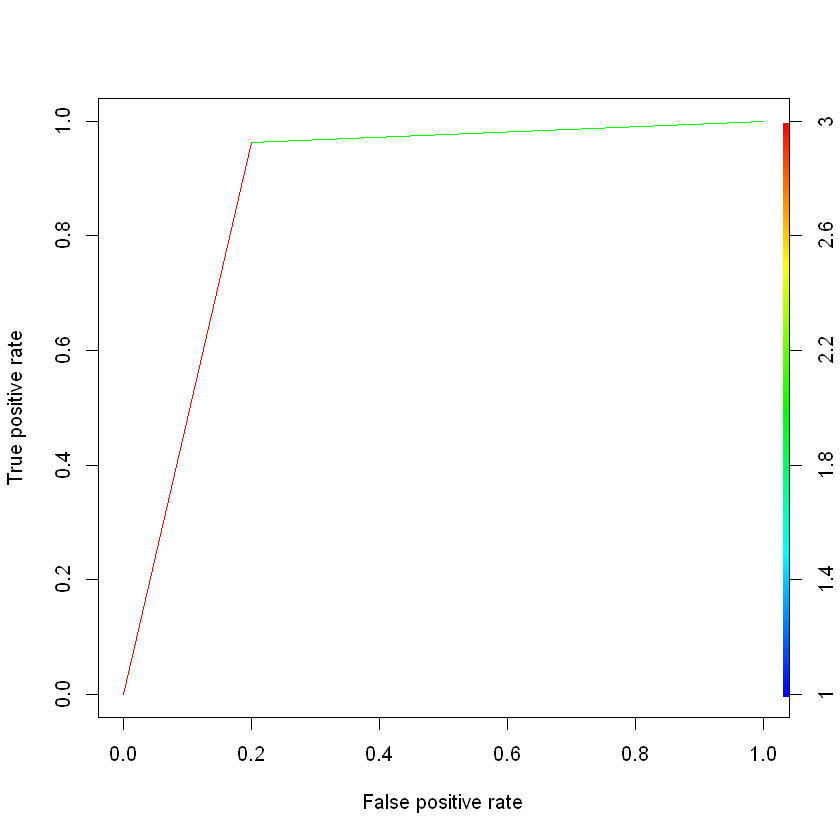

In [47]:
print("precision")
SVM_precision_reduced_test_fr <- con_mat$byClass['Pos Pred Value']
SVM_precision_reduced_test_fr
print("recall")
SVM_recall_reduced_test_fr <- con_mat$byClass['Sensitivity']
SVM_recall_reduced_test_fr
print("f-score")
SVM_Fscore_reduced_test_fr <- (2*SVM_precision_reduced_test_fr*SVM_recall_reduced_test_fr)/sum(SVM_precision_reduced_test_fr,SVM_recall_reduced_test_fr)
SVM_Fscore_reduced_test_fr 
print("accuracy")
SVM_Accuracy_reduced_test_fr <- con_mat$overall['Accuracy']
SVM_Accuracy_reduced_test_fr
library(ROCR)
SVM_predROCR_reduced_test_fr <- prediction(as.numeric(SVMtestpredict1), as.numeric(test1$V15))
SVM_perfROCR_reduced_test_fr <- performance(SVM_predROCR_reduced_test_fr, "tpr", "fpr")
SVM_perfROCR_reduced_test_fr
SVM_AUC_reduced_test_fr <- performance(SVM_predROCR_reduced_test_fr, "auc")@y.values
SVM_AUC_reduced_test_fr
plot(SVM_perfROCR_reduced_test_fr, colorize = TRUE)

<b>Using SVM, we can see that the accuracy, recall, precision on the reduced train dataset with feature selection are 83.59, 82.57, 85.41 percents respectively and on the reduced test data are 88.7, 80, 97.96</b>

### CART 

,V15,,.1,.2,.3,.4,.5,.6,.7,.8,...,,.1,.2,.3,.4,.5,.6,.7,.8,cover
32,0.00,when,V8,is,0,&,V10,>=,,,...,,,,,,,,,,20%
66,0.02,when,V8,is,0,&,V10,>=,,,...,0.24,,,,,,,,,11%
268,0.04,when,V8,is,0,&,V10,>=,,,...,,&,V7,<,0.37,,,,,5%
384,0.12,when,V8,is,1,&,V10,is,0.11,to,...,,,,,,&,V13,>=,0.29,7%
34,0.12,when,V8,is,0,&,V10,is,0.11,to,...,,,,,,,,,,3%
385,0.55,when,V8,is,1,&,V10,is,0.11,to,...,,,,,,&,V13,>=,0.29,2%
269,0.57,when,V8,is,0,&,V10,>=,,,...,0.24,&,V7,<,0.37,,,,,2%
193,0.61,when,V8,is,1,&,V10,is,0.11,to,...,,,,,,&,V13,<,0.29,4%
135,0.62,when,V8,is,0,&,V10,>=,,,...,,&,V7,>=,0.37,,,,,2%
9,0.71,when,V8,is,0,&,V10,<,0.11,,...,,,,,,,,,,2%


n= 463 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 463 222 0 (0.52051836 0.47948164)  
    2) V8=0 222  32 0 (0.85585586 0.14414414)  
      4) V12=1,2 214  24 0 (0.88785047 0.11214953)  
        8) V10>=0.105164 207  19 0 (0.90821256 0.09178744)  
         16) V5=1,2,3,4,5,6,7,8,9,11,12 184  11 0 (0.94021739 0.05978261)  
           32) V5=1,2,4,5,6,7,12 94   0 0 (1.00000000 0.00000000) *
           33) V5=3,8,9,11 90  11 0 (0.87777778 0.12222222)  
             66) V3>=0.2383649 51   1 0 (0.98039216 0.01960784) *
             67) V3< 0.2383649 39  10 0 (0.74358974 0.25641026)  
              134) V7< 0.3743873 31   5 0 (0.83870968 0.16129032)  
                268) V3< 0.2225646 24   1 0 (0.95833333 0.04166667) *
                269) V3>=0.2225646 7   3 1 (0.42857143 0.57142857) *
              135) V7>=0.3743873 8   3 1 (0.37500000 0.62500000) *
         17) V5=10,13,14 23   8 0 (0.65217391 0.34782609)  
           34) V10< 0.1400715 16   2 0 (0.8

[1] 0.9157667

[1] 0.9130435

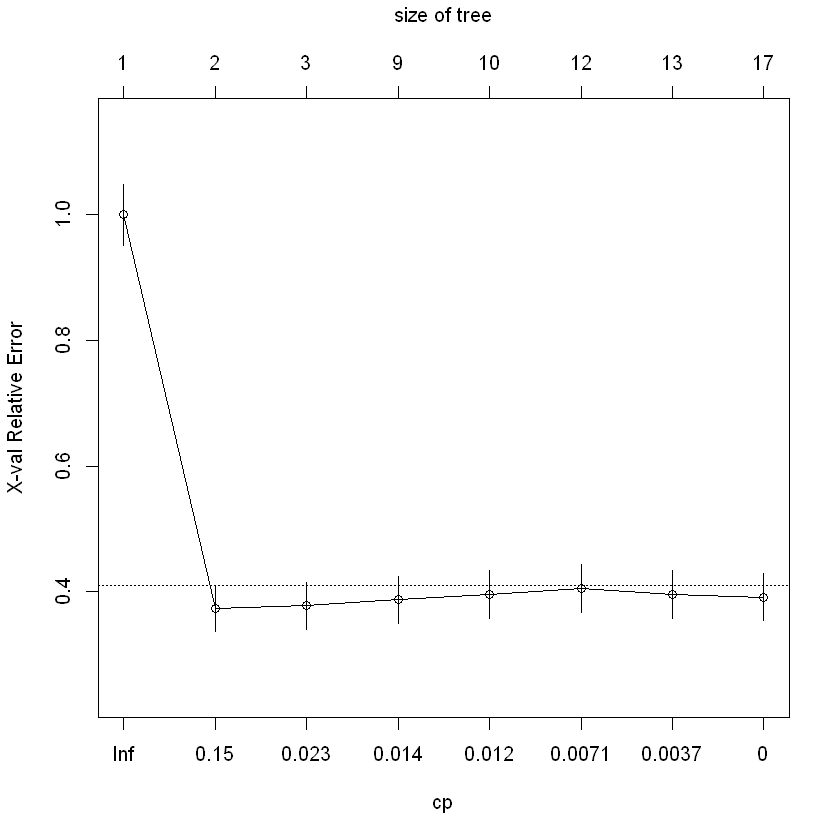

In [48]:

CARTmodel1 <- rpart(V15 ~., data = train, method = "class",control = rpart.control(cp = 0))
rpart.rules(CARTmodel1,  cover = TRUE) 
print(CARTmodel1)
printcp(CARTmodel1)
plotcp(CARTmodel1)
# Compute the train & test accuracy of the unpruned tree
Pred_unpruned_train <- predict(CARTmodel1, train, type = "class")
base_Trainaccuracy <- mean(Pred_unpruned_train == train$V15)
base_Trainaccuracy
Pred_unpruned_test <- predict(CARTmodel1, test, type = "class")
base_Testaccuracy <- mean(Pred_unpruned_test == test$V15)
base_Testaccuracy





<b>Building model on the balanced train dataset with prepruning</b>

In [49]:
# Grow a tree with minsplit of 100 and max depth of 8
CART_model_preprun1 <- rpart(V15 ~ ., data = train, method = "class", 
                          control = rpart.control(cp = 0, maxdepth = 8,minsplit = 100))
# Compute the accuracy of the pre pruned tree
Pred_prepruned_train <- predict(CART_model_preprun1, train, type = "class")
Preprun_Trainaccuracy <- mean(Pred_prepruned_train == train$V15)
Preprun_Trainaccuracy
Pred_prepruned_test <- predict(CART_model_preprun1, test, type = "class")
accuracy_preprun <- mean(Pred_prepruned_test == test$V15)
accuracy_preprun

[1] 0.8272138

[1] 0.8695652

<b>Post pruning based on CP  with minimum errorvalue on the balanced train dataset</b>

In [50]:
#CP with minimum xerror
which.min(CARTmodel1$cptable[,"xerror"])
CARTmodel1$cptable[which.min(CARTmodel1$cptable[,"xerror"]),"CP"]
# Prune the CARTmodel1 based on the optimal cp value
CART_model_pruned1 <- prune(CARTmodel1,cp= CARTmodel1$cptable[which.min(CARTmodel1$cptable[,"xerror"]),"CP"])
# Compute the accuracy of the pruned tree
Pred_postPruned_test <- predict(CART_model_pruned1, test, type = "class")
accuracy_postprun <- mean(Pred_postPruned_test == test$V15)
data.frame(base_Testaccuracy, accuracy_preprun, accuracy_postprun)


2 
2

[1] 0.03603604

base_Testaccuracy,accuracy_preprun,accuracy_postprun
0.9130435,0.8695652,0.8782609


Rattle: A free graphical interface for data science with R.
Version 5.3.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.

Attaching package: 'rattle'

The following object is masked from 'package:randomForest':

    importance



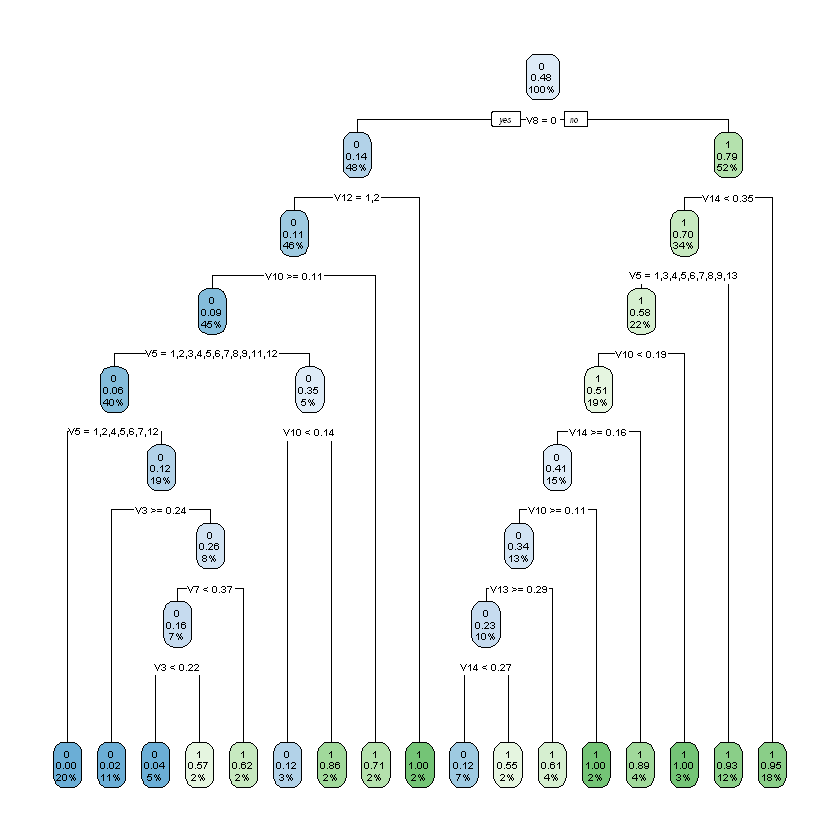

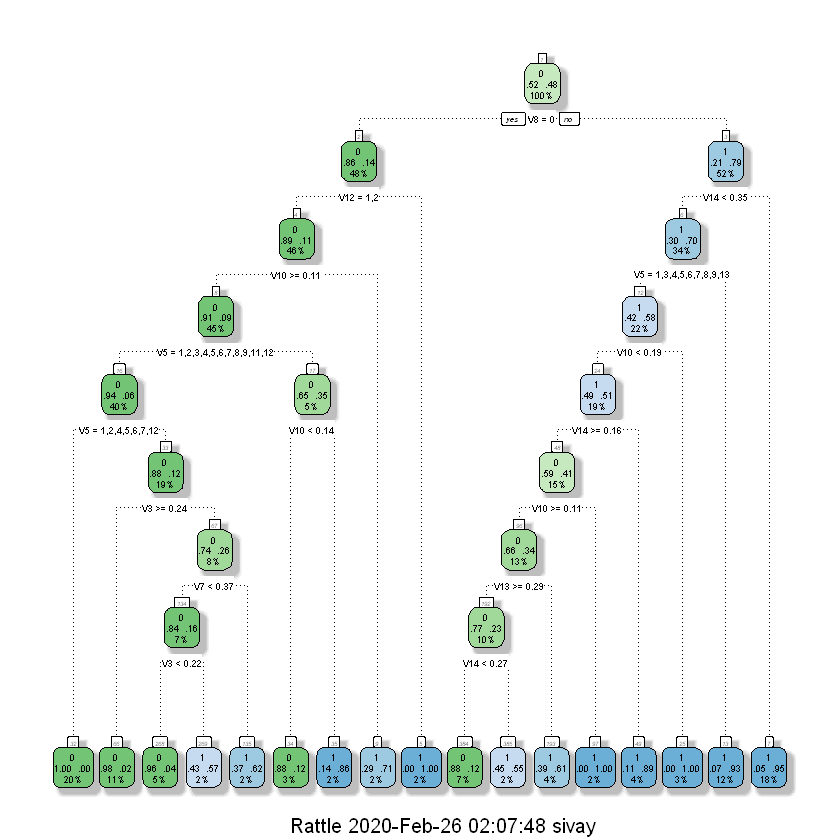

In [51]:
library(rattle)
library(RColorBrewer)
rpart.plot(CARTmodel1)
fancyRpartPlot(CARTmodel1)


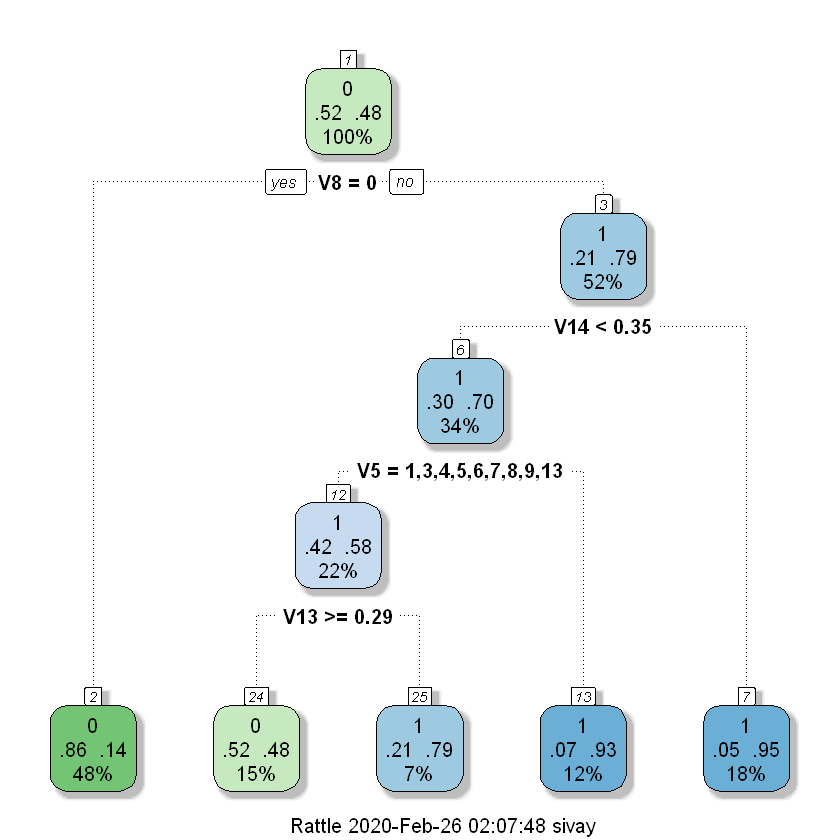

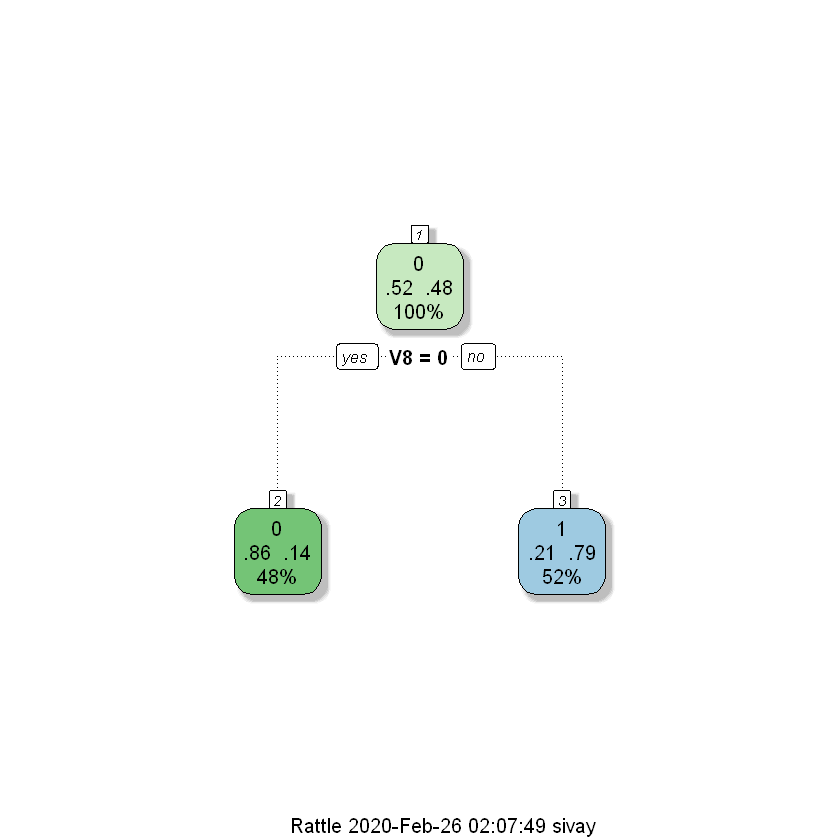

In [52]:

fancyRpartPlot(CART_model_preprun1)

fancyRpartPlot(CART_model_pruned1)


In [53]:
CARTmodel2 <- rpart(V15 ~., data = train1, method = "class",control = rpart.control(cp = 0))
rpart.rules(CARTmodel2,  cover = TRUE) 
CARTmodel2
printcp(CARTmodel2)

# Compute the train & test accuracy of the unpruned tree
Pred_unpruned_train1 <- predict(CARTmodel2, train1, type = "class")
base_Trainaccuracy1 <- mean(Pred_unpruned_train1 == train1$V15)
base_Trainaccuracy1
Pred_unpruned_test1 <- predict(CARTmodel2, test1, type = "class")
base_Testaccuracy1 <- mean(Pred_unpruned_test1 == test1$V15)
base_Testaccuracy1

,V15,,.1,.2,.3,.4,.5,.6,.7,.8,...,,.1,.2,.3,.4,.5,.6,.7,.8,cover
196,0.00,when,V8,is,1,&,V5,is,1 or 3 or 4 or 5 or 6 or 7 or 8 or 9 or 13,&,...,,,,,,&,V6,is,1 or 3 or 5,2%
8,0.03,when,V8,is,0,&,V5,is,1 or 2 or 3 or 4 or 5 or 6 or 7 or 11 or 12,,...,,&,V12,is,1 or 2,,,,,28%
394,0.14,when,V8,is,1,&,V5,is,1 or 3 or 4 or 5 or 6 or 7 or 8 or 9 or 13,&,...,0.121,,,,,&,V6,is,4 or 8,2%
18,0.18,when,V8,is,0,&,V5,is,8 or 9 or 10 or 13 or 14,,...,,&,V12,is,2,,,,,16%
48,0.19,when,V8,is,1,&,V5,is,1 or 3 or 4 or 5 or 6 or 7 or 8 or 9 or 13,&,...,,,,,,,,,,3%
100,0.45,when,V8,is,1,&,V5,is,1 or 3 or 4 or 5 or 6 or 7 or 8 or 9 or 13,&,...,0.056,,,,,,,,,2%
19,0.64,when,V8,is,0,&,V5,is,8 or 9 or 10 or 13 or 14,,...,,&,V12,is,1,,,,,2%
395,0.67,when,V8,is,1,&,V5,is,1 or 3 or 4 or 5 or 6 or 7 or 8 or 9 or 13,&,...,0.121,,,,,&,V6,is,4 or 8,4%
99,0.79,when,V8,is,1,&,V5,is,1 or 3 or 4 or 5 or 6 or 7 or 8 or 9 or 13,&,...,,,,,,,,,,4%
101,0.89,when,V8,is,1,&,V5,is,1 or 3 or 4 or 5 or 6 or 7 or 8 or 9 or 13,&,...,0.056,,,,,,,,,2%


n= 463 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 463 222 0 (0.52051836 0.47948164)  
    2) V8=0 222  32 0 (0.85585586 0.14414414)  
      4) V12=1,2 214  24 0 (0.88785047 0.11214953)  
        8) V5=1,2,3,4,5,6,7,11,12 130   4 0 (0.96923077 0.03076923) *
        9) V5=8,9,10,13,14 84  20 0 (0.76190476 0.23809524)  
         18) V12=2 73  13 0 (0.82191781 0.17808219) *
         19) V12=1 11   4 1 (0.36363636 0.63636364) *
      5) V12=3 8   0 1 (0.00000000 1.00000000) *
    3) V8=1 241  51 1 (0.21161826 0.78838174)  
      6) PC2< 0.02990768 155  47 1 (0.30322581 0.69677419)  
       12) V5=1,3,4,5,6,7,8,9,13 101  43 1 (0.42574257 0.57425743)  
         24) PC2>=-0.1110288 67  31 0 (0.53731343 0.46268657)  
           48) PC1< -0.1641544 16   3 0 (0.81250000 0.18750000) *
           49) PC1>=-0.1641544 51  23 1 (0.45098039 0.54901961)  
             98) V9=0 32  13 0 (0.59375000 0.40625000)  
              196) V6=1,3,5 7   0 0 (1.00000000 0.000000


Classification tree:
rpart(formula = V15 ~ ., data = train1, method = "class", control = rpart.control(cp = 0))

Variables actually used in tree construction:
[1] PC1 PC2 PC4 V12 V5  V6  V8  V9 

Root node error: 222/463 = 0.47948

n= 463 

         CP nsplit rel error  xerror     xstd
1 0.6261261      0   1.00000 1.00000 0.048422
2 0.0360360      1   0.37387 0.37387 0.037178
3 0.0144144      2   0.33784 0.35135 0.036277
4 0.0135135      7   0.26577 0.35586 0.036462
5 0.0067568      9   0.23874 0.36937 0.037002
6 0.0022523     11   0.22523 0.38739 0.037694
7 0.0000000     13   0.22072 0.40090 0.038193


[1] 0.8941685

[1] 0.8608696

In [54]:
# Grow a tree with minsplit of 100 and max depth of 8
CART_model_preprun2 <- rpart(V15 ~ ., data = train1, method = "class", 
                             control = rpart.control(cp = 0, maxdepth = 8,minsplit = 100))
# Compute the accuracy of the pre pruned tree
Pred_prepruned_train1 <- predict(CART_model_preprun2, train1, type = "class")
Preprun_Trainaccuracy1 <- mean(Pred_prepruned_train1 == train1$V15)
Preprun_Trainaccuracy1
Pred_prepruned_test1 <- predict(CART_model_preprun2, test1, type = "class")
accuracy_preprun1 <- mean(Pred_prepruned_test1 == test1$V15)
accuracy_preprun1

[1] 0.8315335

[1] 0.8608696

In [55]:
#CP with minimum xerror
which.min(CARTmodel2$cptable[,"xerror"])
CARTmodel2$cptable[which.min(CARTmodel2$cptable[,"xerror"]),"CP"]
#Postpruning
# Prune the CARTmodel2 based on the optimal cp value
CART_model_pruned2 <- prune(CARTmodel2,cp= CARTmodel2$cptable[which.min(CARTmodel2$cptable[,"xerror"]),"CP"])
# Compute the accuracy of the pruned tree
Pred_postPruned_test1 <- predict(CART_model_pruned2, test1, type = "class")
accuracy_postprun1 <- mean(Pred_postPruned_test1 == test1$V15)
data.frame(base_Testaccuracy1, accuracy_preprun1, accuracy_postprun1)

3 
3

[1] 0.01441441

base_Testaccuracy1,accuracy_preprun1,accuracy_postprun1
0.8608696,0.8608696,0.8782609


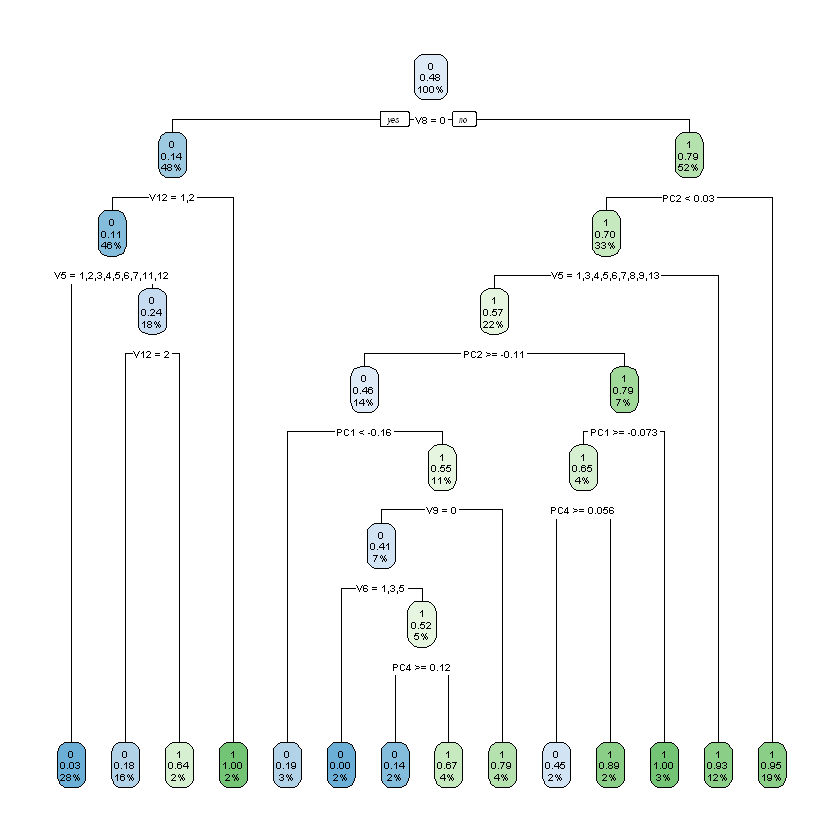

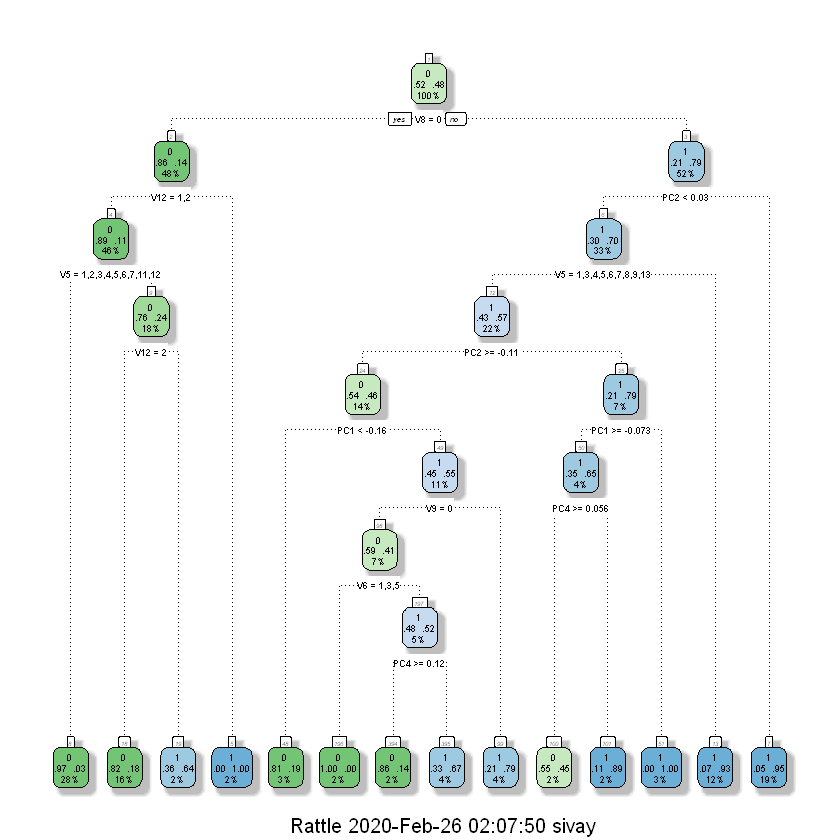

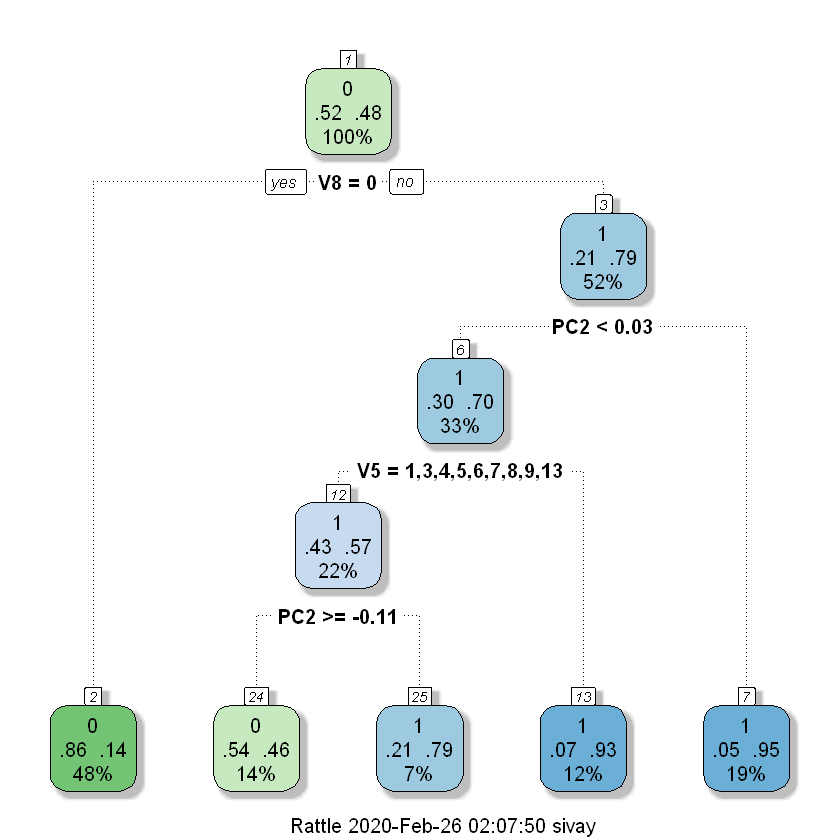

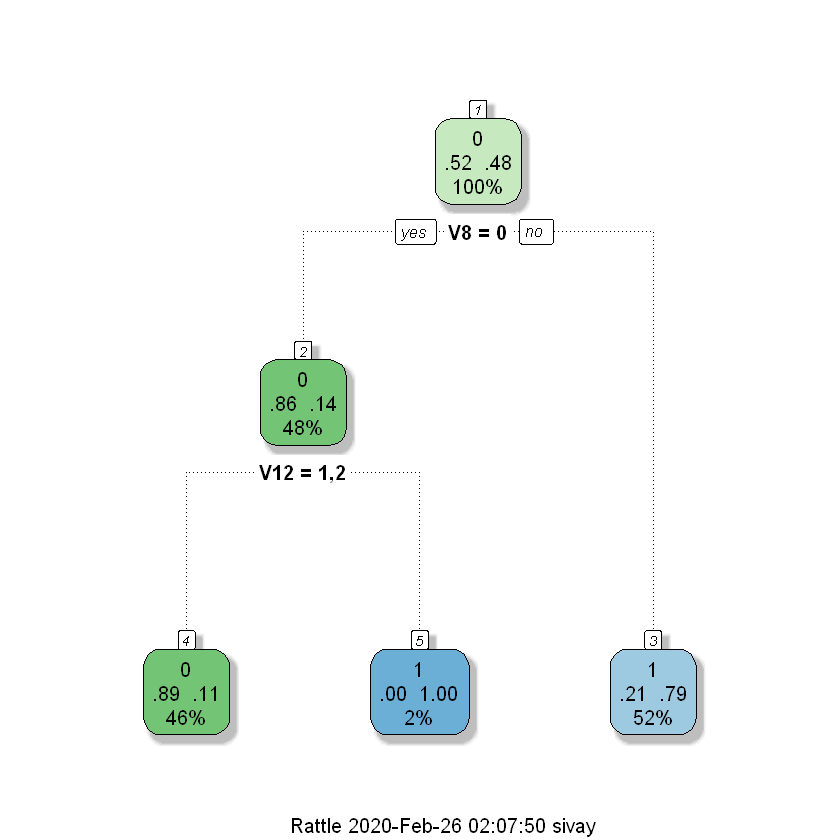

In [56]:
# Plot the trees
par(xpd = NA) 
rpart.plot(CARTmodel2)
fancyRpartPlot(CARTmodel2)
#text(CARTmodel2, digits = 3)
fancyRpartPlot(CART_model_preprun2)
#text(CARTmodel2, digits = 3)
fancyRpartPlot(CART_model_pruned2)
#text(CARTmodel2, digits = 3)


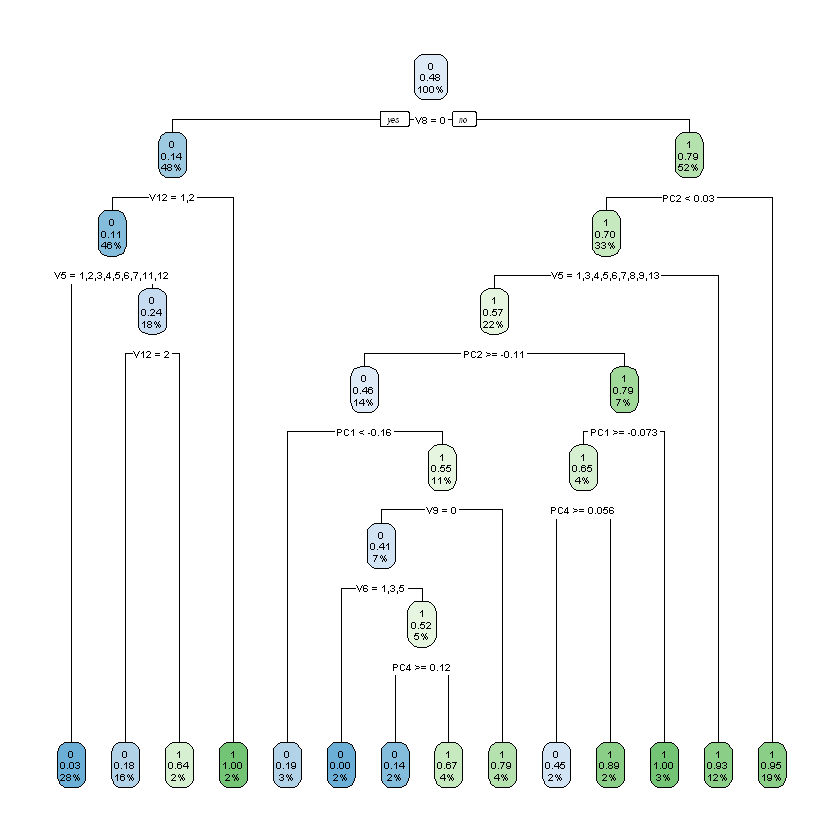

In [57]:
rpart.plot(CARTmodel2)

### C5.0

<b>Building C5.0 on the train dataset of balanced and making prediction on test and train</b>

In [58]:
C5.0_tree <- C5.0(V15 ~ ., data=train, rules = TRUE)
summary(C5.0_tree)

# plot tree 
#plot(C5.0_tree,main="Classification Tree forAustralian Credit score balance dataset")

train_predictions <- predict(C5.0_tree, train)

test_predictions <- predict(C5.0_tree, test)

con_mat <- confusionMatrix(as.factor(train_predictions), as.factor(train$V15))
con_mat
con_mat1 <- confusionMatrix(as.factor(test_predictions), as.factor(test$V15))
con_mat1


Call:
C5.0.formula(formula = V15 ~ ., data = train, rules = TRUE)


C5.0 [Release 2.07 GPL Edition]  	Wed Feb 26 02:07:51 2020
-------------------------------

Class specified by attribute `outcome'

Read 463 cases (15 attributes) from undefined.data

Rules:

Rule 1: (95, lift 1.9)
	V5 in {1, 2, 4, 5, 6, 7, 12}
	V8 = 0
	->  class 0  [0.990]

Rule 2: (127/1, lift 1.9)
	V8 = 0
	V10 > 0.1070195
	V10 <= 0.1399225
	V12 = 2
	V14 > 0.1435927
	->  class 0  [0.984]

Rule 3: (56, lift 1.9)
	V4 = 1
	V10 > 0.1070195
	V10 <= 0.1399225
	V12 = 2
	->  class 0  [0.983]

Rule 4: (43/1, lift 1.8)
	V8 = 0
	V9 = 1
	V12 = 2
	->  class 0  [0.956]

Rule 5: (46/6, lift 1.6)
	V6 in {1, 3, 5}
	V9 = 0
	V10 > 0.1085314
	V14 <= 0.4440752
	->  class 0  [0.854]

Rule 6: (151/35, lift 1.5)
	V6 = 4
	V9 = 0
	V10 > 0.1085314
	->  class 0  [0.765]

Rule 7: (36, lift 2.0)
	V8 = 1
	V10 <= 0.1085314
	->  class 1  [0.974]

Rule 8: (32/1, lift 2.0)
	V5 in {3, 8, 11, 13, 14}
	V10 <= 0.1070195
	->  class 1  [0.941]

Rule 9: (21

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 220  18
         1  21 204
                                          
               Accuracy : 0.9158          
                 95% CI : (0.8866, 0.9394)
    No Information Rate : 0.5205          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8313          
                                          
 Mcnemar's Test P-Value : 0.7488          
                                          
            Sensitivity : 0.9129          
            Specificity : 0.9189          
         Pos Pred Value : 0.9244          
         Neg Pred Value : 0.9067          
             Prevalence : 0.5205          
         Detection Rate : 0.4752          
   Detection Prevalence : 0.5140          
      Balanced Accuracy : 0.9159          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 52  8
         1  8 47
                                          
               Accuracy : 0.8609          
                 95% CI : (0.7839, 0.9183)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : 1.445e-14       
                                          
                  Kappa : 0.7212          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8667          
            Specificity : 0.8545          
         Pos Pred Value : 0.8667          
         Neg Pred Value : 0.8545          
             Prevalence : 0.5217          
         Detection Rate : 0.4522          
   Detection Prevalence : 0.5217          
      Balanced Accuracy : 0.8606          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
     0.8666667

[1] "recall"


Sensitivity 
  0.8666667

[1] "f-score"


Pos Pred Value 
     0.8666667

[1] "accuracy"


Accuracy 
0.8608696

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0000000 0.1333333 1.0000000


Slot "y.values":
[[1]]
[1] 0.0000000 0.8545455 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   2   1



[[1]]
[1] 0.8606061

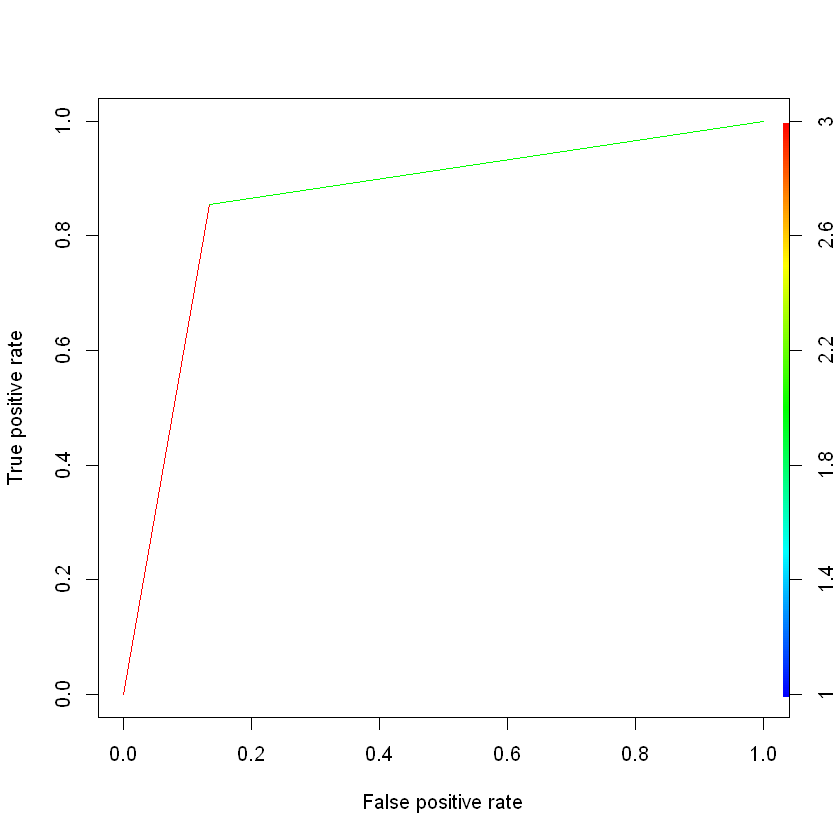

In [59]:
#Precision and Recall
print("precision")
C5_precision_balanced_test <- con_mat1$byClass['Pos Pred Value']
C5_precision_balanced_test
print("recall")
C5_recall_balanced_test <- con_mat1$byClass['Sensitivity']
C5_recall_balanced_test
print("f-score")
C5_Fscore_balanced_test <- (2*C5_precision_balanced_test*C5_recall_balanced_test)/sum(C5_precision_balanced_test,C5_recall_balanced_test)
C5_Fscore_balanced_test 
print("accuracy")
C5_Accuracy_balanced_test <- con_mat1$overall['Accuracy']
C5_Accuracy_balanced_test
library(ROCR)
C5_predROCR_balanced_test <- prediction(as.numeric(test_predictions), as.numeric(test$V15))
C5_perfROCR_balanced_test <- performance(C5_predROCR_balanced_test, "tpr", "fpr")
C5_perfROCR_balanced_test
C5_AUC_balanced_test <- performance(C5_predROCR_balanced_test, "auc")@y.values
C5_AUC_balanced_test
plot(C5_perfROCR_balanced_test, colorize = TRUE)

<b>Using C5.0, we can see that the accuracy, recall, precision on the balanced train dataset are percents respectively and on the balanced test data are </b>

<b>Building C5.0 on the train dataset of reduced and making prediction on test and train</b>

In [60]:
#Model reduced data using C5.0
C5.0_tree_reduced <- C5.0(V15 ~ ., data=train1, rules = TRUE)
summary(C5.0_tree_reduced)

# plot tree 
#plot(C5.0_tree_reduced,main="Classification Tree for Australian Credit score reduced dataset")

train_predictions1 <- predict(C5.0_tree_reduced, train1)
mean(train_predictions1==train1$V15)

test_predictions1 <- predict(C5.0_tree_reduced, test1)
con_mat <- confusionMatrix(as.factor(train_predictions1), as.factor(train1$V15))
con_mat
con_mat1 <- confusionMatrix(as.factor(test_predictions1), as.factor(test1$V15))
con_mat1


Call:
C5.0.formula(formula = V15 ~ ., data = train1, rules = TRUE)


C5.0 [Release 2.07 GPL Edition]  	Wed Feb 26 02:07:51 2020
-------------------------------

Class specified by attribute `outcome'

Read 463 cases (13 attributes) from undefined.data

Rules:

Rule 1: (95, lift 1.9)
	V5 in {1, 2, 4, 5, 6, 7, 12}
	V8 = 0
	->  class 0  [0.990]

Rule 2: (26, lift 1.9)
	V5 = 1
	PC1 <= 0.2112302
	->  class 0  [0.964]

Rule 3: (43/1, lift 1.8)
	V8 = 0
	V9 = 1
	V12 = 2
	->  class 0  [0.956]

Rule 4: (20, lift 1.8)
	V1 = 1
	V5 = 6
	V9 = 0
	V12 = 2
	->  class 0  [0.955]

Rule 5: (12, lift 1.8)
	V4 = 1
	V5 = 4
	PC2 <= 0.1495506
	->  class 0  [0.929]

Rule 6: (10, lift 1.8)
	V5 = 6
	V9 = 0
	PC4 > 0.08813924
	->  class 0  [0.917]

Rule 7: (8, lift 1.7)
	V5 = 7
	V11 = 0
	->  class 0  [0.900]

Rule 8: (174/19, lift 1.7)
	V6 in {4, 5, 8, 9}
	V8 = 0
	V12 in {1, 2}
	->  class 0  [0.886]

Rule 9: (66/8, lift 1.7)
	V4 = 1
	V9 = 0
	V12 = 2
	PC2 <= 0.1495506
	->  class 0  [0.868]

Rule 10: (62/5, lift 1.9

[1] 0.8963283

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 214  21
         1  27 201
                                          
               Accuracy : 0.8963          
                 95% CI : (0.8649, 0.9226)
    No Information Rate : 0.5205          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7925          
                                          
 Mcnemar's Test P-Value : 0.4705          
                                          
            Sensitivity : 0.8880          
            Specificity : 0.9054          
         Pos Pred Value : 0.9106          
         Neg Pred Value : 0.8816          
             Prevalence : 0.5205          
         Detection Rate : 0.4622          
   Detection Prevalence : 0.5076          
      Balanced Accuracy : 0.8967          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 50  6
         1 10 49
                                          
               Accuracy : 0.8609          
                 95% CI : (0.7839, 0.9183)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : 1.445e-14       
                                          
                  Kappa : 0.7221          
                                          
 Mcnemar's Test P-Value : 0.4533          
                                          
            Sensitivity : 0.8333          
            Specificity : 0.8909          
         Pos Pred Value : 0.8929          
         Neg Pred Value : 0.8305          
             Prevalence : 0.5217          
         Detection Rate : 0.4348          
   Detection Prevalence : 0.4870          
      Balanced Accuracy : 0.8621          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
     0.8928571

[1] "recall"


Sensitivity 
  0.8333333

[1] "f-score"


Pos Pred Value 
      0.862069

[1] "accuracy"


Accuracy 
0.8608696

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0000000 0.1666667 1.0000000


Slot "y.values":
[[1]]
[1] 0.0000000 0.8909091 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   2   1



[[1]]
[1] 0.8621212

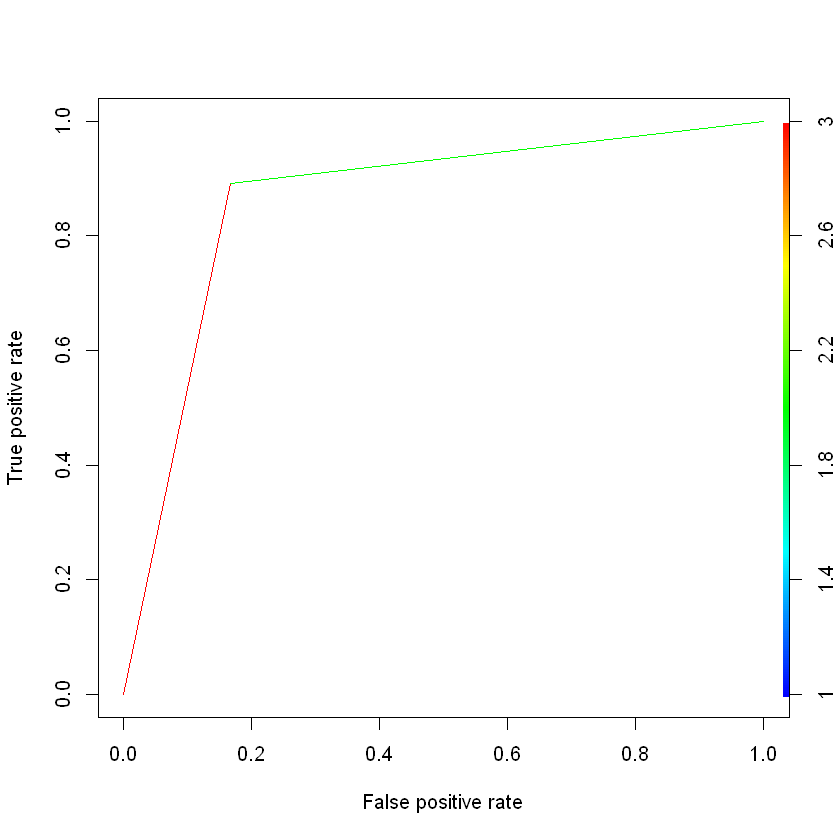

In [61]:
#Precision and Recall
print("precision")
C5_precision_reduced_test <- con_mat1$byClass['Pos Pred Value']
C5_precision_reduced_test
print("recall")
C5_recall_reduced_test <- con_mat1$byClass['Sensitivity']
C5_recall_reduced_test
print("f-score")
C5_Fscore_reduced_test <- (2*C5_precision_reduced_test*C5_recall_reduced_test)/sum(C5_precision_reduced_test,C5_recall_reduced_test)
C5_Fscore_reduced_test 
print("accuracy")
C5_Accuracy_reduced_test <- con_mat1$overall['Accuracy']
C5_Accuracy_reduced_test
C5_predROCR_reduced_test <- prediction(as.numeric(test_predictions1), as.numeric(test1$V15))
C5_perfROCR_reduced_test <- performance(C5_predROCR_reduced_test, "tpr", "fpr")
C5_perfROCR_reduced_test
C5_AUC_reduced_test <- performance(C5_predROCR_reduced_test, "auc")@y.values
C5_AUC_reduced_test
plot(C5_perfROCR_reduced_test, colorize = TRUE)

<b>Using C5.0, we can see that the accuracy, recall, precision on the balanced train dataset are  percents respectively and on the balanced test data are </b>

### Random Forest

<b>Building Random forest on the train dataset of balanced and making prediction on test and train</b>

In [62]:

# Create a Random Forest model with default parameters
RFmodeltrain <- randomForest(V15 ~ ., data = train, importance = TRUE)
RFmodeltrain
RFtrainpredict <- predict(RFmodeltrain,train, type = 'class')
con_mat <- confusionMatrix(as.factor(RFtrainpredict), as.factor(train$V15))
con_mat
RFtestpredict <- predict(RFmodeltrain,test, type = 'class')
con_mat <- confusionMatrix(as.factor(RFtestpredict), as.factor(test$V15))
con_mat



Call:
 randomForest(formula = V15 ~ ., data = train, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 9.07%
Confusion matrix:
    0   1 class.error
0 217  24  0.09958506
1  18 204  0.08108108

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 241   0
         1   0 222
                                     
               Accuracy : 1          
                 95% CI : (0.9921, 1)
    No Information Rate : 0.5205     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5205     
         Detection Rate : 0.5205     
   Detection Prevalence : 0.5205     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 55  1
         1  5 54
                                          
               Accuracy : 0.9478          
                 95% CI : (0.8899, 0.9806)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8958          
                                          
 Mcnemar's Test P-Value : 0.2207          
                                          
            Sensitivity : 0.9167          
            Specificity : 0.9818          
         Pos Pred Value : 0.9821          
         Neg Pred Value : 0.9153          
             Prevalence : 0.5217          
         Detection Rate : 0.4783          
   Detection Prevalence : 0.4870          
      Balanced Accuracy : 0.9492          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
     0.9821429

[1] "recall"


Sensitivity 
  0.9166667

[1] "f-score"


Pos Pred Value 
     0.9482759

[1] "accuracy"


Accuracy 
0.9478261

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.00000000 0.08333333 1.00000000


Slot "y.values":
[[1]]
[1] 0.0000000 0.9818182 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   2   1



[[1]]
[1] 0.9492424

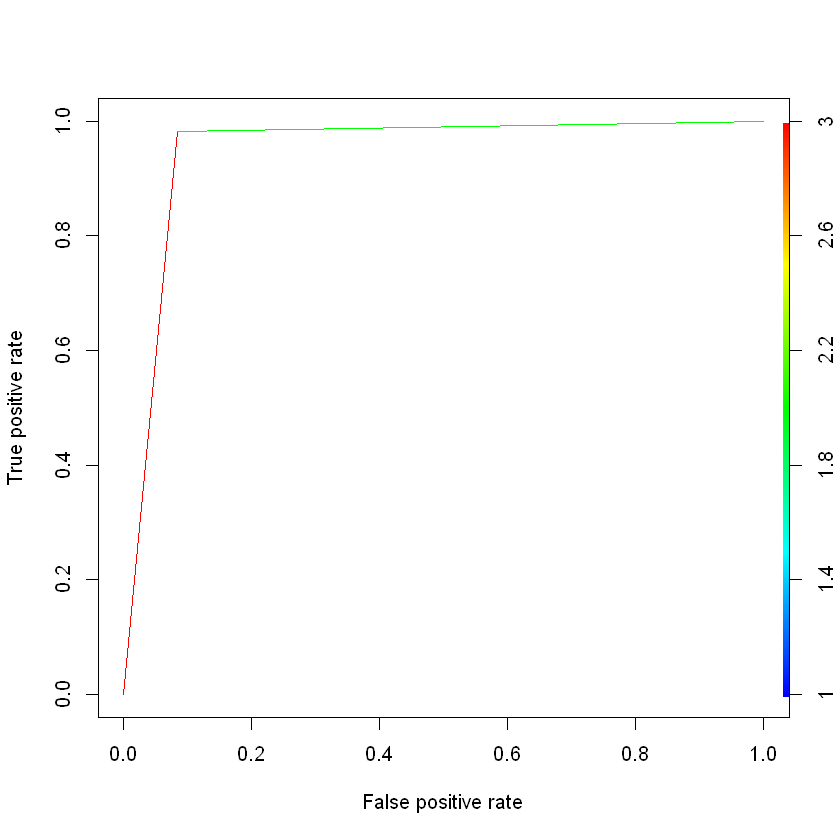

In [63]:
#Precision and Recall
print("precision")
RF_precision_balanced_test <- con_mat$byClass['Pos Pred Value']
RF_precision_balanced_test
print("recall")
RF_recall_balanced_test <- con_mat$byClass['Sensitivity']
RF_recall_balanced_test
print("f-score")
RF_Fscore_balanced_test <- (2*RF_precision_balanced_test*RF_recall_balanced_test)/sum(RF_precision_balanced_test,RF_recall_balanced_test)
RF_Fscore_balanced_test 
print("accuracy")
RF_Accuracy_balanced_test <- con_mat$overall['Accuracy']
RF_Accuracy_balanced_test
RF_predROCR_balanced_test <- prediction(as.numeric(RFtestpredict), as.numeric(test$V15))
RF_perfROCR_balanced_test <- performance(RF_predROCR_balanced_test, "tpr", "fpr")
RF_perfROCR_balanced_test
RF_AUC_balanced_test <- performance(RF_predROCR_balanced_test, "auc")@y.values
RF_AUC_balanced_test
plot(RF_perfROCR_balanced_test, colorize = TRUE)

<b>Using Random Forest, we can see that the accuracy, recall, precision on the balanced train dataset are 100, 100, 100 percents respectively and on the balanced test data are 94.78, 91.67, 98.21</b>

<b>Building Random forest on the train dataset of balanced doing some tuning and making prediction on test and train</b>

In [64]:
# Fine tuning parameters of Random Forest model
print("tuning")
RFmodeltrain01 <- randomForest(V15 ~ ., data = train, ntree = 1000, mtry = 6, importance = TRUE)
RFmodeltrain01
RFtrainpredict01 <- predict(RFmodeltrain01,train, type = 'class')
con_mat <- confusionMatrix(as.factor(RFtrainpredict01), as.factor(train$V15))
con_mat
RFtestpredict01 <- predict(RFmodeltrain01,test, type = 'class')
con_mat <- confusionMatrix(as.factor(RFtestpredict01), as.factor(test$V15))
con_mat

[1] "tuning"



Call:
 randomForest(formula = V15 ~ ., data = train, ntree = 1000, mtry = 6,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 6

        OOB estimate of  error rate: 11.88%
Confusion matrix:
    0   1 class.error
0 209  32   0.1327801
1  23 199   0.1036036

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 241   0
         1   0 222
                                     
               Accuracy : 1          
                 95% CI : (0.9921, 1)
    No Information Rate : 0.5205     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5205     
         Detection Rate : 0.5205     
   Detection Prevalence : 0.5205     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 55  2
         1  5 53
                                          
               Accuracy : 0.9391          
                 95% CI : (0.8786, 0.9752)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8783          
                                          
 Mcnemar's Test P-Value : 0.4497          
                                          
            Sensitivity : 0.9167          
            Specificity : 0.9636          
         Pos Pred Value : 0.9649          
         Neg Pred Value : 0.9138          
             Prevalence : 0.5217          
         Detection Rate : 0.4783          
   Detection Prevalence : 0.4957          
      Balanced Accuracy : 0.9402          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
     0.9649123

[1] "recall"


Sensitivity 
  0.9166667

[1] "f-score"


Pos Pred Value 
     0.9401709

[1] "accuracy"


Accuracy 
0.9391304

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.00000000 0.08333333 1.00000000


Slot "y.values":
[[1]]
[1] 0.0000000 0.9636364 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   2   1



[[1]]
[1] 0.9401515

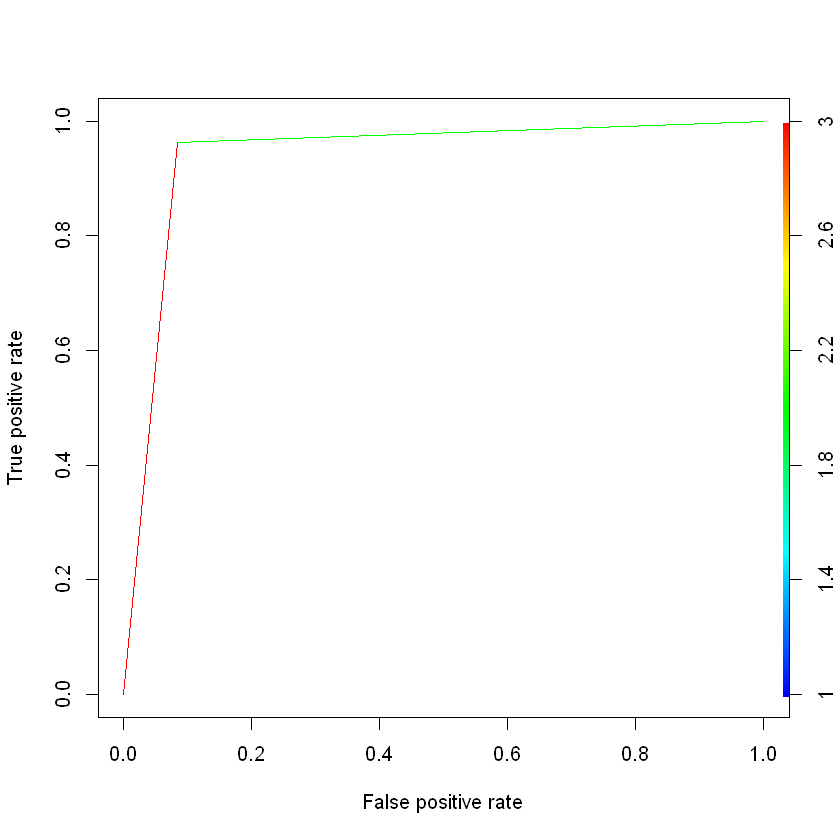

In [65]:
#Precision and Recall
print("precision")
RF_precision_balanced_test_t <- con_mat$byClass['Pos Pred Value']
RF_precision_balanced_test_t
print("recall")
RF_recall_balanced_test_t <- con_mat$byClass['Sensitivity']
RF_recall_balanced_test_t
print("f-score")
RF_Fscore_balanced_test_t <- (2*RF_precision_balanced_test_t*RF_recall_balanced_test_t)/sum(RF_precision_balanced_test_t,RF_recall_balanced_test_t)
RF_Fscore_balanced_test_t 
print("accuracy")
RF_Accuracy_balanced_test_t <- con_mat$overall['Accuracy']
RF_Accuracy_balanced_test_t
RF_predROCR_balanced_test_t <- prediction(as.numeric(RFtestpredict01), as.numeric(test$V15))
RF_perfROCR_balanced_test_t <- performance(RF_predROCR_balanced_test_t, "tpr", "fpr")
RF_perfROCR_balanced_test_t
RF_AUC_balanced_test_t <- performance(RF_predROCR_balanced_test_t, "auc")@y.values
RF_AUC_balanced_test_t
plot(RF_perfROCR_balanced_test_t, colorize = TRUE)

<b>Using Random Forest, we can see that the accuracy, recall, precision on the balanced train dataset after tuning are 100,100,100 percents respectively and on the balanced test data after tuning are 93.91, 91.67, 96.49</b>

<b>Building Randaom forest on the train dataset of reduced making prediction on test and train</b>

In [66]:

# Create a Random Forest model with default parameters
RFmodeltrain1 <- randomForest(V15 ~ ., data = train1, importance = TRUE)
RFmodeltrain1
RFtrainpredict1 <- predict(RFmodeltrain1,train1, type = 'class')
con_mat <- confusionMatrix(as.factor(RFtrainpredict1), as.factor(train1$V15))
con_mat
RFtestpredict1 <- predict(RFmodeltrain1,test1, type = 'class')
con_mat <- confusionMatrix(as.factor(RFtestpredict1), as.factor(test1$V15))
con_mat





Call:
 randomForest(formula = V15 ~ ., data = train1, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 12.31%
Confusion matrix:
    0   1 class.error
0 209  32   0.1327801
1  25 197   0.1126126

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 241   0
         1   0 222
                                     
               Accuracy : 1          
                 95% CI : (0.9921, 1)
    No Information Rate : 0.5205     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5205     
         Detection Rate : 0.5205     
   Detection Prevalence : 0.5205     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 53  1
         1  7 54
                                          
               Accuracy : 0.9304          
                 95% CI : (0.8675, 0.9695)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8612          
                                          
 Mcnemar's Test P-Value : 0.0771          
                                          
            Sensitivity : 0.8833          
            Specificity : 0.9818          
         Pos Pred Value : 0.9815          
         Neg Pred Value : 0.8852          
             Prevalence : 0.5217          
         Detection Rate : 0.4609          
   Detection Prevalence : 0.4696          
      Balanced Accuracy : 0.9326          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
     0.9814815

[1] "recall"


Sensitivity 
  0.8833333

[1] "f-score"


Pos Pred Value 
     0.9298246

[1] "accuracy"


Accuracy 
0.9304348

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0000000 0.1166667 1.0000000


Slot "y.values":
[[1]]
[1] 0.0000000 0.9818182 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   2   1



[[1]]
[1] 0.9325758

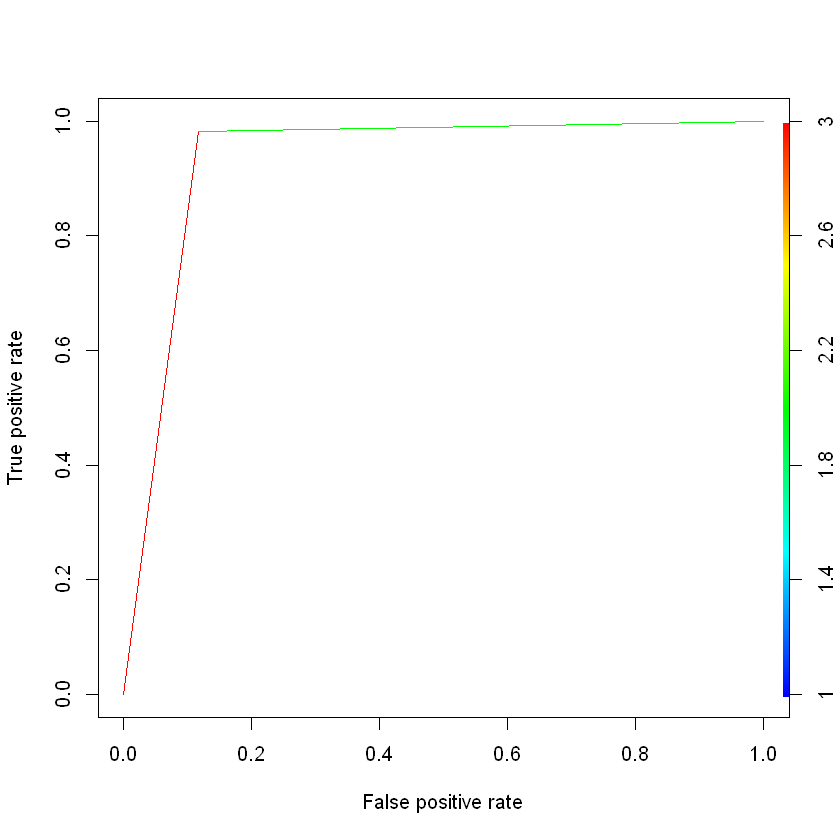

In [67]:
#Precision and Recall
print("precision")
RF_precision_reduced_test <- con_mat$byClass['Pos Pred Value']
RF_precision_reduced_test
print("recall")
RF_recall_reduced_test <- con_mat$byClass['Sensitivity']
RF_recall_reduced_test
print("f-score")
RF_Fscore_reduced_test <- (2*RF_precision_reduced_test*RF_recall_reduced_test)/sum(RF_precision_reduced_test,RF_recall_reduced_test)
RF_Fscore_reduced_test 
print("accuracy")
RF_Accuracy_reduced_test <- con_mat$overall['Accuracy']
RF_Accuracy_reduced_test
RF_predROCR_reduced_test <- prediction(as.numeric(RFtestpredict1), as.numeric(test1$V15))
RF_perfROCR_reduced_test <- performance(RF_predROCR_reduced_test, "tpr", "fpr")
RF_perfROCR_reduced_test
RF_AUC_reduced_test <- performance(RF_predROCR_reduced_test, "auc")@y.values
RF_AUC_reduced_test
plot(RF_perfROCR_reduced_test, colorize = TRUE)

<b>Using Random Forest, we can see that the accuracy, recall, precision on the reduced train dataset are 100, 100, 100 percents respectively and on the balanced test data are 92.17, 86.67, 98.11</b>

<b>Building Random Forest on the train dataset of reducing along with tuning some parameters and making prediction on test and train</b>

In [68]:
# Fine tuning parameters of Random Forest model
print("tuning")
RFmodeltrain11 <- randomForest(V15 ~ ., data = train1, ntree = 1000, mtry = 6, importance = TRUE)
RFmodeltrain11
RFtrainpredict11 <- predict(RFmodeltrain11,train1, type = 'class')
con_mat <- confusionMatrix(as.factor(RFtrainpredict11), as.factor(train1$V15))
con_mat
RFtestpredict11 <- predict(RFmodeltrain11,test1, type = 'class')
con_mat <- confusionMatrix(as.factor(RFtestpredict11), as.factor(test1$V15))
con_mat

[1] "tuning"



Call:
 randomForest(formula = V15 ~ ., data = train1, ntree = 1000,      mtry = 6, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 6

        OOB estimate of  error rate: 13.17%
Confusion matrix:
    0   1 class.error
0 205  36   0.1493776
1  25 197   0.1126126

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 241   0
         1   0 222
                                     
               Accuracy : 1          
                 95% CI : (0.9921, 1)
    No Information Rate : 0.5205     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5205     
         Detection Rate : 0.5205     
   Detection Prevalence : 0.5205     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 53  1
         1  7 54
                                          
               Accuracy : 0.9304          
                 95% CI : (0.8675, 0.9695)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8612          
                                          
 Mcnemar's Test P-Value : 0.0771          
                                          
            Sensitivity : 0.8833          
            Specificity : 0.9818          
         Pos Pred Value : 0.9815          
         Neg Pred Value : 0.8852          
             Prevalence : 0.5217          
         Detection Rate : 0.4609          
   Detection Prevalence : 0.4696          
      Balanced Accuracy : 0.9326          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
     0.9814815

[1] "recall"


Sensitivity 
  0.8833333

[1] "f-score"


Pos Pred Value 
     0.9298246

[1] "accuracy"


Accuracy 
0.9304348

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0000000 0.1166667 1.0000000


Slot "y.values":
[[1]]
[1] 0.0000000 0.9818182 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   2   1



[[1]]
[1] 0.9325758

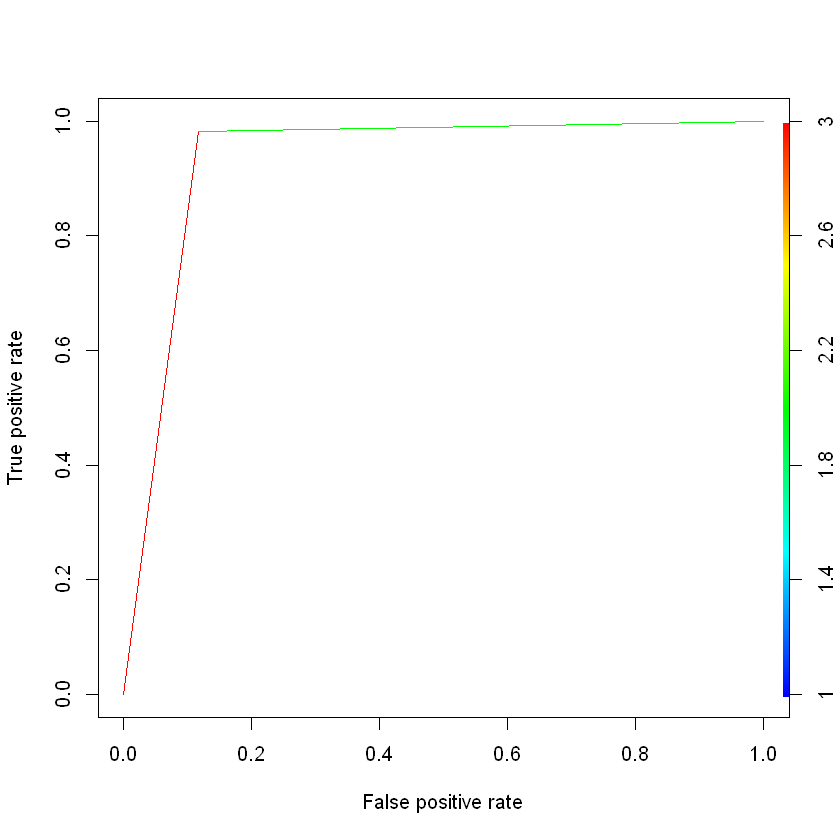

In [69]:
#Precision and Recall
print("precision")
RF_precision_reduced_test_t <- con_mat$byClass['Pos Pred Value']
RF_precision_reduced_test_t
print("recall")
RF_recall_reduced_test_t <- con_mat$byClass['Sensitivity']
RF_recall_reduced_test_t
print("f-score")
RF_Fscore_reduced_test_t <- (2*RF_precision_reduced_test_t*RF_recall_reduced_test_t)/sum(RF_precision_reduced_test_t,RF_recall_reduced_test_t)
RF_Fscore_reduced_test_t
print("accuracy")
RF_Accuracy_reduced_test_t <- con_mat$overall['Accuracy']
RF_Accuracy_reduced_test_t
RF_predROCR_reduced_test_t <- prediction(as.numeric(RFtestpredict11), as.numeric(test1$V15))
RF_perfROCR_reduced_test_t <- performance(RF_predROCR_reduced_test_t, "tpr", "fpr")
RF_perfROCR_reduced_test_t
RF_AUC_reduced_test_t <- performance(RF_predROCR_reduced_test_t, "auc")@y.values
RF_AUC_reduced_test_t
plot(RF_perfROCR_reduced_test_t, colorize = TRUE)

<b>Using Random Forest, we can see that the accuracy, recall, precision on the reduced train dataset with tuning are 100, 100, 100 percents respectively and on the balanced test data are 93.04, 88.33, 98.15</b>

<b>Feature selection using VARIABLE IMPORTANCE </b>

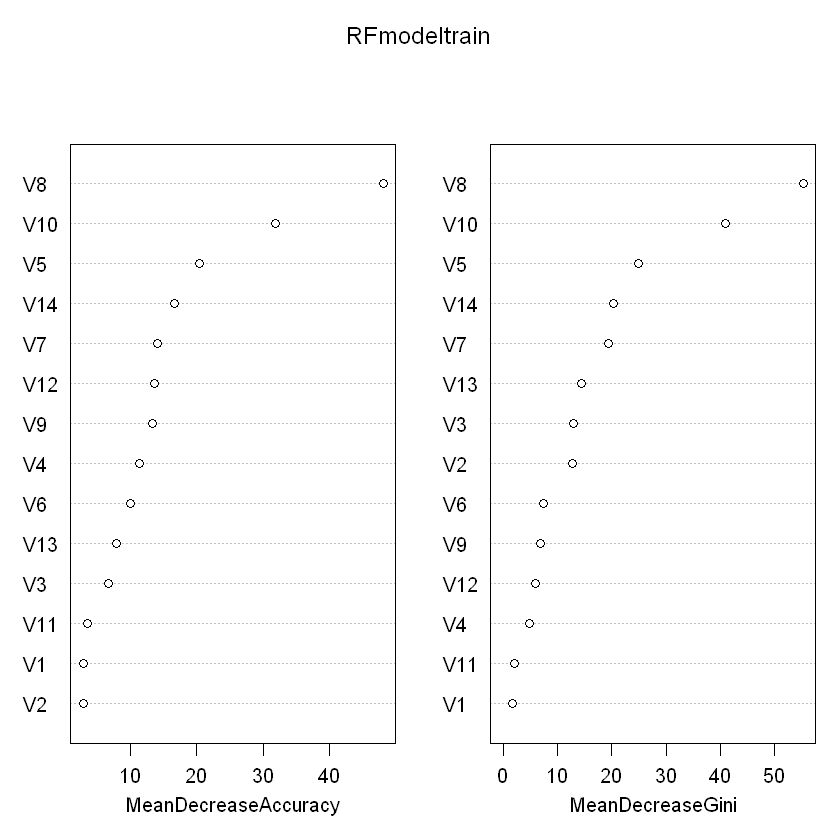

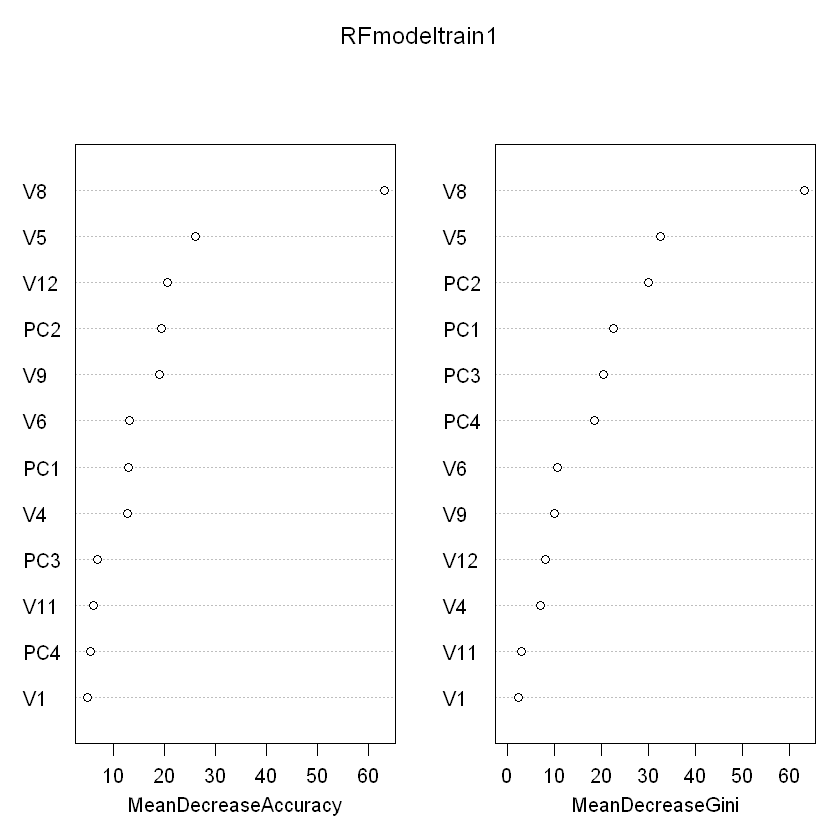

In [70]:
#importance(RFmodeltrain) 
varImpPlot(RFmodeltrain) 
#importance(RFmodeltrain1) 
varImpPlot(RFmodeltrain1) 


<b>Building Random forest on the train dataset of balanced considering important features and making prediction on test and train</b>

In [71]:
#Feature selection V5,V8,V10,V14,V7
RFmodeltrain <- randomForest(V15 ~ ., data = train[,-c(1,2,3,4,6,9,11,12,13)], importance = TRUE)
RFmodeltrain
RFtrainpredict <- predict(RFmodeltrain,train, type = 'class')
con_mat <- confusionMatrix(as.factor(RFtrainpredict), as.factor(train$V15))
con_mat
RFtestpredict <- predict(RFmodeltrain,test, type = 'class')
con_mat <- confusionMatrix(as.factor(RFtestpredict), as.factor(test$V15))
con_mat



Call:
 randomForest(formula = V15 ~ ., data = train[, -c(1, 2, 3, 4,      6, 9, 11, 12, 13)], importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 14.9%
Confusion matrix:
    0   1 class.error
0 208  33   0.1369295
1  36 186   0.1621622

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 241   0
         1   0 222
                                     
               Accuracy : 1          
                 95% CI : (0.9921, 1)
    No Information Rate : 0.5205     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5205     
         Detection Rate : 0.5205     
   Detection Prevalence : 0.5205     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 54  3
         1  6 52
                                          
               Accuracy : 0.9217          
                 95% CI : (0.8566, 0.9636)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8435          
                                          
 Mcnemar's Test P-Value : 0.505           
                                          
            Sensitivity : 0.9000          
            Specificity : 0.9455          
         Pos Pred Value : 0.9474          
         Neg Pred Value : 0.8966          
             Prevalence : 0.5217          
         Detection Rate : 0.4696          
   Detection Prevalence : 0.4957          
      Balanced Accuracy : 0.9227          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
     0.9473684

[1] "recall"


Sensitivity 
        0.9

[1] "f-score"


Pos Pred Value 
     0.9230769

[1] "accuracy"


Accuracy 
0.9217391

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0 0.1 1.0


Slot "y.values":
[[1]]
[1] 0.0000000 0.9454545 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   2   1



[[1]]
[1] 0.9227273

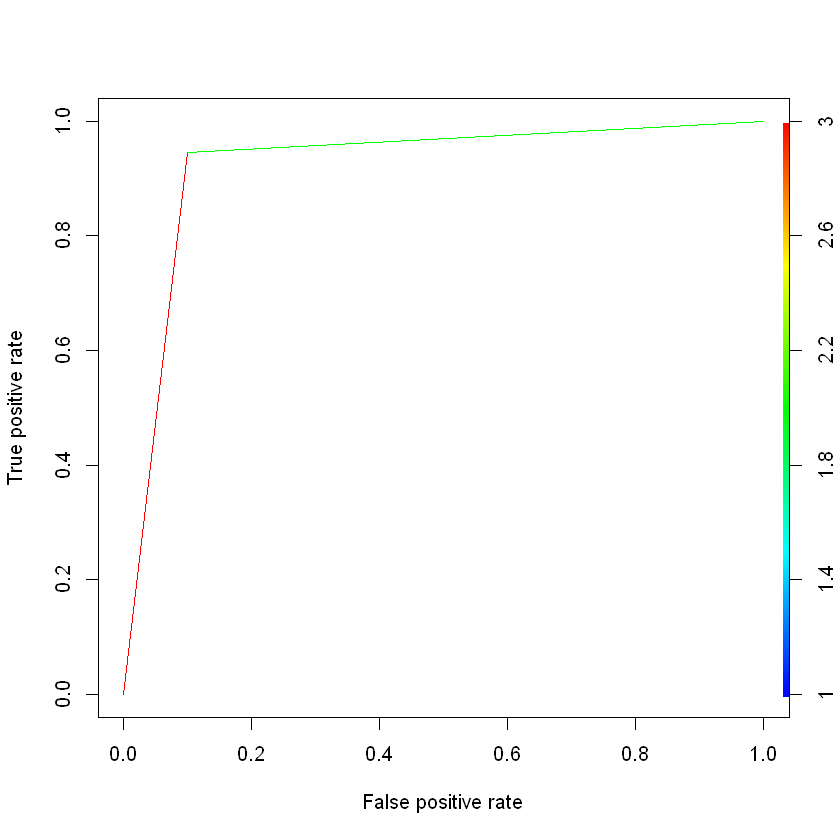

In [72]:
print("precision")
RF_precision_balanced_test_fr <- con_mat$byClass['Pos Pred Value']
RF_precision_balanced_test_fr
print("recall")
RF_recall_balanced_test_fr <- con_mat$byClass['Sensitivity']
RF_recall_balanced_test_fr
print("f-score")
RF_Fscore_balanced_test_fr <- (2*RF_precision_balanced_test_fr*RF_recall_balanced_test_fr)/sum(RF_precision_balanced_test_fr,RF_recall_balanced_test_fr)
RF_Fscore_balanced_test_fr 
print("accuracy")
RF_Accuracy_balanced_test_fr <- con_mat$overall['Accuracy']
RF_Accuracy_balanced_test_fr
library(ROCR)
RF_predROCR_balanced_test_fr <- prediction(as.numeric(RFtestpredict), as.numeric(test$V15))
RF_perfROCR_balanced_test_fr <- performance(RF_predROCR_balanced_test_fr, "tpr", "fpr")
RF_perfROCR_balanced_test_fr
RF_AUC_balanced_test_fr <- performance(RF_predROCR_balanced_test_fr, "auc")@y.values
RF_AUC_balanced_test_fr
plot(RF_perfROCR_balanced_test_fr, colorize = TRUE)

<b>Using Random Forest, we can see that the accuracy, recall, precision on the balanced train dataset with feature selection are 100, 100, 100 percents respectively and on the balanced test data are 92.17, 90, 94.74</b>

<b>Building random forest on the train dataset of reduced considering important features and making prediction on test and train</b>

In [73]:
# Create a Random Forest model with default parameters
#feature selection V5,V8,PC2,PC1
RFmodeltrain1 <- randomForest(V15 ~ ., data = train1[,-c(1,2,4,6,7,8,12,13)], importance = TRUE)
RFmodeltrain1
RFtrainpredict1 <- predict(RFmodeltrain1,train1, type = 'class')
con_mat <- confusionMatrix(as.factor(RFtrainpredict1), as.factor(train1$V15))
con_mat
RFtestpredict1 <- predict(RFmodeltrain1,test1, type = 'class')
con_mat <- confusionMatrix(as.factor(RFtestpredict1), as.factor(test1$V15))
con_mat


Call:
 randomForest(formula = V15 ~ ., data = train1[, -c(1, 2, 4, 6,      7, 8, 12, 13)], importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 17.93%
Confusion matrix:
    0   1 class.error
0 196  45   0.1867220
1  38 184   0.1711712

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 241   0
         1   0 222
                                     
               Accuracy : 1          
                 95% CI : (0.9921, 1)
    No Information Rate : 0.5205     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5205     
         Detection Rate : 0.5205     
   Detection Prevalence : 0.5205     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 49  3
         1 11 52
                                          
               Accuracy : 0.8783          
                 95% CI : (0.8042, 0.9318)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : 3.971e-16       
                                          
                  Kappa : 0.7575          
                                          
 Mcnemar's Test P-Value : 0.06137         
                                          
            Sensitivity : 0.8167          
            Specificity : 0.9455          
         Pos Pred Value : 0.9423          
         Neg Pred Value : 0.8254          
             Prevalence : 0.5217          
         Detection Rate : 0.4261          
   Detection Prevalence : 0.4522          
      Balanced Accuracy : 0.8811          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
     0.9423077

[1] "recall"


Sensitivity 
  0.8166667

[1] "f-score"


Pos Pred Value 
         0.875

[1] "accuracy"


Accuracy 
0.8782609

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0000000 0.1833333 1.0000000


Slot "y.values":
[[1]]
[1] 0.0000000 0.9454545 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   2   1



[[1]]
[1] 0.8810606

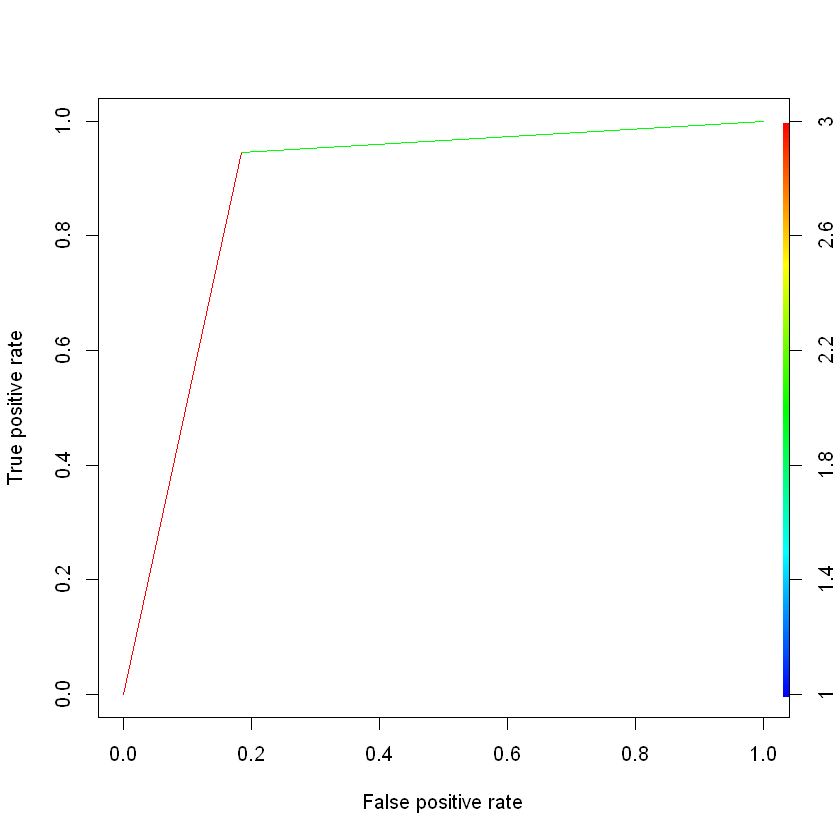

In [74]:
print("precision")
RF_precision_reduced_test_fr <- con_mat$byClass['Pos Pred Value']
RF_precision_reduced_test_fr
print("recall")
RF_recall_reduced_test_fr <- con_mat$byClass['Sensitivity']
RF_recall_reduced_test_fr
print("f-score")
RF_Fscore_reduced_test_fr <- (2*RF_precision_reduced_test_fr*RF_recall_reduced_test_fr)/sum(RF_precision_reduced_test_fr,RF_recall_reduced_test_fr)
RF_Fscore_reduced_test_fr 
print("accuracy")
RF_Accuracy_reduced_test_fr <- con_mat$overall['Accuracy']
RF_Accuracy_reduced_test_fr
library(ROCR)
RF_predROCR_reduced_test_fr <- prediction(as.numeric(RFtestpredict1), as.numeric(test1$V15))
RF_perfROCR_reduced_test_fr <- performance(RF_predROCR_reduced_test_fr, "tpr", "fpr")
RF_perfROCR_reduced_test_fr
RF_AUC_reduced_test_fr <- performance(RF_predROCR_reduced_test_fr, "auc")@y.values
RF_AUC_reduced_test_fr
plot(RF_perfROCR_reduced_test_fr, colorize = TRUE)

<b>Using Random Forest, we can see that the accuracy, recall, precision on the reduced train dataset with feature selection are 100, 100, 100 percents respectively and on the reduced test data are 88.7, 83.33, 94.34</b>

<b>finding the best model with different Mtry value and ntree value of 500 on balanced test</b>

[1] 0.8956522 0.8956522 0.8956522 0.8956522 0.8956522 0.8956522

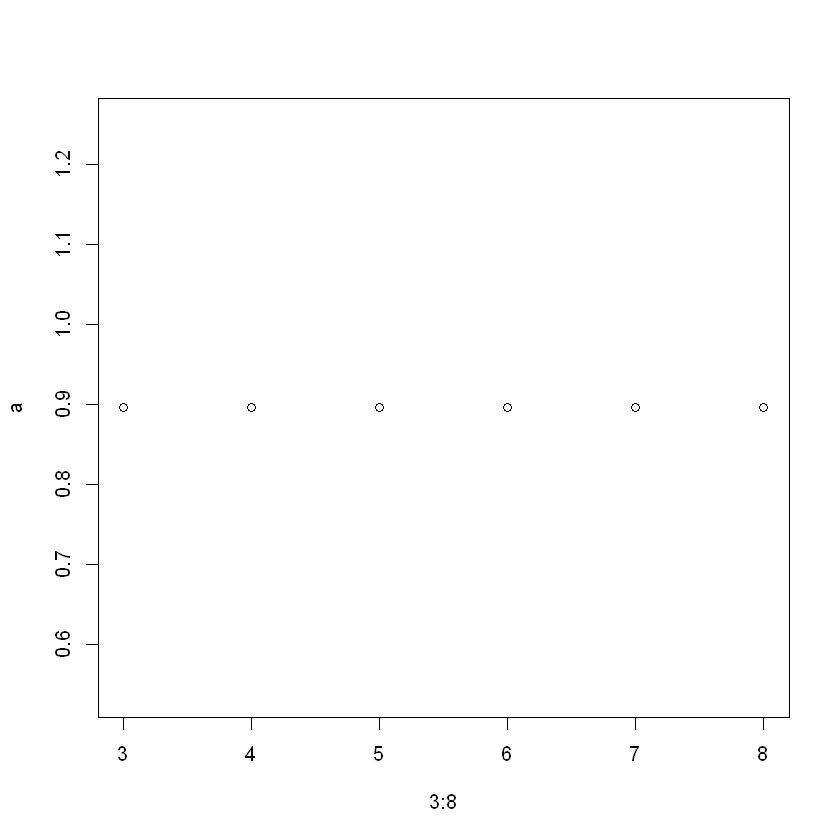

In [75]:
a=c()
for (i in 3:8) {
  model3 <- randomForest(V15 ~ ., data = train[,-c(1,2,3,4,6,7,9,11,12,13)], ntree = 500, mtry = i, importance = TRUE)
  predValid <- predict(model3, test, type = "class")
  a[i-2] = mean(predValid == test$V15)
}

a

plot(3:8,a)

<b>Finding the best model with different Mtry value and ntree value of 500 on reduced test</b>

[1] 0.8782609 0.8608696 0.8695652 0.8782609 0.8695652 0.8782609

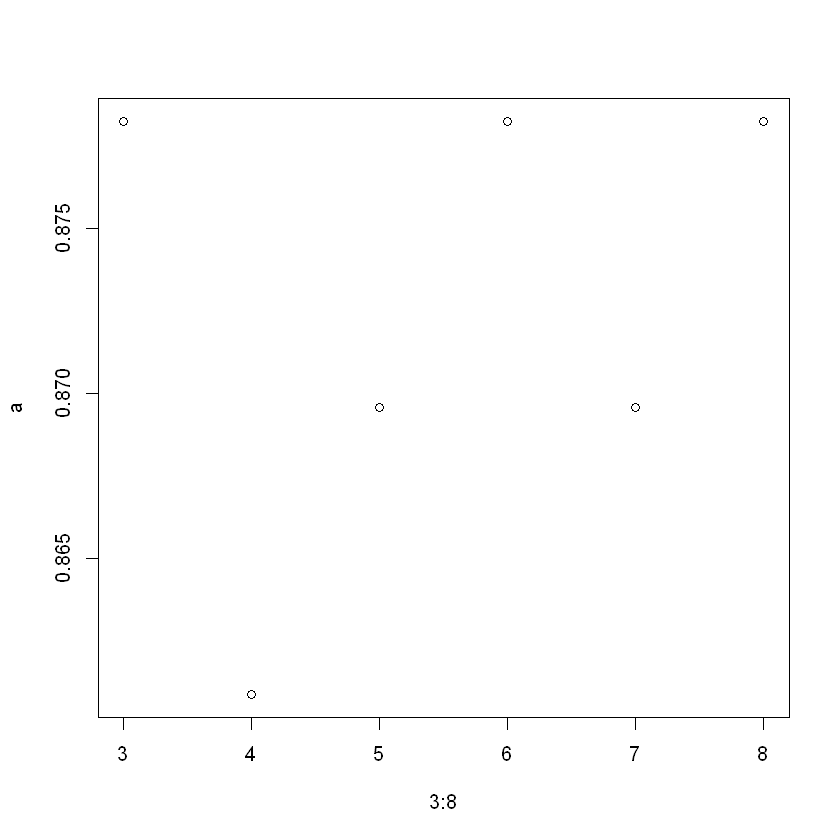

In [76]:
a=c()
for (i in 3:8) {
  model3 <- randomForest(V15 ~ ., data = train1[,-c(1,2,4,6,7,10,12,13)], ntree = 500, mtry = i, importance = TRUE)
  predValid <- predict(model3, test1, type = "class")
  a[i-2] = mean(predValid == test1$V15)
}

a

plot(3:8,a)

<b>Cross fold</b>

In [77]:
data_ctrl <- trainControl(method = "cv", number = 10)
LRcv<- train(V15 ~.,  
                     data =Australia2.balanced,                        
                     trControl = data_ctrl,              # folds
                     method = "rf",                      # specifying regression model
                     )  
   #create model
   # fit <- train(trainData[, -classIndex], trainData[, classIndex], method = "nb",trControl=train_control)
summary(LRcv)
LRcv
LRcv<- train(V15 ~.,  
             data =Australia.reduced,                        
             trControl = data_ctrl,              # folds
             method = "rf",                      # specifying regression model
             family=binomial())  
summary(LRcv)
LRcv

                Length Class      Mode     
call               4   -none-     call     
type               1   -none-     character
predicted        578   factor     numeric  
err.rate        1500   -none-     numeric  
confusion          6   -none-     numeric  
votes           1156   matrix     numeric  
oob.times        578   -none-     numeric  
classes            2   -none-     character
importance        34   -none-     numeric  
importanceSD       0   -none-     NULL     
localImportance    0   -none-     NULL     
proximity          0   -none-     NULL     
ntree              1   -none-     numeric  
mtry               1   -none-     numeric  
forest            14   -none-     list     
y                578   factor     numeric  
test               0   -none-     NULL     
inbag              0   -none-     NULL     
xNames            34   -none-     character
problemType        1   -none-     character
tuneValue          1   data.frame list     
obsLevels          2   -none-   

Random Forest 

578 samples
 14 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 520, 520, 520, 520, 520, 520, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8874773  0.7738077
  18    0.9047489  0.8093393
  34    0.9064731  0.8127665

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 34.

                Length Class      Mode     
call               5   -none-     call     
type               1   -none-     character
predicted        578   factor     numeric  
err.rate        1500   -none-     numeric  
confusion          6   -none-     numeric  
votes           1156   matrix     numeric  
oob.times        578   -none-     numeric  
classes            2   -none-     character
importance        32   -none-     numeric  
importanceSD       0   -none-     NULL     
localImportance    0   -none-     NULL     
proximity          0   -none-     NULL     
ntree              1   -none-     numeric  
mtry               1   -none-     numeric  
forest            14   -none-     list     
y                578   factor     numeric  
test               0   -none-     NULL     
inbag              0   -none-     NULL     
xNames            32   -none-     character
problemType        1   -none-     character
tuneValue          1   data.frame list     
obsLevels          2   -none-   

Random Forest 

578 samples
 12 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 521, 520, 520, 519, 521, 521, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8600593  0.7193367
  17    0.8704636  0.7410375
  32    0.8669266  0.7338572

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 17.

<b>Neural Network</b>

<b>Building Neural network (nnet) on the train dataset of balanced and making prediction on test and train</b>

# weights:  361
initial  value 413.090516 
iter  10 value 151.594046
iter  20 value 82.898959
iter  30 value 58.544661
iter  40 value 47.826869
iter  50 value 38.698176
iter  60 value 34.836621
iter  70 value 32.495315
iter  80 value 31.220678
iter  90 value 30.478557
iter 100 value 30.184793
iter 110 value 29.896429
iter 120 value 29.637182
iter 130 value 29.447096
iter 140 value 29.202450
iter 150 value 29.068955
iter 160 value 28.977933
iter 170 value 28.923633
iter 180 value 28.892339
iter 190 value 28.877792
iter 200 value 28.868860
iter 210 value 28.863790
iter 220 value 28.858533
iter 230 value 28.852987
iter 240 value 28.807064
iter 250 value 28.695212
iter 260 value 28.483293
iter 270 value 28.327608
iter 280 value 28.275885
iter 290 value 28.241530
iter 300 value 28.203554
iter 310 value 28.131984
iter 320 value 28.056300
iter 330 value 28.022749
iter 340 value 28.011339
iter 350 value 28.004864
iter 360 value 28.002111
iter 370 value 28.000624
iter 380 value 28.000090
iter 3

[1] 0.9956803

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 240   1
         1   1 221
                                          
               Accuracy : 0.9957          
                 95% CI : (0.9845, 0.9995)
    No Information Rate : 0.5205          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9913          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9959          
            Specificity : 0.9955          
         Pos Pred Value : 0.9959          
         Neg Pred Value : 0.9955          
             Prevalence : 0.5205          
         Detection Rate : 0.5184          
   Detection Prevalence : 0.5205          
      Balanced Accuracy : 0.9957          
                                          
       'Positive' Class : 0               
                              

[1] 0.9304348

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 54  2
         1  6 53
                                          
               Accuracy : 0.9304          
                 95% CI : (0.8675, 0.9695)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.861           
                                          
 Mcnemar's Test P-Value : 0.2888          
                                          
            Sensitivity : 0.9000          
            Specificity : 0.9636          
         Pos Pred Value : 0.9643          
         Neg Pred Value : 0.8983          
             Prevalence : 0.5217          
         Detection Rate : 0.4696          
   Detection Prevalence : 0.4870          
      Balanced Accuracy : 0.9318          
                                          
       'Positive' Class : 0               
                                    

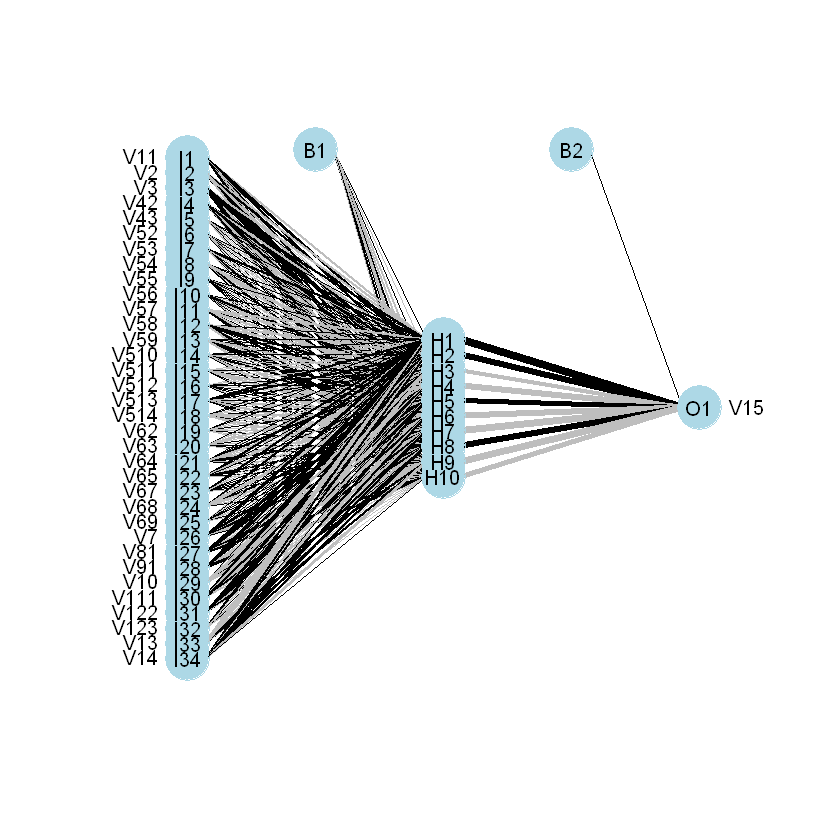

In [78]:

nnet_model <- nnet(V15 ~ ., data = train,  size =10, maxit = 10000, decay = 0.01)
plotnet(nnet_model)
nnet_train_predictions <- predict(nnet_model, train,
                                type = "class")
(n_train_accuracy <- mean(nnet_train_predictions ==train$V15))
con_mat <- confusionMatrix(as.factor(nnet_train_predictions), as.factor(train$V15))
con_mat
nnet_test_predictions <- predict(nnet_model, test,
                                type = "class")
(n_test_accuracy <- mean(nnet_test_predictions ==test$V15))

con_mat <- confusionMatrix(as.factor(nnet_test_predictions), as.factor(test$V15))
con_mat

[1] "precision"


Pos Pred Value 
     0.9642857

[1] "recall"


Sensitivity 
        0.9

[1] "f-score"


Pos Pred Value 
     0.9310345

[1] "accuracy"


Accuracy 
0.9304348

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0 0.1 1.0


Slot "y.values":
[[1]]
[1] 0.0000000 0.9636364 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   1   0



[[1]]
[1] 0.9318182

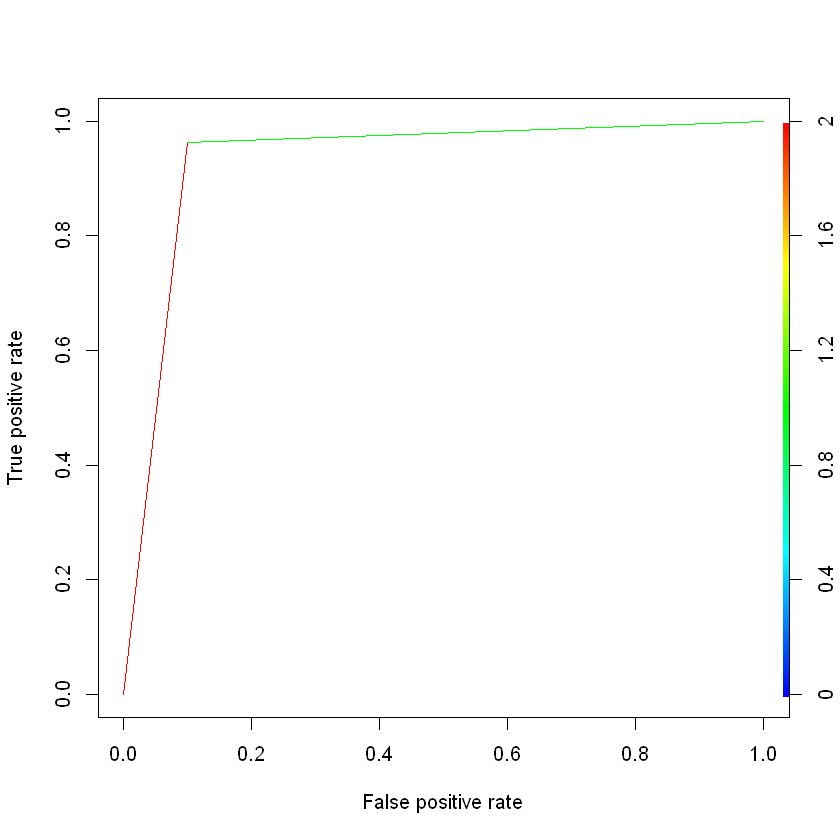

In [79]:
#Precision and Recall
print("precision")
NNET_precision_balanced_test <- con_mat$byClass['Pos Pred Value']
NNET_precision_balanced_test
print("recall")
NNET_recall_balanced_test <- con_mat$byClass['Sensitivity']
NNET_recall_balanced_test
print("f-score")
NNET_Fscore_balanced_test <- (2*NNET_precision_balanced_test*NNET_recall_balanced_test)/sum(NNET_precision_balanced_test,NNET_recall_balanced_test)
NNET_Fscore_balanced_test 
print("accuracy")
NNET_Accuracy_balanced_test <- con_mat$overall['Accuracy']
NNET_Accuracy_balanced_test
NNET_predROCR_balanced_test <- prediction(as.numeric(nnet_test_predictions), as.numeric(test$V15))
NNET_peNNETROCR_balanced_test <- performance(NNET_predROCR_balanced_test, "tpr", "fpr")
NNET_peNNETROCR_balanced_test
NNET_AUC_balanced_test <- performance(NNET_predROCR_balanced_test, "auc")@y.values
NNET_AUC_balanced_test
plot(NNET_peNNETROCR_balanced_test, colorize = TRUE)

<b>Using nnet, we can see that the accuracy, recall, precision on the balanced train dataset are 99.78,100,99.59  percents respectively and on the balanced test data are 93.04, 90.00, 96.43 </b>

<b>Building Neural network (nnet) on the train dataset of balanced with feature selection and making prediction on test and train</b>

# weights:  181
initial  value 463.032453 
iter  10 value 185.200834
iter  20 value 171.564154
iter  30 value 162.494582
iter  40 value 153.274907
iter  50 value 151.041935
iter  60 value 149.030268
iter  70 value 147.477013
iter  80 value 145.761319
iter  90 value 144.412447
iter 100 value 142.435604
iter 110 value 140.782408
iter 120 value 139.911508
iter 130 value 138.676358
iter 140 value 137.056871
iter 150 value 136.215924
iter 160 value 135.408209
iter 170 value 134.849271
iter 180 value 134.062582
iter 190 value 133.589197
iter 200 value 133.263207
iter 210 value 133.151913
iter 220 value 133.070106
iter 230 value 132.982285
iter 240 value 132.833949
iter 250 value 132.763709
iter 260 value 132.718261
iter 270 value 132.685469
iter 280 value 132.668692
iter 290 value 132.657077
iter 300 value 132.649629
iter 310 value 132.644577
iter 320 value 132.639536
iter 330 value 132.634984
iter 340 value 132.632535
iter 350 value 132.630576
iter 360 value 132.628380
iter 370 value 132.62

[1] 0.9114471

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 226  26
         1  15 196
                                          
               Accuracy : 0.9114          
                 95% CI : (0.8818, 0.9357)
    No Information Rate : 0.5205          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8222          
                                          
 Mcnemar's Test P-Value : 0.1183          
                                          
            Sensitivity : 0.9378          
            Specificity : 0.8829          
         Pos Pred Value : 0.8968          
         Neg Pred Value : 0.9289          
             Prevalence : 0.5205          
         Detection Rate : 0.4881          
   Detection Prevalence : 0.5443          
      Balanced Accuracy : 0.9103          
                                          
       'Positive' Class : 0               
                              

[1] 0.8956522

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 56  8
         1  4 47
                                          
               Accuracy : 0.8957          
                 95% CI : (0.8248, 0.9449)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7903          
                                          
 Mcnemar's Test P-Value : 0.3865          
                                          
            Sensitivity : 0.9333          
            Specificity : 0.8545          
         Pos Pred Value : 0.8750          
         Neg Pred Value : 0.9216          
             Prevalence : 0.5217          
         Detection Rate : 0.4870          
   Detection Prevalence : 0.5565          
      Balanced Accuracy : 0.8939          
                                          
       'Positive' Class : 0               
                                    

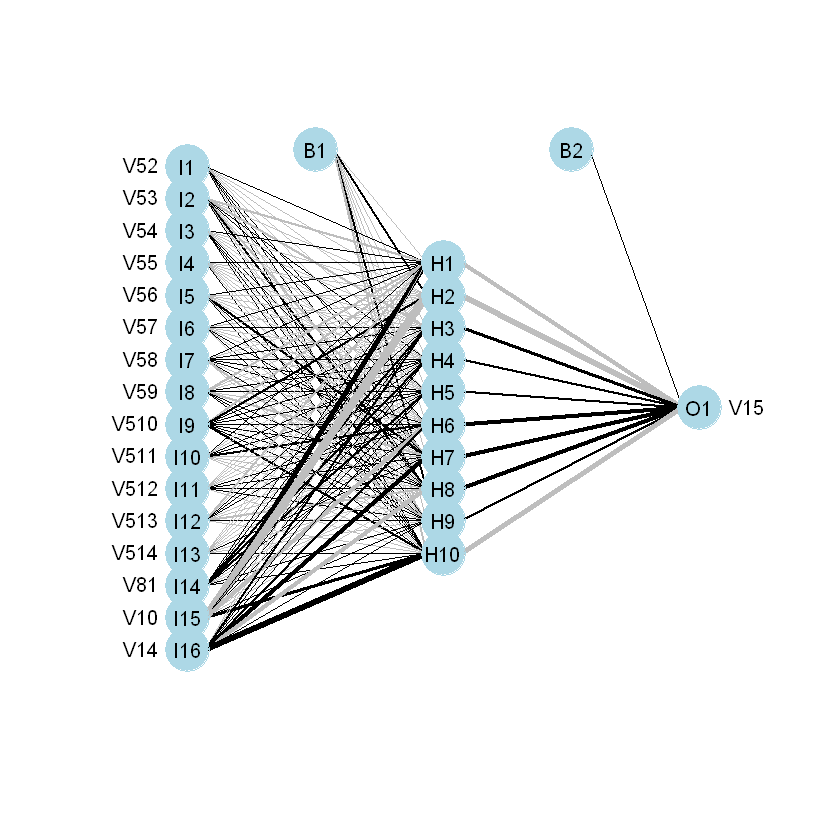

In [80]:

nnet_model <- nnet(V15 ~ ., data = train[,-c(1,2,3,4,6,7,9,11,12,13)],  size =10, maxit = 10000, decay = 0.01)
plotnet(nnet_model)
nnet_train_predictions <- predict(nnet_model, train,
                                type = "class")
(n_train_accuracy <- mean(nnet_train_predictions ==train$V15))
con_mat <- confusionMatrix(as.factor(nnet_train_predictions), as.factor(train$V15))
con_mat
nnet_test_predictions <- predict(nnet_model, test,
                                type = "class")
(n_test_accuracy <- mean(nnet_test_predictions ==test$V15))

con_mat <- confusionMatrix(as.factor(nnet_test_predictions), as.factor(test$V15))
con_mat

[1] "precision"


Pos Pred Value 
         0.875

[1] "recall"


Sensitivity 
  0.9333333

[1] "f-score"


Pos Pred Value 
     0.9032258

[1] "accuracy"


Accuracy 
0.8956522

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.00000000 0.06666667 1.00000000


Slot "y.values":
[[1]]
[1] 0.0000000 0.8545455 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   1   0



[[1]]
[1] 0.8939394

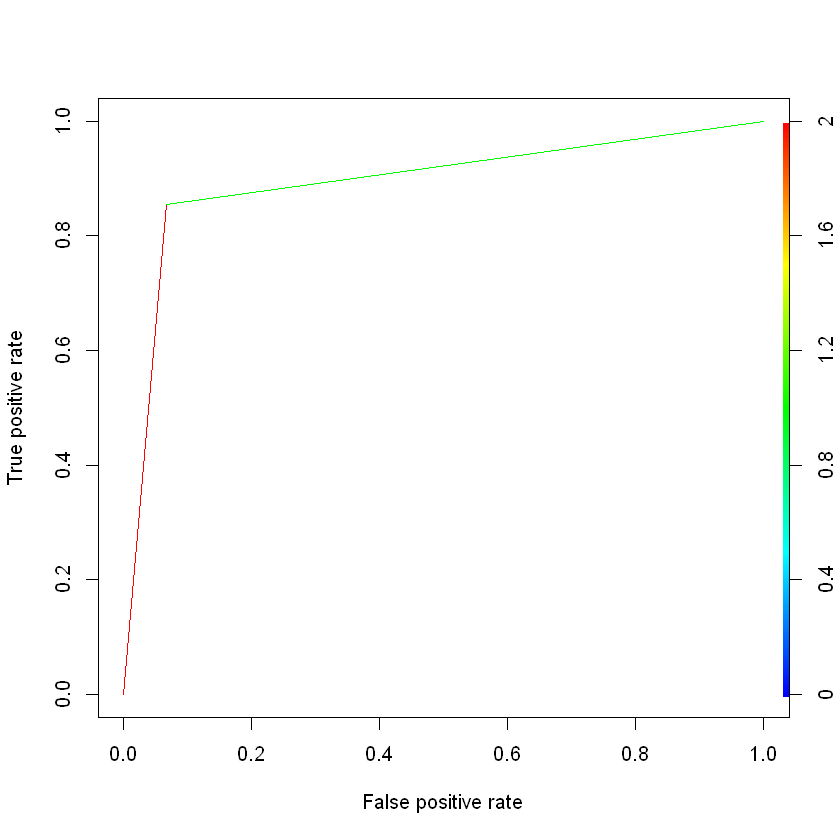

In [81]:
#Precision and Recall
print("precision")
NNET_precision_balanced_test_fr <- con_mat$byClass['Pos Pred Value']
NNET_precision_balanced_test_fr
print("recall")
NNET_recall_balanced_test_fr <- con_mat$byClass['Sensitivity']
NNET_recall_balanced_test_fr
print("f-score")
NNET_Fscore_balanced_test_fr <- (2*NNET_precision_balanced_test_fr*NNET_recall_balanced_test_fr)/sum(NNET_precision_balanced_test_fr,NNET_recall_balanced_test_fr)
NNET_Fscore_balanced_test_fr 
print("accuracy")
NNET_Accuracy_balanced_test_fr <- con_mat$overall['Accuracy']
NNET_Accuracy_balanced_test_fr
NNET_predROCR_balanced_test_fr <- prediction(as.numeric(nnet_test_predictions), as.numeric(test$V15))
NNET_peNNETROCR_balanced_test_fr <- performance(NNET_predROCR_balanced_test_fr, "tpr", "fpr")
NNET_peNNETROCR_balanced_test_fr
NNET_AUC_balanced_test_fr <- performance(NNET_predROCR_balanced_test_fr, "auc")@y.values
NNET_AUC_balanced_test_fr
plot(NNET_peNNETROCR_balanced_test_fr, colorize = TRUE)

<b>Using Neural network, we can see that the accuracy, recall, precision on the balanced train dataset with feature selection are 90.06, 92.95, 88.54 percents respectively and on the balanced test data are 88.69, 94.19 , 87.64 </b>

<b>Building Neural network (nnet) on the train dataset of reduced and making prediction on test and train</b>

# weights:  341
initial  value 322.840782 
iter  10 value 161.512280
iter  20 value 86.960490
iter  30 value 59.506287
iter  40 value 45.419352
iter  50 value 39.563918
iter  60 value 37.100675
iter  70 value 35.648867
iter  80 value 34.315084
iter  90 value 32.589226
iter 100 value 31.619761
iter 110 value 30.919360
iter 120 value 30.584489
iter 130 value 30.344690
iter 140 value 29.983411
iter 150 value 29.774773
iter 160 value 29.637331
iter 170 value 29.577421
iter 180 value 29.532831
iter 190 value 29.488209
iter 200 value 29.447577
iter 210 value 29.317889
iter 220 value 29.077148
iter 230 value 28.882750
iter 240 value 28.763346
iter 250 value 28.681700
iter 260 value 28.592757
iter 270 value 28.519058
iter 280 value 28.473493
iter 290 value 28.402536
iter 300 value 28.290546
iter 310 value 28.161377
iter 320 value 28.097893
iter 330 value 27.991020
iter 340 value 27.904704
iter 350 value 27.863960
iter 360 value 27.848863
iter 370 value 27.838712
iter 380 value 27.828888
iter 3

[1] 0.9956803

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 240   1
         1   1 221
                                          
               Accuracy : 0.9957          
                 95% CI : (0.9845, 0.9995)
    No Information Rate : 0.5205          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9913          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9959          
            Specificity : 0.9955          
         Pos Pred Value : 0.9959          
         Neg Pred Value : 0.9955          
             Prevalence : 0.5205          
         Detection Rate : 0.5184          
   Detection Prevalence : 0.5205          
      Balanced Accuracy : 0.9957          
                                          
       'Positive' Class : 0               
                              

[1] 0.9043478

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 52  3
         1  8 52
                                          
               Accuracy : 0.9043          
                 95% CI : (0.8353, 0.9513)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8091          
                                          
 Mcnemar's Test P-Value : 0.2278          
                                          
            Sensitivity : 0.8667          
            Specificity : 0.9455          
         Pos Pred Value : 0.9455          
         Neg Pred Value : 0.8667          
             Prevalence : 0.5217          
         Detection Rate : 0.4522          
   Detection Prevalence : 0.4783          
      Balanced Accuracy : 0.9061          
                                          
       'Positive' Class : 0               
                                    

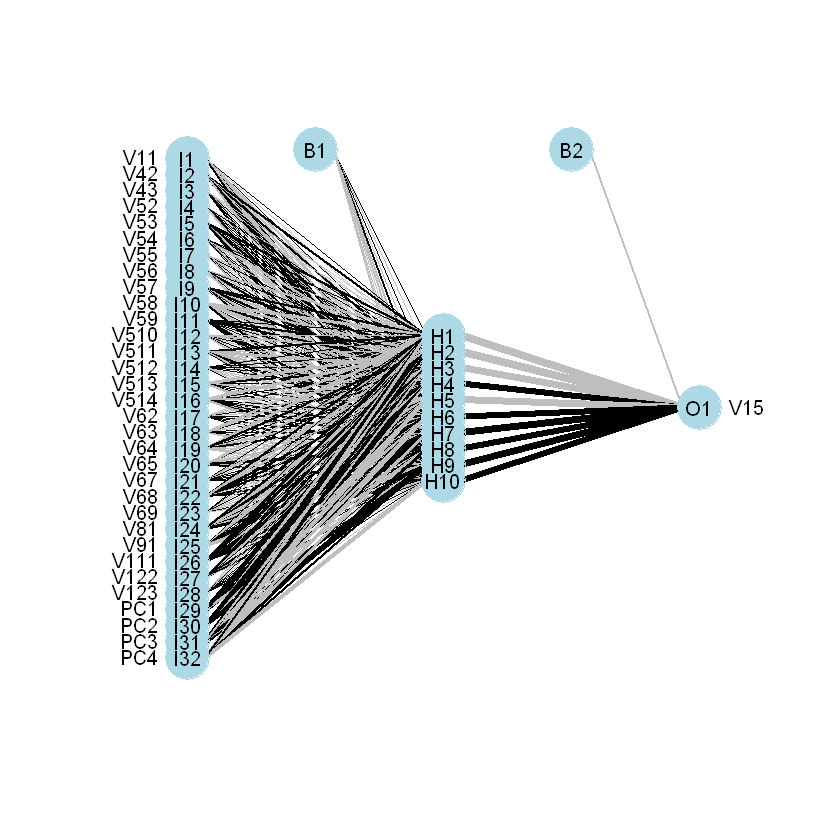

In [82]:

nnet_model <- nnet(V15 ~ ., data = train1,  size =10, maxit = 10000, decay = 0.01)
plotnet(nnet_model)
nnet_train_predictions <- predict(nnet_model, train1,
                                type = "class")
(n_train_accuracy <- mean(nnet_train_predictions ==train1$V15))
con_mat <- confusionMatrix(as.factor(nnet_train_predictions), as.factor(train1$V15))
con_mat
nnet_test_predictions <- predict(nnet_model, test1,
                                type = "class")
(n_test_accuracy <- mean(nnet_test_predictions ==test1$V15))

RFtestpredict1 <- predict(RFmodeltrain1,test1, type = 'class')
con_mat <- confusionMatrix(as.factor(nnet_test_predictions), as.factor(test1$V15))
con_mat

[1] "precision"


Pos Pred Value 
     0.9454545

[1] "recall"


Sensitivity 
  0.8666667

[1] "f-score"


Pos Pred Value 
     0.9043478

[1] "accuracy"


Accuracy 
0.9043478

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0000000 0.1333333 1.0000000


Slot "y.values":
[[1]]
[1] 0.0000000 0.9454545 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   1   0



[[1]]
[1] 0.9060606

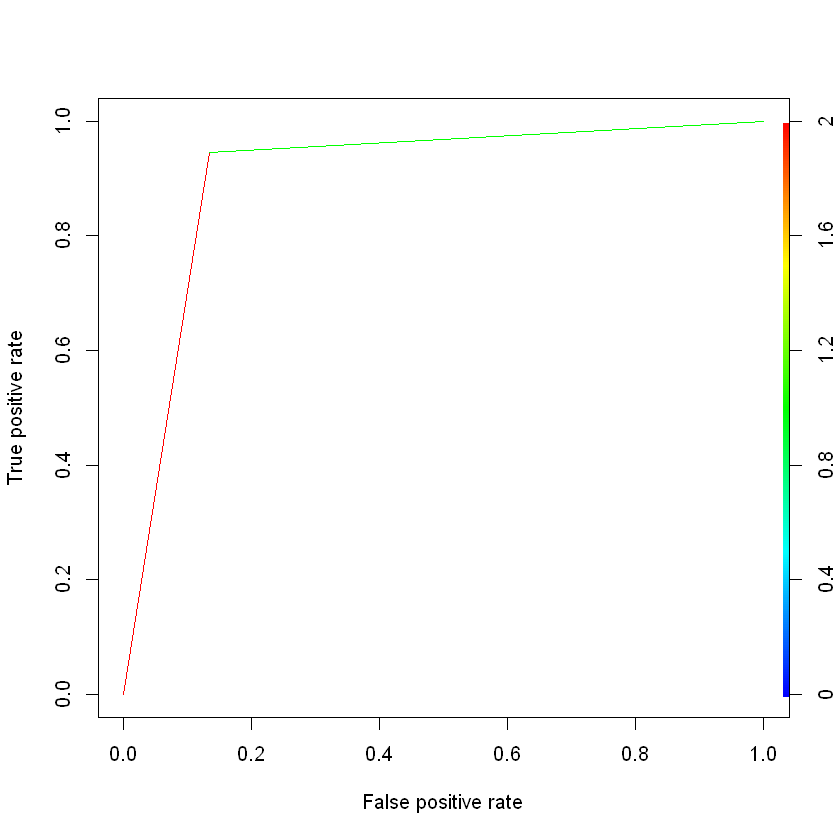

In [83]:
#Precision and Recall
print("precision")
NNET_precision_reduced_test <- con_mat$byClass['Pos Pred Value']
NNET_precision_reduced_test
print("recall")
NNET_recall_reduced_test <- con_mat$byClass['Sensitivity']
NNET_recall_reduced_test
print("f-score")
NNET_Fscore_reduced_test <- (2*NNET_precision_reduced_test*NNET_recall_reduced_test)/sum(NNET_precision_reduced_test,NNET_recall_reduced_test)
NNET_Fscore_reduced_test 
print("accuracy")
NNET_Accuracy_reduced_test <- con_mat$overall['Accuracy']
NNET_Accuracy_reduced_test
NNET_predROCR_reduced_test <- prediction(as.numeric(nnet_test_predictions), as.numeric(test1$V15))
NNET_peNNETROCR_reduced_test <- performance(NNET_predROCR_reduced_test, "tpr", "fpr")
NNET_peNNETROCR_reduced_test
NNET_AUC_reduced_test <- performance(NNET_predROCR_reduced_test, "auc")@y.values
NNET_AUC_reduced_test
plot(NNET_peNNETROCR_reduced_test, colorize = TRUE)

<b>Using Neural network, we can see that the accuracy, recall, precision on the reduced are 90.06, 92.95, 88.54 percents respectively and on the balanced test data are 88.69, 94.19 , 87.64 </b>

<b>Building Neural network (nnet) on the train dataset of reduced with feature selection and making prediction on test and train</b>

# weights:  191
initial  value 312.680103 
iter  10 value 164.767107
iter  20 value 149.422375
iter  30 value 143.327958
iter  40 value 137.187632
iter  50 value 132.358955
iter  60 value 130.063572
iter  70 value 129.333695
iter  80 value 128.929141
iter  90 value 128.743017
iter 100 value 128.625367
iter 110 value 128.463728
iter 120 value 128.328341
iter 130 value 128.141156
iter 140 value 127.984169
iter 150 value 127.797796
iter 160 value 127.643085
iter 170 value 127.517872
iter 180 value 127.456446
iter 190 value 127.390387
iter 200 value 127.269139
iter 210 value 127.012183
iter 220 value 126.833206
iter 230 value 126.650926
iter 240 value 126.456662
iter 250 value 126.336492
iter 260 value 126.259456
iter 270 value 126.215131
iter 280 value 126.180037
iter 290 value 126.138565
iter 300 value 126.099873
iter 310 value 126.045117
iter 320 value 126.011676
iter 330 value 125.979277
iter 340 value 125.947977
iter 350 value 125.926819
iter 360 value 125.906610
iter 370 value 125.89

[1] 0.8790497

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 212  27
         1  29 195
                                          
               Accuracy : 0.879           
                 95% CI : (0.8458, 0.9073)
    No Information Rate : 0.5205          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7578          
                                          
 Mcnemar's Test P-Value : 0.8937          
                                          
            Sensitivity : 0.8797          
            Specificity : 0.8784          
         Pos Pred Value : 0.8870          
         Neg Pred Value : 0.8705          
             Prevalence : 0.5205          
         Detection Rate : 0.4579          
   Detection Prevalence : 0.5162          
      Balanced Accuracy : 0.8790          
                                          
       'Positive' Class : 0               
                              

[1] 0.8521739

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 51  8
         1  9 47
                                          
               Accuracy : 0.8522          
                 95% CI : (0.7739, 0.9115)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : 7.835e-14       
                                          
                  Kappa : 0.704           
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8500          
            Specificity : 0.8545          
         Pos Pred Value : 0.8644          
         Neg Pred Value : 0.8393          
             Prevalence : 0.5217          
         Detection Rate : 0.4435          
   Detection Prevalence : 0.5130          
      Balanced Accuracy : 0.8523          
                                          
       'Positive' Class : 0               
                                    

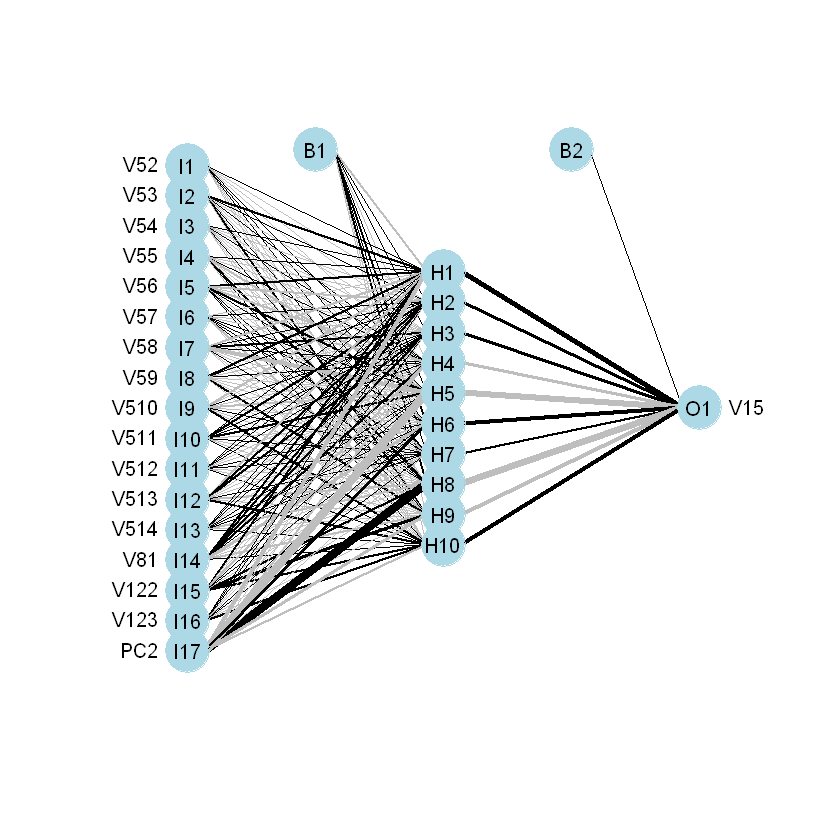

In [84]:

nnet_model <- nnet(V15 ~ ., data = train1[,-c(1,2,4,6,7,10,12,13)],  size =10, maxit = 10000, decay = 0.01)
plotnet(nnet_model)
nnet_train_predictions <- predict(nnet_model, train1,
                                type = "class")
(n_train_accuracy <- mean(nnet_train_predictions ==train1$V15))
con_mat <- confusionMatrix(as.factor(nnet_train_predictions), as.factor(train1$V15))
con_mat
nnet_test_predictions <- predict(nnet_model, test1,
                                type = "class")
(n_test_accuracy <- mean(nnet_test_predictions ==test1$V15))

RFtestpredict1 <- predict(RFmodeltrain1,test1, type = 'class')
con_mat <- confusionMatrix(as.factor(nnet_test_predictions), as.factor(test1$V15))
con_mat

[1] "precision"


Pos Pred Value 
     0.8644068

[1] "recall"


Sensitivity 
       0.85

[1] "f-score"


Pos Pred Value 
     0.8571429

[1] "accuracy"


Accuracy 
0.8521739

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.00 0.15 1.00


Slot "y.values":
[[1]]
[1] 0.0000000 0.8545455 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   1   0



[[1]]
[1] 0.8522727

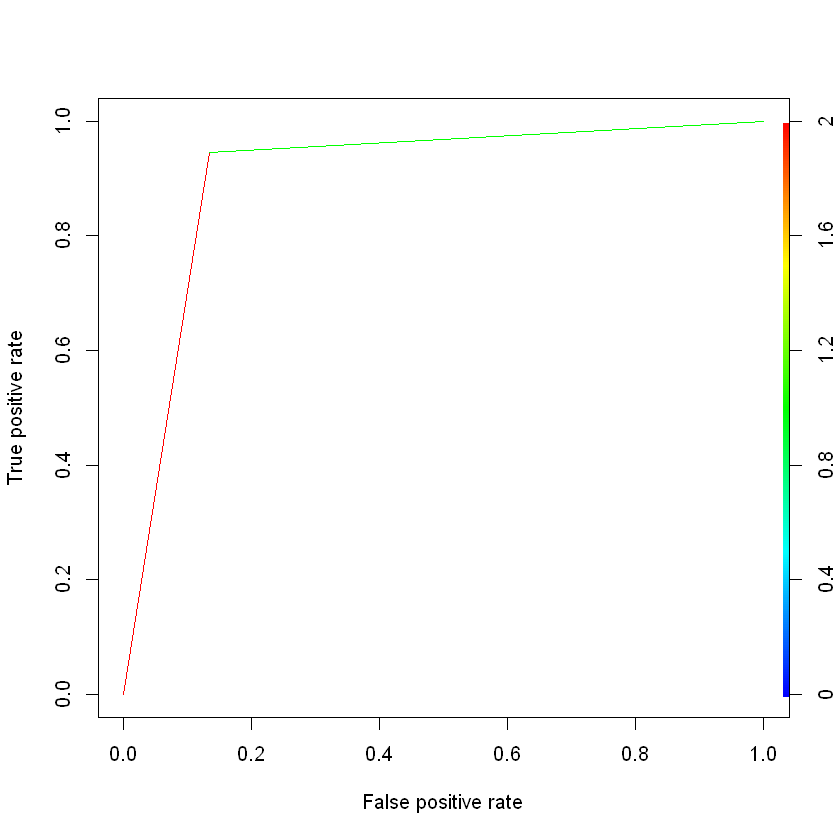

In [85]:
#Precision and Recall
print("precision")
NNET_precision_reduced_test_fr<- con_mat$byClass['Pos Pred Value']
NNET_precision_reduced_test_fr
print("recall")
NNET_recall_reduced_test_fr <- con_mat$byClass['Sensitivity']
NNET_recall_reduced_test_fr
print("f-score")
NNET_Fscore_reduced_test_fr <- (2*NNET_precision_reduced_test_fr*NNET_recall_reduced_test_fr)/sum(NNET_precision_reduced_test_fr,NNET_recall_reduced_test_fr)
NNET_Fscore_reduced_test_fr
print("accuracy")
NNET_Accuracy_reduced_test_fr<- con_mat$overall['Accuracy']
NNET_Accuracy_reduced_test_fr
NNET_predROCR_reduced_test_fr <- prediction(as.numeric(nnet_test_predictions), as.numeric(test1$V15))
NNET_peNNETROCR_reduced_test_fr <- performance(NNET_predROCR_reduced_test_fr, "tpr", "fpr")
NNET_peNNETROCR_reduced_test_fr
NNET_AUC_reduced_test_fr <- performance(NNET_predROCR_reduced_test_fr, "auc")@y.values
NNET_AUC_reduced_test_fr
plot(NNET_peNNETROCR_reduced_test, colorize = TRUE)

<b>Using Neural network, we can see that the accuracy, recall, precision on the reduced train dataset with feature selection are 87.69, 87.14, 88.98 percents respectively and on the balanced test data are 85.22, 85 , 86.44 </b>

<b>Cross fold</b>

In [86]:
data_ctrl <- trainControl(method = "cv", number = 10)
LRcv<- train(V15 ~.,  
                     data =Australia2.balanced,                        
                     trControl = data_ctrl,              # folds
                     method = "nnet",                      # specifying regression model
                     )  
   #create model
   # fit <- train(trainData[, -classIndex], trainData[, classIndex], method = "nb",trControl=train_control)
summary(LRcv)
LRcv
LRcv<- train(V15 ~.,  
             data =Australia.reduced,                        
             trControl = data_ctrl,              # folds
             method = "nnet",                      # specifying regression model
             family=binomial())  
summary(LRcv)
LRcv

# weights:  37
initial  value 358.931599 
iter  10 value 175.124454
iter  20 value 156.087563
iter  30 value 149.914050
iter  40 value 142.525996
iter  50 value 138.746605
iter  60 value 138.709133
final  value 138.709087 
converged
# weights:  109
initial  value 363.829087 
iter  10 value 156.983495
iter  20 value 97.621768
iter  30 value 80.050728
iter  40 value 75.606560
iter  50 value 73.089218
iter  60 value 72.576707
iter  70 value 72.519014
iter  80 value 72.515715
iter  90 value 72.515320
iter 100 value 72.509909
final  value 72.509909 
stopped after 100 iterations
# weights:  181
initial  value 352.805529 
iter  10 value 151.473003
iter  20 value 98.969756
iter  30 value 54.478441
iter  40 value 40.450579
iter  50 value 32.096781
iter  60 value 29.976888
iter  70 value 29.691468
iter  80 value 29.470832
iter  90 value 29.089418
iter 100 value 28.988751
final  value 28.988751 
stopped after 100 iterations
# weights:  37
initial  value 362.275270 
iter  10 value 236.642484
iter 

a 34-5-1 network with 181 weights
options were - entropy fitting  decay=0.1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
  -2.55    2.38   -2.84    2.50    0.67    0.05    0.52   -1.71   -2.06    0.27 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
  -0.20   -0.59    0.40   -0.93    0.52    3.04    0.03   -0.39    0.82    0.18 
i20->h1 i21->h1 i22->h1 i23->h1 i24->h1 i25->h1 i26->h1 i27->h1 i28->h1 i29->h1 
   1.54   -0.30   -0.04   -0.56   -1.10   -0.08    0.08    2.15    2.02    0.23 
i30->h1 i31->h1 i32->h1 i33->h1 i34->h1 
  -1.58   -1.21    0.88   -2.02    0.32 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  -1.63   -2.37    0.63    0.72   -0.13    0.68    0.08   -0.37   -0.89   -1.16 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
  -0.18    2.14   -2.23   -0.18    0.18   -1.23    0.05    1.85    3.00    0.67 
i20->h2 i21->h2 i22->h2 i23->h2 

Neural Network 

578 samples
 14 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 521, 520, 520, 520, 519, 520, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa    
  1     0e+00  0.8357398  0.6716482
  1     1e-04  0.8442144  0.6885430
  1     1e-01  0.8564639  0.7124174
  3     0e+00  0.8409728  0.6816085
  3     1e-04  0.8513478  0.7016078
  3     1e-01  0.8720426  0.7439854
  5     0e+00  0.8531617  0.7054746
  5     1e-04  0.8480477  0.6951256
  5     1e-01  0.8823885  0.7641313

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 5 and decay = 0.1.

# weights:  35
initial  value 393.238068 
iter  10 value 220.620932
iter  20 value 160.358897
iter  30 value 153.380761
iter  40 value 147.324868
iter  50 value 143.540598
iter  60 value 143.402152
final  value 143.401975 
converged
# weights:  103
initial  value 401.098932 
iter  10 value 198.620022
iter  20 value 129.611395
iter  30 value 96.254653
iter  40 value 90.192097
iter  50 value 87.206628
iter  60 value 85.473119
iter  70 value 85.270772
iter  80 value 85.257453
iter  90 value 85.256270
final  value 85.256125 
converged
# weights:  171
initial  value 399.003980 
iter  10 value 182.482675
iter  20 value 106.486494
iter  30 value 93.762017
iter  40 value 90.851960
iter  50 value 86.299035
iter  60 value 78.316917
iter  70 value 77.900281
final  value 77.873563 
converged
# weights:  35
initial  value 356.239211 
iter  10 value 194.722769
iter  20 value 177.573656
iter  30 value 175.156628
iter  40 value 174.122657
iter  50 value 174.108551
final  value 174.108545 
converged
# 

a 32-5-1 network with 171 weights
options were - entropy fitting  decay=0.1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
  -0.91    1.89   -1.33    1.26    0.51   -0.12   -1.18   -0.39   -1.53    0.20 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
   0.82    1.30    0.42    0.81   -0.37    2.42    2.91    0.50    1.55   -0.28 
i20->h1 i21->h1 i22->h1 i23->h1 i24->h1 i25->h1 i26->h1 i27->h1 i28->h1 i29->h1 
   0.63   -0.56    3.16   -0.27   -1.73    0.69   -1.43    0.36    1.92   -3.98 
i30->h1 i31->h1 i32->h1 
   0.32    2.72   -1.72 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  -0.92    1.30   -0.62    0.65   -0.15    0.12   -1.18   -0.60    1.94   -1.25 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
   0.85    0.91   -0.43   -1.25   -0.02    2.12    1.92    0.19    0.25   -0.50 
i20->h2 i21->h2 i22->h2 i23->h2 i24->h2 i25->h2 i26->h2 i27->h2 

Neural Network 

578 samples
 12 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 520, 520, 520, 520, 521, 521, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa    
  1     0e+00  0.8390200  0.6782664
  1     1e-04  0.8563218  0.7127478
  1     1e-01  0.8649425  0.7298265
  3     0e+00  0.8563823  0.7119577
  3     1e-04  0.8511192  0.7021268
  3     1e-01  0.8562916  0.7126431
  5     0e+00  0.8440714  0.6887698
  5     1e-04  0.8770720  0.7538032
  5     1e-01  0.8787054  0.7574536

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 5 and decay = 0.1.

### Bagging on CART

<b>Applying bagging on CART on the train dataset of balanced and making prediction on test and train</b>

In [87]:
bagged_model_cart <- bagging(V15 ~ ., data = train, nbagg = 100, coob = T)
bagged_model_cart
#Predicting using the CART model
pred_baggedcarttrain<-predict(bagged_model_cart,train)
#pred_baggedcart
con_mat=confusionMatrix(as.factor(train$V15),as.factor(pred_baggedcarttrain))
con_mat
pred_baggedcarttest<-predict(bagged_model_cart,test)
#pred_baggedcart
con_mat=confusionMatrix(as.factor(test$V15),as.factor(pred_baggedcarttest))
con_mat


Bagging classification trees with 100 bootstrap replications 

Call: bagging.data.frame(formula = V15 ~ ., data = train, nbagg = 100, 
    coob = T)

Out-of-bag estimate of misclassification error:  0.1339 


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 241   0
         1   0 222
                                     
               Accuracy : 1          
                 95% CI : (0.9921, 1)
    No Information Rate : 0.5205     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5205     
         Detection Rate : 0.5205     
   Detection Prevalence : 0.5205     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 54  6
         1  2 53
                                          
               Accuracy : 0.9304          
                 95% CI : (0.8675, 0.9695)
    No Information Rate : 0.513           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.861           
                                          
 Mcnemar's Test P-Value : 0.2888          
                                          
            Sensitivity : 0.9643          
            Specificity : 0.8983          
         Pos Pred Value : 0.9000          
         Neg Pred Value : 0.9636          
             Prevalence : 0.4870          
         Detection Rate : 0.4696          
   Detection Prevalence : 0.5217          
      Balanced Accuracy : 0.9313          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
           0.9

[1] "recall"


Sensitivity 
  0.9642857

[1] "f-score"


Pos Pred Value 
     0.9310345

[1] "accuracy"


Accuracy 
0.9304348

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0 0.1 1.0


Slot "y.values":
[[1]]
[1] 0.0000000 0.9636364 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   2   1



[[1]]
[1] 0.9318182

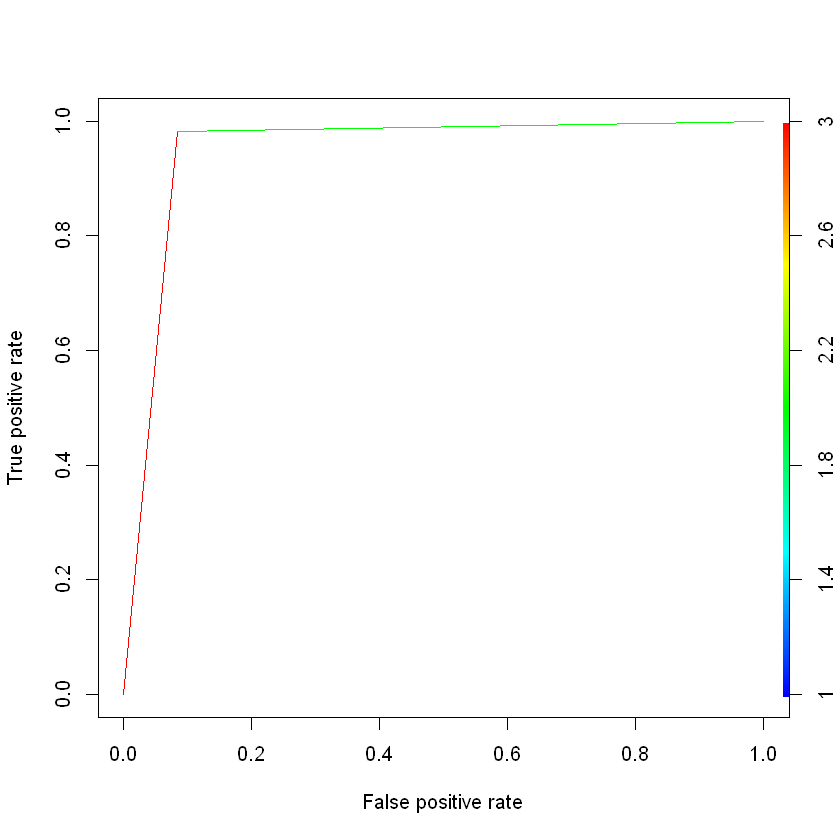

In [88]:
#Precision and Recall
print("precision")
BAG_precision_balanced_test <- con_mat$byClass['Pos Pred Value']
BAG_precision_balanced_test
print("recall")
BAG_recall_balanced_test <- con_mat$byClass['Sensitivity']
BAG_recall_balanced_test
print("f-score")
BAG_Fscore_balanced_test <- (2*BAG_precision_balanced_test*BAG_recall_balanced_test)/sum(BAG_precision_balanced_test,BAG_recall_balanced_test)
BAG_Fscore_balanced_test 
print("accuracy")
BAG_Accuracy_balanced_test <- con_mat$overall['Accuracy']
BAG_Accuracy_balanced_test
BAG_predROCR_balanced_test <- prediction(as.numeric(pred_baggedcarttest), as.numeric(test$V15))
BAG_perfROCR_balanced_test <- performance(BAG_predROCR_balanced_test, "tpr", "fpr")
BAG_perfROCR_balanced_test
BAG_AUC_balanced_test <- performance(BAG_predROCR_balanced_test, "auc")@y.values
BAG_AUC_balanced_test
plot(RF_perfROCR_balanced_test, colorize = TRUE)

<b>Using bagging, we can see that the accuracy, recall, precision on the balanced train dataset with feature selection are 100, 100, 100 percents respectively and on the balanced test data are 92.17, 94.74, 90.0 </b>

<b>Applying bagging on the train dataset of balanced considering important features and making prediction on test and train</b>

In [89]:
bagged_model_cart_feat <- bagging(V15 ~ ., data = train[,-c(1,2,3,4,6,7,9,11)],nbagg=100,coob=T)
bagged_model_cart_feat
#Predicting using the CART model
pred_baggedcarttrain_feat<-predict(bagged_model_cart_feat,train)
#pred_baggedcart
con_mat=confusionMatrix(as.factor(train$V15),as.factor(pred_baggedcarttrain_feat))
con_mat
pred_baggedcarttest_feat<-predict(bagged_model_cart_feat,test)
#pred_baggedcart
con_mat=confusionMatrix(as.factor(test$V15),as.factor(pred_baggedcarttest_feat))
con_mat



Bagging classification trees with 100 bootstrap replications 

Call: bagging.data.frame(formula = V15 ~ ., data = train[, -c(1, 2, 
    3, 4, 6, 7, 9, 11)], nbagg = 100, coob = T)

Out-of-bag estimate of misclassification error:  0.1447 


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 241   0
         1   0 222
                                     
               Accuracy : 1          
                 95% CI : (0.9921, 1)
    No Information Rate : 0.5205     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5205     
         Detection Rate : 0.5205     
   Detection Prevalence : 0.5205     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 52  8
         1  3 52
                                          
               Accuracy : 0.9043          
                 95% CI : (0.8353, 0.9513)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8091          
                                          
 Mcnemar's Test P-Value : 0.2278          
                                          
            Sensitivity : 0.9455          
            Specificity : 0.8667          
         Pos Pred Value : 0.8667          
         Neg Pred Value : 0.9455          
             Prevalence : 0.4783          
         Detection Rate : 0.4522          
   Detection Prevalence : 0.5217          
      Balanced Accuracy : 0.9061          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
     0.8666667

[1] "recall"


Sensitivity 
  0.9454545

[1] "f-score"


Pos Pred Value 
     0.9043478

[1] "accuracy"


Accuracy 
0.9043478

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0000000 0.1333333 1.0000000


Slot "y.values":
[[1]]
[1] 0.0000000 0.9454545 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   2   1



[[1]]
[1] 0.9060606

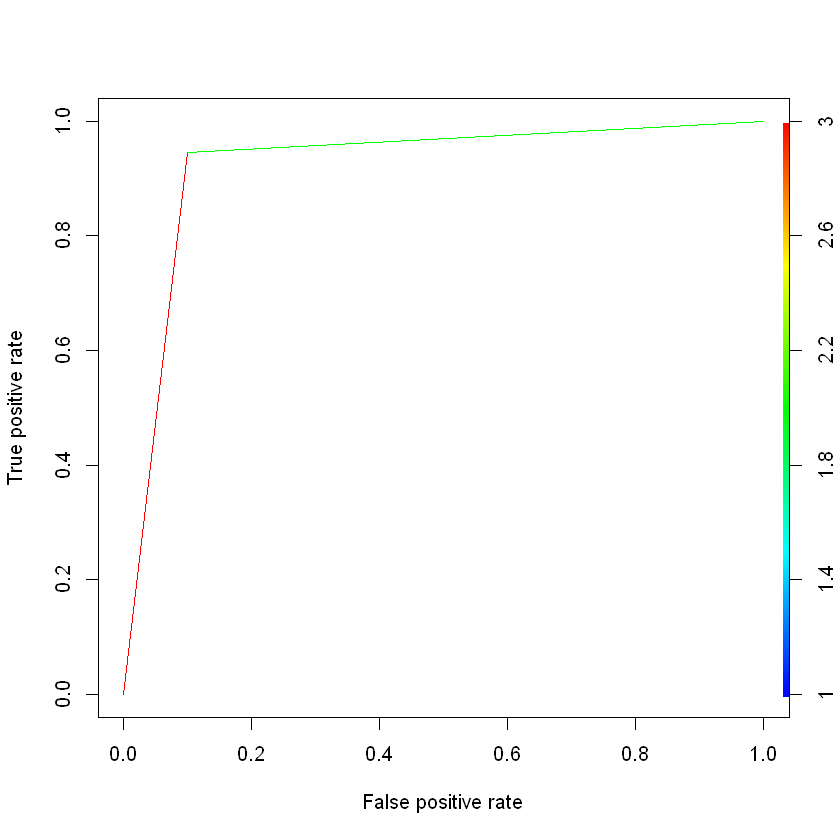

In [90]:
#Precision and Recall
print("precision")
BAG_precision_balanced_test_fr <- con_mat$byClass['Pos Pred Value']
BAG_precision_balanced_test_fr
print("recall")
BAG_recall_balanced_test_fr <- con_mat$byClass['Sensitivity']
BAG_recall_balanced_test_fr
print("f-score")
BAG_Fscore_balanced_test_fr <- (2*BAG_precision_balanced_test_fr*BAG_recall_balanced_test_fr)/sum(BAG_precision_balanced_test_fr,BAG_recall_balanced_test_fr)
BAG_Fscore_balanced_test_fr 
print("accuracy")
BAG_Accuracy_balanced_test_fr <- con_mat$overall['Accuracy']
BAG_Accuracy_balanced_test_fr
BAG_predROCR_balanced_test_fr <- prediction(as.numeric(pred_baggedcarttest_feat), as.numeric(test$V15))
BAG_perfROCR_balanced_test_fr <- performance(BAG_predROCR_balanced_test_fr, "tpr", "fpr")
BAG_perfROCR_balanced_test_fr
BAG_AUC_balanced_test_fr <- performance(BAG_predROCR_balanced_test_fr, "auc")@y.values
BAG_AUC_balanced_test_fr
plot(RF_perfROCR_balanced_test_fr, colorize = TRUE)

<b>Using bagging, we can see that the accuracy, recall, precision on the balanced train dataset with feature selection are 100, 100, 100, 100 percents respectively and on the balanced test data are 93.04, 94.83, 91.67</b>

<b>Applying bagging CART on the train dataset of reduced and making prediction on test and train</b>

In [91]:
bagged_model_cart1 <- bagging(V15 ~ ., data = train1, nbagg = 100, coob = T)
bagged_model_cart
#Predicting using the CART model
pred_baggedcarttrain1<-predict(bagged_model_cart1,train1)
#pred_baggedcart
con_mat=confusionMatrix(as.factor(train1$V15),as.factor(pred_baggedcarttrain1))
con_mat
pred_baggedcarttest1<-predict(bagged_model_cart1,test1)
#pred_baggedcart
con_mat=confusionMatrix(as.factor(test1$V15),as.factor(pred_baggedcarttest1))
con_mat



Bagging classification trees with 100 bootstrap replications 

Call: bagging.data.frame(formula = V15 ~ ., data = train, nbagg = 100, 
    coob = T)

Out-of-bag estimate of misclassification error:  0.1339 


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 241   0
         1   0 222
                                     
               Accuracy : 1          
                 95% CI : (0.9921, 1)
    No Information Rate : 0.5205     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5205     
         Detection Rate : 0.5205     
   Detection Prevalence : 0.5205     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 50 10
         1  2 53
                                          
               Accuracy : 0.8957          
                 95% CI : (0.8248, 0.9449)
    No Information Rate : 0.5478          
    P-Value [Acc > NIR] : 6.285e-16       
                                          
                  Kappa : 0.7922          
                                          
 Mcnemar's Test P-Value : 0.04331         
                                          
            Sensitivity : 0.9615          
            Specificity : 0.8413          
         Pos Pred Value : 0.8333          
         Neg Pred Value : 0.9636          
             Prevalence : 0.4522          
         Detection Rate : 0.4348          
   Detection Prevalence : 0.5217          
      Balanced Accuracy : 0.9014          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
     0.8333333

[1] "recall"


Sensitivity 
  0.9615385

[1] "f-score"


Pos Pred Value 
     0.8928571

[1] "accuracy"


Accuracy 
0.8956522

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0000000 0.1666667 1.0000000


Slot "y.values":
[[1]]
[1] 0.0000000 0.9636364 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   2   1



[[1]]
[1] 0.8984848

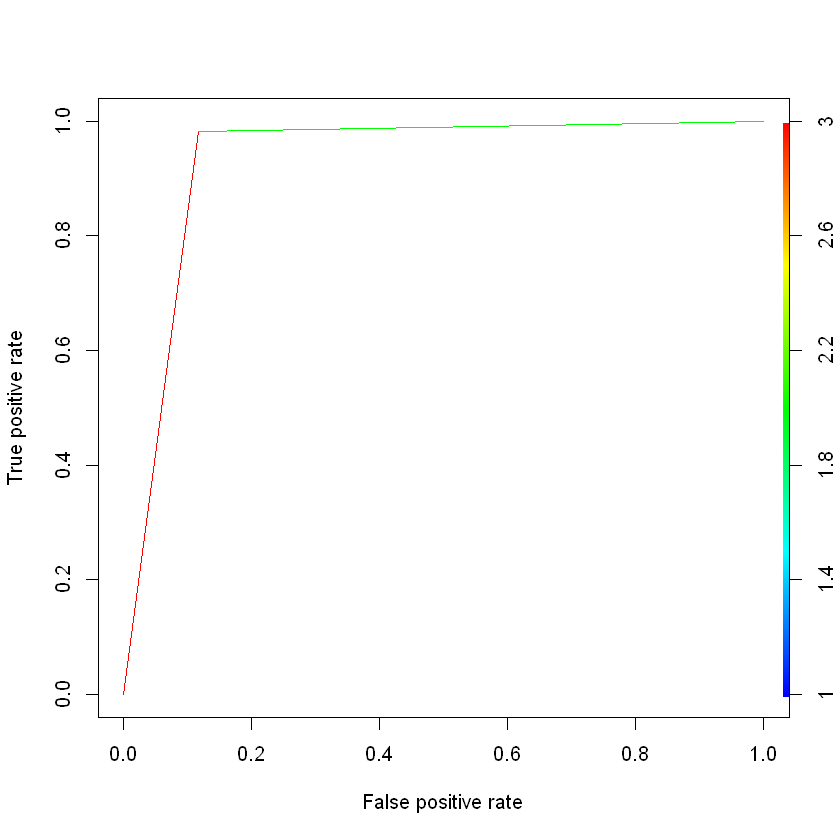

In [92]:
#Precision and Recall
print("precision")
BAG_precision_reduced_test <- con_mat$byClass['Pos Pred Value']
BAG_precision_reduced_test
print("recall")
BAG_recall_reduced_test <- con_mat$byClass['Sensitivity']
BAG_recall_reduced_test
print("f-score")
BAG_Fscore_reduced_test <- (2*BAG_precision_reduced_test*BAG_recall_reduced_test)/sum(BAG_precision_reduced_test,BAG_recall_reduced_test)
BAG_Fscore_reduced_test 
print("accuracy")
BAG_Accuracy_reduced_test <- con_mat$overall['Accuracy']
BAG_Accuracy_reduced_test
BAG_predROCR_reduced_test <- prediction(as.numeric(pred_baggedcarttest1), as.numeric(test1$V15))
BAG_perfROCR_reduced_test <- performance(BAG_predROCR_reduced_test, "tpr", "fpr")
BAG_perfROCR_reduced_test
BAG_AUC_reduced_test <- performance(BAG_predROCR_reduced_test, "auc")@y.values
BAG_AUC_reduced_test
plot(RF_perfROCR_reduced_test, colorize = TRUE)

<b>Using bagging, we can see that the accuracy, recall, precision on the reduced train dataset with feature selection are 100, 100, 100 percents respectively and on the reduced test data are 91.3, 96.3,  86.67</b>

<b>Applying bagging CART on the train dataset of reduced with feature selection and making prediction on test and train</b>

In [93]:
bagged_model_cart1 <- bagging(V15 ~ ., data = train1[,-c(1,2,4,6,11,12,13)], nbagg = 100, coob = T)
#summary(bagged_model_cart)
bagged_model_cart1
#Predicting using the CART model
pred_baggedcarttrain1<-predict(bagged_model_cart1,train1)
#pred_baggedcart
con_mat=confusionMatrix(as.factor(train1$V15),as.factor(pred_baggedcarttrain1))
con_mat
pred_baggedcarttest1<-predict(bagged_model_cart1,test1)
#pred_baggedcart
con_mat=confusionMatrix(as.factor(test1$V15),as.factor(pred_baggedcarttest1))
con_mat



Bagging classification trees with 100 bootstrap replications 

Call: bagging.data.frame(formula = V15 ~ ., data = train1[, -c(1, 2, 
    4, 6, 11, 12, 13)], nbagg = 100, coob = T)

Out-of-bag estimate of misclassification error:  0.216 


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 241   0
         1   0 222
                                     
               Accuracy : 1          
                 95% CI : (0.9921, 1)
    No Information Rate : 0.5205     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5205     
         Detection Rate : 0.5205     
   Detection Prevalence : 0.5205     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 52  8
         1  8 47
                                          
               Accuracy : 0.8609          
                 95% CI : (0.7839, 0.9183)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : 1.445e-14       
                                          
                  Kappa : 0.7212          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8667          
            Specificity : 0.8545          
         Pos Pred Value : 0.8667          
         Neg Pred Value : 0.8545          
             Prevalence : 0.5217          
         Detection Rate : 0.4522          
   Detection Prevalence : 0.5217          
      Balanced Accuracy : 0.8606          
                                          
       'Positive' Class : 0               
                                    

[1] "precision"


Pos Pred Value 
     0.8666667

[1] "recall"


Sensitivity 
  0.8666667

[1] "f-score"


Pos Pred Value 
     0.8666667

[1] "accuracy"


Accuracy 
0.8608696

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
[1] 0.0000000 0.1333333 1.0000000


Slot "y.values":
[[1]]
[1] 0.0000000 0.8545455 1.0000000


Slot "alpha.values":
[[1]]
[1] Inf   2   1



[[1]]
[1] 0.8606061

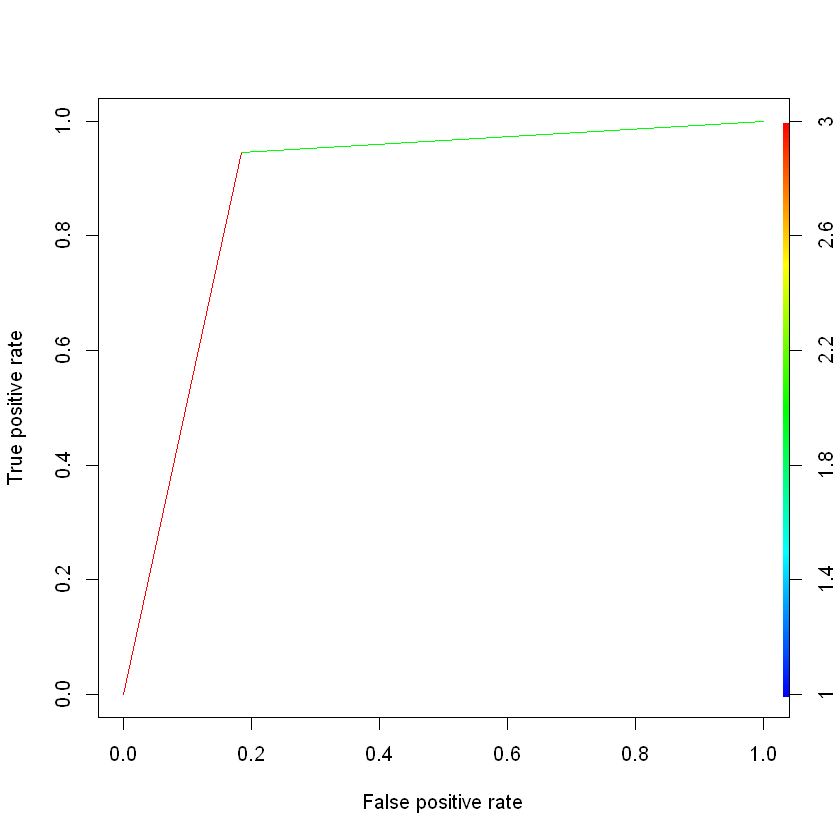

In [94]:
#Precision and Recall
print("precision")
BAG_precision_reduced_test_fr <- con_mat$byClass['Pos Pred Value']
BAG_precision_reduced_test_fr
print("recall")
BAG_recall_reduced_test_fr <- con_mat$byClass['Sensitivity']
BAG_recall_reduced_test_fr
print("f-score")
BAG_Fscore_reduced_test_fr <- (2*BAG_precision_reduced_test_fr*BAG_recall_reduced_test_fr)/sum(BAG_precision_reduced_test_fr,BAG_recall_reduced_test_fr)
BAG_Fscore_reduced_test_fr 
print("accuracy")
BAG_Accuracy_reduced_test_fr <- con_mat$overall['Accuracy']
BAG_Accuracy_reduced_test_fr
BAG_predROCR_reduced_test_fr <- prediction(as.numeric(pred_baggedcarttest1), as.numeric(test1$V15))
BAG_perfROCR_reduced_test_fr <- performance(BAG_predROCR_reduced_test_fr, "tpr", "fpr")
BAG_perfROCR_reduced_test_fr
BAG_AUC_reduced_test_fr <- performance(BAG_predROCR_reduced_test_fr, "auc")@y.values
BAG_AUC_reduced_test_fr
plot(RF_perfROCR_reduced_test_fr, colorize = TRUE)

<b>Using bagging, we can see that the accuracy, recall, precision on the reduced train dataset with feature selection are 100, 100, 100 percents respectively and on the reduced test data are 85.22, 85.25,  86.67</b>

### Boosting on CART

<b>Applying boosing on CART on the train dataset of balanced and making prediction on test and train</b>

In [95]:

Model.adaboost <- boosting(V15 ~ ., data=train, boos=TRUE, mfinal=5)
#names(Model.adaboost)
Model.adaboost
pred_boosttrain<-predict(Model.adaboost, train, type = "class")
#names(pred_boost)

#pred_boost$class
#mean(pred_boosttrain$class==train$V15)
con_mat=confusionMatrix(factor(pred_boosttrain$class), train$V15)
con_mat

pred_boosttest<-predict(Model.adaboost, test, type = "class")
#names(pred_boost)

#pred_boost$class
#mean(pred_boosttest$class==test$V15)
con_mat=confusionMatrix(factor(pred_boosttest$class), test$V15)
con_mat


$formula
V15 ~ .

$trees
$trees[[1]]
n= 463 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 463 214 0 (0.53779698 0.46220302)  
   2) V8=0 224  28 0 (0.87500000 0.12500000)  
     4) V12=1,2 215  19 0 (0.91162791 0.08837209)  
       8) V14>=0.1061634 208  13 0 (0.93750000 0.06250000) *
       9) V14< 0.1061634 7   1 1 (0.14285714 0.85714286) *
     5) V12=3 9   0 1 (0.00000000 1.00000000) *
   3) V8=1 239  53 1 (0.22175732 0.77824268)  
     6) V13>=0.2976919 129  47 1 (0.36434109 0.63565891)  
      12) V14< 0.3121439 70  29 0 (0.58571429 0.41428571)  
        24) V5=1,3,4,6,8,9,13 45   8 0 (0.82222222 0.17777778) *
        25) V5=2,7,10,11,14 25   4 1 (0.16000000 0.84000000) *
      13) V14>=0.3121439 59   6 1 (0.10169492 0.89830508) *
     7) V13< 0.2976919 110   6 1 (0.05454545 0.94545455) *

$trees[[2]]
n= 463 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 463 230 1 (0.49676026 0.50323974)  
   2) V8=0 243  64 0 (0.73

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 230  11
         1  11 211
                                        
               Accuracy : 0.9525        
                 95% CI : (0.9289, 0.97)
    No Information Rate : 0.5205        
    P-Value [Acc > NIR] : <2e-16        
                                        
                  Kappa : 0.9048        
                                        
 Mcnemar's Test P-Value : 1             
                                        
            Sensitivity : 0.9544        
            Specificity : 0.9505        
         Pos Pred Value : 0.9544        
         Neg Pred Value : 0.9505        
             Prevalence : 0.5205        
         Detection Rate : 0.4968        
   Detection Prevalence : 0.5205        
      Balanced Accuracy : 0.9524        
                                        
       'Positive' Class : 0             
                                        

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 53  5
         1  7 50
                                          
               Accuracy : 0.8957          
                 95% CI : (0.8248, 0.9449)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7912          
                                          
 Mcnemar's Test P-Value : 0.7728          
                                          
            Sensitivity : 0.8833          
            Specificity : 0.9091          
         Pos Pred Value : 0.9138          
         Neg Pred Value : 0.8772          
             Prevalence : 0.5217          
         Detection Rate : 0.4609          
   Detection Prevalence : 0.5043          
      Balanced Accuracy : 0.8962          
                                          
       'Positive' Class : 0               
                                    

In [96]:
#Precision and Recall
print("precision")
BOOST_precision_balanced_test <- con_mat$byClass['Pos Pred Value']
BOOST_precision_balanced_test
print("recall")
BOOST_recall_balanced_test <- con_mat$byClass['Sensitivity']
BOOST_recall_balanced_test
print("f-score")
BOOST_Fscore_balanced_test <- (2*BOOST_precision_balanced_test*BOOST_recall_balanced_test)/sum(BOOST_precision_balanced_test,BOOST_recall_balanced_test)
BOOST_Fscore_balanced_test 
print("accuracy")
BOOST_Accuracy_balanced_test <- con_mat$overall['Accuracy']
BOOST_Accuracy_balanced_test
#BOOST_predROCR_balanced_test <- prediction(as.numeric(pred_boosttest), as.numeric(test$V15))
#BOOST_perfROCR_balanced_test <- performance(BOOST_predROCR_balanced_test, "tpr", "fpr")
#BOOST_perfROCR_balanced_test
#BOOST_AUC_balanced_test <- performance(BOOST_predROCR_balanced_test, "auc")@y.values
#BOOST_AUC_balanced_test
#plot(RF_perfROCR_balanced_test, colorize = TRUE)

[1] "precision"


Pos Pred Value 
     0.9137931

[1] "recall"


Sensitivity 
  0.8833333

[1] "f-score"


Pos Pred Value 
     0.8983051

[1] "accuracy"


Accuracy 
0.8956522

<b>Using boosting, we can see that the accuracy, recall, precision on the balanced train dataset are 96.98,97.1, 97.1 percents respectively and on the balanced test data are 92.7, 86.67, 98.11</b>

<b>Applying boosting on CART on the train dataset of balanced considering important features and making prediction on test and train</b>

In [97]:

Model.adaboost <- boosting(V15 ~ ., data=train[,-c(1,2,3,4,6,7,9,11)], boos=TRUE, mfinal=5)
#names(Model.adaboost)
Model.adaboost
pred_boosttrain<-predict(Model.adaboost, train, type = "class")
#names(pred_boost)

#pred_boost$class
#mean(pred_boosttrain$class==train$V15)
con_mat=confusionMatrix(factor(pred_boosttrain$class), train$V15)
con_mat

pred_boosttest<-predict(Model.adaboost, test, type = "class")
#names(pred_boost)

#pred_boost$class
#mean(pred_boosttest$class==test$V15)
con_mat=confusionMatrix(factor(pred_boosttest$class), test$V15)
con_mat


$formula
V15 ~ .

$trees
$trees[[1]]
n= 463 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 463 222 0 (0.52051836 0.47948164)  
   2) V8=0 237  38 0 (0.83966245 0.16033755)  
     4) V5=1,2,3,4,5,6,7,9,11,13 181   8 0 (0.95580110 0.04419890) *
     5) V5=8,10,14 56  26 1 (0.46428571 0.53571429)  
      10) V12=2 34   9 0 (0.73529412 0.26470588) *
      11) V12=1,3 22   1 1 (0.04545455 0.95454545) *
   3) V8=1 226  42 1 (0.18584071 0.81415929)  
     6) V5=1,3,4,6,9 82  31 1 (0.37804878 0.62195122)  
      12) V13>=0.326857 39  12 0 (0.69230769 0.30769231)  
        24) V10< 0.1708941 28   3 0 (0.89285714 0.10714286) *
        25) V10>=0.1708941 11   2 1 (0.18181818 0.81818182) *
      13) V13< 0.326857 43   4 1 (0.09302326 0.90697674) *
     7) V5=2,7,8,10,11,12,13,14 144  11 1 (0.07638889 0.92361111) *

$trees[[2]]
n= 463 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 463 220 0 (0.52483801 0.47516199)  
    2) V8=0 217  5

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 226  10
         1  15 212
                                          
               Accuracy : 0.946           
                 95% CI : (0.9213, 0.9648)
    No Information Rate : 0.5205          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8919          
                                          
 Mcnemar's Test P-Value : 0.4237          
                                          
            Sensitivity : 0.9378          
            Specificity : 0.9550          
         Pos Pred Value : 0.9576          
         Neg Pred Value : 0.9339          
             Prevalence : 0.5205          
         Detection Rate : 0.4881          
   Detection Prevalence : 0.5097          
      Balanced Accuracy : 0.9464          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 53  5
         1  7 50
                                          
               Accuracy : 0.8957          
                 95% CI : (0.8248, 0.9449)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7912          
                                          
 Mcnemar's Test P-Value : 0.7728          
                                          
            Sensitivity : 0.8833          
            Specificity : 0.9091          
         Pos Pred Value : 0.9138          
         Neg Pred Value : 0.8772          
             Prevalence : 0.5217          
         Detection Rate : 0.4609          
   Detection Prevalence : 0.5043          
      Balanced Accuracy : 0.8962          
                                          
       'Positive' Class : 0               
                                    

In [98]:
#Precision and Recall
print("precision")
BOOST_precision_balanced_test_fr <- con_mat$byClass['Pos Pred Value']
BOOST_precision_balanced_test_fr
print("recall")
BOOST_recall_balanced_test_fr <- con_mat$byClass['Sensitivity']
BOOST_recall_balanced_test_fr
print("f-score")
BOOST_Fscore_balanced_test_fr <- (2*BOOST_precision_balanced_test_fr*BOOST_recall_balanced_test_fr)/sum(BOOST_precision_balanced_test_fr,BOOST_recall_balanced_test_fr)
BOOST_Fscore_balanced_test_fr 
print("accuracy")
BOOST_Accuracy_balanced_test_fr <- con_mat$overall['Accuracy']
BOOST_Accuracy_balanced_test_fr
#BOOST_predROCR_balanced_test_fr <- prediction(as.numeric(pred_boosttest), as.numeric(test$V15))
#BOOST_perfROCR_balanced_test_fr <- performance(BOOST_predROCR_balanced_test_fr, "tpr", "fpr")
#BOOST_perfROCR_balanced_test_fr
#BOOST_AUC_balanced_test_fr <- performance(BOOST_predROCR_balanced_test_fr, "auc")@y.values
#BOOST_AUC_balanced_test_fr
#plot(RF_perfROCR_balanced_test_fr, colorize = TRUE)

[1] "precision"


Pos Pred Value 
     0.9137931

[1] "recall"


Sensitivity 
  0.8833333

[1] "f-score"


Pos Pred Value 
     0.8983051

[1] "accuracy"


Accuracy 
0.8956522

<b>Using boosting, we can see that the accuracy, recall, precision on the balanced train dataset with feature selection are 93.74,92.95,94.92 percents respectively and on the balanced test data are 91.3,90, 93.10</b>

<b>Applying boosting on CART on the train dataset of reduced and making prediction on test and train</b>

In [99]:
Model.adaboost1 <- boosting(V15 ~ ., data=train1, boos=TRUE, mfinal=5)
#names(Model.adaboost)
#Model.adaboost
pred_boosttrain1<-predict(Model.adaboost1, train1, type = "class")
#names(pred_boost)

#pred_boost$class
#mean(pred_boosttrain1$class==train1$V15)
con_mat=confusionMatrix(factor(pred_boosttrain1$class), train1$V15)
con_mat

pred_boosttest1<-predict(Model.adaboost1, test1, type = "class")
#names(pred_boost)

#pred_boost$class
#mean(pred_boosttest1$class==test1$V15)
con_mat=confusionMatrix(factor(pred_boosttest1$class), test1$V15)
con_mat


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 229  15
         1  12 207
                                          
               Accuracy : 0.9417          
                 95% CI : (0.9163, 0.9612)
    No Information Rate : 0.5205          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8831          
                                          
 Mcnemar's Test P-Value : 0.7003          
                                          
            Sensitivity : 0.9502          
            Specificity : 0.9324          
         Pos Pred Value : 0.9385          
         Neg Pred Value : 0.9452          
             Prevalence : 0.5205          
         Detection Rate : 0.4946          
   Detection Prevalence : 0.5270          
      Balanced Accuracy : 0.9413          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 52  4
         1  8 51
                                          
               Accuracy : 0.8957          
                 95% CI : (0.8248, 0.9449)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7915          
                                          
 Mcnemar's Test P-Value : 0.3865          
                                          
            Sensitivity : 0.8667          
            Specificity : 0.9273          
         Pos Pred Value : 0.9286          
         Neg Pred Value : 0.8644          
             Prevalence : 0.5217          
         Detection Rate : 0.4522          
   Detection Prevalence : 0.4870          
      Balanced Accuracy : 0.8970          
                                          
       'Positive' Class : 0               
                                    

In [100]:
#Precision and Recall
print("precision")
BOOST_precision_reduced_test <- con_mat$byClass['Pos Pred Value']
BOOST_precision_reduced_test
print("recall")
BOOST_recall_reduced_test <- con_mat$byClass['Sensitivity']
BOOST_recall_reduced_test
print("f-score")
BOOST_Fscore_reduced_test <- (2*BOOST_precision_reduced_test*BOOST_recall_reduced_test)/sum(BOOST_precision_reduced_test,BOOST_recall_reduced_test)
BOOST_Fscore_reduced_test 
print("accuracy")
BOOST_Accuracy_reduced_test <- con_mat$overall['Accuracy']
BOOST_Accuracy_reduced_test
#BOOST_predROCR_reduced_test <- prediction(as.numeric(pred_boosttest1), as.numeric(test1$V15))
#BOOST_perfROCR_reduced_test <- performance(BOOST_predROCR_reduced_test, "tpr", "fpr")
#BOOST_perfROCR_reduced_test
#BOOST_AUC_reduced_test <- performance(BOOST_predROCR_reduced_test, "auc")@y.values
#BOOST_AUC_reduced_test
#plot(RF_perfROCR_reduced_test, colorize = TRUE)

[1] "precision"


Pos Pred Value 
     0.9285714

[1] "recall"


Sensitivity 
  0.8666667

[1] "f-score"


Pos Pred Value 
     0.8965517

[1] "accuracy"


Accuracy 
0.8956522

<b>Using boosting, we can see that the accuracy, recall, precision on the balanced train dataset with feature selection are 94.17, 95.02, 93.85 percents respectively and on the balanced test data are 87.8, 85, 91.07</b>

<b>Applying boosting on CART on the train dataset of reduced with feature selection and making prediction on test and train</b>

In [101]:
Model.adaboost1 <- boosting(V15 ~ ., data=train1[,-c(1,2,4,6,11,12,13)], boos=TRUE, mfinal=5)
#Model.adaboost

pred_boosttrain1<-predict(Model.adaboost1, train1, type = "class")
con_mat=confusionMatrix(factor(pred_boosttrain1$class), train1$V15)
con_mat
pred_boosttest1<-predict(Model.adaboost1, test1, type = "class")
con_mat=confusionMatrix(factor(pred_boosttest1$class), test1$V15)
con_mat


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 218  27
         1  23 195
                                          
               Accuracy : 0.892           
                 95% CI : (0.8601, 0.9188)
    No Information Rate : 0.5205          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7835          
                                          
 Mcnemar's Test P-Value : 0.6714          
                                          
            Sensitivity : 0.9046          
            Specificity : 0.8784          
         Pos Pred Value : 0.8898          
         Neg Pred Value : 0.8945          
             Prevalence : 0.5205          
         Detection Rate : 0.4708          
   Detection Prevalence : 0.5292          
      Balanced Accuracy : 0.8915          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 48  4
         1 12 51
                                          
               Accuracy : 0.8609          
                 95% CI : (0.7839, 0.9183)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : 1.445e-14       
                                          
                  Kappa : 0.7229          
                                          
 Mcnemar's Test P-Value : 0.08012         
                                          
            Sensitivity : 0.8000          
            Specificity : 0.9273          
         Pos Pred Value : 0.9231          
         Neg Pred Value : 0.8095          
             Prevalence : 0.5217          
         Detection Rate : 0.4174          
   Detection Prevalence : 0.4522          
      Balanced Accuracy : 0.8636          
                                          
       'Positive' Class : 0               
                                    

In [102]:
#Precision and Recall
print("precision")
BOOST_precision_reduced_test_fr <- con_mat$byClass['Pos Pred Value']
BOOST_precision_reduced_test_fr
print("recall")
BOOST_recall_reduced_test_fr <- con_mat$byClass['Sensitivity']
BOOST_recall_reduced_test_fr
print("f-score")
BOOST_Fscore_reduced_test_fr <- (2*BOOST_precision_reduced_test_fr*BOOST_recall_reduced_test_fr)/sum(BOOST_precision_reduced_test_fr,BOOST_recall_reduced_test_fr)
BOOST_Fscore_reduced_test_fr 
print("accuracy")
BOOST_Accuracy_reduced_test_fr <- con_mat$overall['Accuracy']
BOOST_Accuracy_reduced_test_fr
#BOOST_predROCR_reduced_test_fr <- prediction(as.numeric(pred_boosttest1), as.numeric(test1$V15))
#BOOST_perfROCR_reduced_test_fr <- performance(BOOST_predROCR_reduced_test_fr, "tpr", "fpr")
#BOOST_perfROCR_reduced_test_fr
#BOOST_AUC_reduced_test_fr <- performance(BOOST_predROCR_reduced_test_fr, "auc")@y.values
#BOOST_AUC_reduced_test_fr
#plot(RF_perfROCR_reduced_test_fr, colorize = TRUE)

[1] "precision"


Pos Pred Value 
     0.9230769

[1] "recall"


Sensitivity 
        0.8

[1] "f-score"


Pos Pred Value 
     0.8571429

[1] "accuracy"


Accuracy 
0.8608696

<b>Using boosting, we can see that the accuracy, recall, precision on the reduced train dataset with feature selection are 89.2, 89.2, 89.96 percents respectively and on the balanced test data are 83.48, 83.33, 84.75</b>

### Summary of Model Evaluation

In [103]:
Precision <- c(LR_precision_balanced_test,LR_precision_reduced_test,LR_precision_balanced_test_fr,LR_precision_reduced_test_fr,
NB_precision_balanced_test,NB_precision_reduced_test,NB_precision_balanced_test_fr,NB_precision_reduced_test_fr,SVM_precision_balanced_test,SVM_precision_reduced_test,
SVM_precision_balanced_test_fr,SVM_precision_reduced_test_fr,
C5_precision_balanced_test,
C5_precision_reduced_test,
RF_precision_balanced_test,RF_precision_reduced_test,RF_precision_balanced_test_t,
RF_precision_reduced_test_t,
RF_precision_balanced_test_fr,
RF_precision_reduced_test_fr,BAG_precision_balanced_test,
BAG_precision_balanced_test_fr,BAG_precision_reduced_test,BAG_precision_reduced_test_fr,BOOST_precision_balanced_test,
               BOOST_precision_reduced_test,BOOST_precision_balanced_test_fr,BOOST_precision_reduced_test_fr,
               NNET_precision_balanced_test,NNET_precision_reduced_test,NNET_precision_balanced_test_fr,NNET_precision_reduced_test_fr)


In [104]:
Recall <- c(LR_recall_balanced_test,LR_recall_reduced_test,LR_recall_balanced_test_fr,LR_recall_reduced_test_fr,
NB_recall_balanced_test,NB_recall_reduced_test,NB_recall_balanced_test_fr,NB_recall_reduced_test_fr,SVM_recall_balanced_test,SVM_recall_reduced_test,
SVM_recall_balanced_test_fr,SVM_recall_reduced_test_fr,
C5_recall_balanced_test,
C5_recall_reduced_test,
RF_recall_balanced_test,RF_recall_reduced_test,RF_recall_balanced_test_t,
RF_recall_reduced_test_t,
RF_recall_balanced_test_fr,
RF_recall_reduced_test_fr,BAG_recall_balanced_test,
BAG_recall_balanced_test_fr,BAG_recall_reduced_test,BAG_recall_reduced_test_fr,BOOST_recall_balanced_test,
               BOOST_recall_reduced_test,BOOST_recall_balanced_test_fr,BOOST_recall_reduced_test_fr,
               NNET_recall_balanced_test,NNET_recall_reduced_test,NNET_recall_balanced_test_fr,NNET_recall_reduced_test_fr)


In [105]:
Fscore <- c(LR_Fscore_balanced_test,LR_Fscore_reduced_test,LR_Fscore_balanced_test_fr,LR_Fscore_reduced_test_fr,
NB_Fscore_balanced_test,NB_Fscore_reduced_test,NB_Fscore_balanced_test_fr,NB_Fscore_reduced_test_fr,SVM_Fscore_balanced_test,SVM_Fscore_reduced_test,
SVM_Fscore_balanced_test_fr,SVM_Fscore_reduced_test_fr,
C5_Fscore_balanced_test,
C5_Fscore_reduced_test,
RF_Fscore_balanced_test,RF_Fscore_reduced_test,RF_Fscore_balanced_test_t,
RF_Fscore_reduced_test_t,
RF_Fscore_balanced_test_fr,
RF_Fscore_reduced_test_fr,BAG_Fscore_balanced_test,
BAG_Fscore_balanced_test_fr,BAG_Fscore_reduced_test,BAG_Fscore_reduced_test_fr,BOOST_Fscore_balanced_test,
               BOOST_Fscore_reduced_test,BOOST_Fscore_balanced_test_fr,BOOST_Fscore_reduced_test_fr,
               NNET_Fscore_balanced_test,NNET_Fscore_reduced_test,NNET_Fscore_balanced_test_fr,NNET_Fscore_reduced_test_fr)


In [106]:
Accuracy <- c(LR_Accuracy_balanced_test,LR_Accuracy_reduced_test,LR_Accuracy_balanced_test_fr,LR_Accuracy_reduced_test_fr,
NB_Accuracy_balanced_test,NB_Accuracy_reduced_test,NB_Accuracy_balanced_test_fr,NB_Accuracy_reduced_test_fr,SVM_Accuracy_balanced_test,SVM_Accuracy_reduced_test,
SVM_Accuracy_balanced_test_fr,SVM_Accuracy_reduced_test_fr,
C5_Accuracy_balanced_test,
C5_Accuracy_reduced_test,
RF_Accuracy_balanced_test,RF_Accuracy_reduced_test,RF_Accuracy_balanced_test_t,
RF_Accuracy_reduced_test_t,
RF_Accuracy_balanced_test_fr,
RF_Accuracy_reduced_test_fr,BAG_Accuracy_balanced_test,
BAG_Accuracy_balanced_test_fr,BAG_Accuracy_reduced_test,BAG_Accuracy_reduced_test_fr,BOOST_Accuracy_balanced_test,
               BOOST_Accuracy_reduced_test,BOOST_Accuracy_balanced_test_fr,BOOST_Accuracy_reduced_test_fr,
               NNET_Accuracy_balanced_test,NNET_Accuracy_reduced_test,NNET_Accuracy_balanced_test_fr,NNET_Accuracy_reduced_test_fr)


In [114]:
AUC <- c(AUC_balanced_test,LR_AUC_reduced_test,LR_AUC_balanced_test_fr,LR_AUC_reduced_test_fr,
NB_AUC_balanced_test,NB_AUC_reduced_test,NB_AUC_balanced_test_fr,NB_AUC_reduced_test_fr,SVM_AUC_balanced_test,SVM_AUC_reduced_test,
SVM_AUC_balanced_test_fr,SVM_AUC_reduced_test_fr,
C5_AUC_balanced_test,
C5_AUC_reduced_test,
RF_AUC_balanced_test,RF_AUC_reduced_test,RF_AUC_balanced_test_t,
RF_AUC_reduced_test_t,
RF_AUC_balanced_test_fr,
RF_AUC_reduced_test_fr,BAG_AUC_balanced_test,
BAG_AUC_balanced_test_fr,BAG_AUC_reduced_test,BAG_AUC_reduced_test_fr,"--",
               "--","--","--",
               NNET_AUC_balanced_test,NNET_AUC_reduced_test,NNET_AUC_balanced_test_fr,NNET_AUC_reduced_test_fr)


In [115]:
row_names <- c("Logistic Regression(balanced)","Logistic Regression(reduced)","Logistic Regression(balanced,imp features)",
               "Logistic Regression(reduced,imp features)","Naive Bayes(balanced)","Naive Bayes(reduced)",
               "Naive Bayes(balanced,important features)","Naive Bayes(reduced,imp features)","SVM(balanced)",
               "SVM(reduced)","SVM(balanced,imp features)","SVM(reduced,imp features)","C5(balanced)","C5(reduced)",
               "Random Forest(balanced)","Random Forest(reduced)","Random Forest(balanced data with tuning)",
               "Random Forest(reduced data with tuning)",
               "Random Forest (balanced,imp features","Random Forest(reduced,imp features)","Bagging CART(balanced)",
               "Bagging(balanced, imp features)","Bagging(reduced)","Bagging(reduced,imp features)","Boosting(balanced)",
               "Boosting(reduced)","Boosting(balanced,imp features)","Boosting(reduced,imp features)",
               "Neural network(balanced)","Neural network(reduced)","Neural network(balanced,imp features)",
               "Neural network(reduced,imp features)")


In [122]:
results_final <- data.frame(Precision,Recall,Fscore,Accuracy)
results_f <- data.matrix(results_final)
rownames(results_f) <- row_names

In [123]:
results_f

,Precision,Recall,Fscore,Accuracy
Logistic Regression(balanced),0.9272727,0.8500000,0.8869565,0.8869565
Logistic Regression(reduced),0.9615385,0.8333333,0.8928571,0.8956522
"Logistic Regression(balanced,imp features)",0.9411765,0.8000000,0.8869565,0.8695652
"Logistic Regression(reduced,imp features)",0.9600000,0.8000000,0.8727273,0.8782609
Naive Bayes(balanced),0.8571429,0.9000000,0.8780488,0.8695652
Naive Bayes(reduced),0.9433962,0.8333333,0.8849558,0.8869565
"Naive Bayes(balanced,important features)",0.9795918,0.8000000,0.8807339,0.8869565
"Naive Bayes(reduced,imp features)",0.9795918,0.8000000,0.8807339,0.8869565
SVM(balanced),0.9600000,0.8000000,0.8727273,0.8782609
SVM(reduced),0.9600000,0.8000000,0.8727273,0.8782609


### Issues / Improvements
1. Dataset is very small.
2. Use boosting and bagging techniques for other models together in addition with CART.
3. Building better neural networks that gives better accuracies and precisions.

###  References
   - Academic - All the inclass activities and code uploaded in the canvas
   - R documentation of the packages
   - PCA Tutorial - https://www.dezyre.com/data-science-in-python-tutorial/principal-component-analysis-tutorial
   - Credit Scoring using Weighted Voting and Clustering
   - Novel Credit Scoring Prediction Model

	